## Exercise 5.12
The goal of this exercise is to train a race car to reach the finish line in a gride world.
The car can only control its acceleration. It can accelerate the forward, backward and side to side at one-pixel per-step. However, this acceleration is not guaranteed. With a 10% chance, the car fails to accelerate at all on any given step.
For this exercise, since I was having trouble with plotters, I made a command-line interface for the rust code [here](https://github.com/levmckinney/RL2018/tree/master/exercises/chapter5/e5_12).
So first we have to build that:

In [38]:
!(cd e5_12 && cargo build --release)

   Compiling e5_12 v0.1.0 (/workspaces/RL2018/exercises/chapter5/e5_12)
    Finished release [optimized] target(s) in 3.82s===============> ] 86/87


## Starting with a small track
The track used here is similar to the one shown in the textbook. I found that off policy Monte Carlo worked the best with an epsilon greedy behaviour policy and a greedy target policy. Importance sampling is used to account for the different target and behaviour policies. It's run this for 2,000,000 episodes. This will generally learn a good policy however rarely the greedy policy will become to sit still on the start line. I'm still trying to work out exactly why it does this.

In [45]:
!./e5_12/target/release/main --track ./e5_12_tracks/race_track.png \
    --algo off-policy \
    --epsilon 0.08 \
    --seed 42 \
    --num_episodes 2000000 \
    --example ./e5_12_outputs/race_track_off-policy_example.png \
    --value 0 5 -5 0 ./e5_12_outputs/race_track_off-policy_avg_value.png

Creating race track env
max velocity 14
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
___________________________________________________

_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________=================__________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
There are a total of 866230 states
Using default value -5000001
Starting Monte Carlo simulations
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░       1/2000000 
[00:00:00] ░░░░░░░░░░░░░░░

[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   49951/2000000 recent ep len 36.28128114423429
[00:00:03] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   50721/2000000 recent ep len 35.81401355073355
[00:00:03] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   51514/2000000 recent ep len 35.96948953728311
[00:00:03] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   52341/2000000 recent ep len 33.236974609230174
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   53180/2000000 recent ep len 31.91398934591287
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   54024/2000000 recent ep len 32.76106316080703
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   54934/2000000 recent ep len 33.20878066876035
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   55783/2000000 recent ep len 31.3612204064038
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   56598/2000000 recent ep len 29.97232059711719
[00:00:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   57471/2000000 recent ep len 30.00335241834571


[00:00:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  107067/2000000 recent ep len 27.01158328243989
[00:00:07] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  107864/2000000 recent ep len 26.83705407203995
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  108648/2000000 recent ep len 27.604443892968032
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  109444/2000000 recent ep len 27.27827708767352
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  110263/2000000 recent ep len 27.795453285177683
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  111134/2000000 recent ep len 26.920614285693286
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112162/2000000 recent ep len 27.796688225111254
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113313/2000000 recent ep len 27.22187947374643
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  114203/2000000 recent ep len 27.53966847812114
[00:00:08] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  115050/2000000 recent ep len 27.54473309617

[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  161923/2000000 recent ep len 28.270883651358755
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  163047/2000000 recent ep len 27.664915645637006
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  163888/2000000 recent ep len 28.556815402089157
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  164669/2000000 recent ep len 29.291161962781356
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  165566/2000000 recent ep len 27.89299577902606
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  166570/2000000 recent ep len 28.066090430392958
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  167439/2000000 recent ep len 27.906352552556502
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168333/2000000 recent ep len 28.422812325146467
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  169379/2000000 recent ep len 27.869085581000867
[00:00:12] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  170328/2000000 recent ep len 27.1982371

[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  219822/2000000 recent ep len 24.238667367981755
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  220674/2000000 recent ep len 24.919299047517246
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  221340/2000000 recent ep len 24.79513677563626
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  222207/2000000 recent ep len 24.306963450563163
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  223078/2000000 recent ep len 24.651954377383085
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  224186/2000000 recent ep len 25.109608435865148
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  225074/2000000 recent ep len 25.601158383057275
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  225928/2000000 recent ep len 25.446118876646665
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  226834/2000000 recent ep len 26.297943265188433
[00:00:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  227885/2000000 recent ep len 25.5807649

[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  277830/2000000 recent ep len 24.083525108191427
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  278702/2000000 recent ep len 23.267064390110956
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  279575/2000000 recent ep len 24.222279358849704
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  280669/2000000 recent ep len 23.85614987734004
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  281621/2000000 recent ep len 24.37957498637068
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  282494/2000000 recent ep len 23.551118542963888
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  283588/2000000 recent ep len 23.718177876194872
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284189/2000000 recent ep len 23.057417362969808
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284947/2000000 recent ep len 23.7707751991465
[00:00:20] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  285876/2000000 recent ep len 23.4945053368

[00:00:24] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  336331/2000000 recent ep len 23.161450958566704
[00:00:24] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  337176/2000000 recent ep len 23.14763449784266
[00:00:24] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  338140/2000000 recent ep len 23.22030740315802
[00:00:24] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  339027/2000000 recent ep len 23.107679221220316
[00:00:24] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  340074/2000000 recent ep len 23.315435238148304
[00:00:24] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  341019/2000000 recent ep len 23.727590159621414
[00:00:24] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  341934/2000000 recent ep len 23.15224705716062
[00:00:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  342912/2000000 recent ep len 23.61239675549656
[00:00:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  343790/2000000 recent ep len 23.40899528172809
[00:00:25] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  344662/2000000 recent ep len 23.12356499562

[00:00:28] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  394559/2000000 recent ep len 24.105498175461168
[00:00:28] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  395472/2000000 recent ep len 23.72610665869055
[00:00:28] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  396379/2000000 recent ep len 23.706885387064826
[00:00:28] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  397247/2000000 recent ep len 24.011457317643657
[00:00:28] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  398191/2000000 recent ep len 24.627349686206227
[00:00:29] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  399281/2000000 recent ep len 23.861242422874643
[00:00:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  400237/2000000 recent ep len 23.5555177399307
[00:00:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  401143/2000000 recent ep len 23.743834037263863
[00:00:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  402160/2000000 recent ep len 24.23829505612106
[00:00:29] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  403085/2000000 recent ep len 24.7321083142

[00:00:32] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  453389/2000000 recent ep len 22.9156296164147
[00:00:32] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  454279/2000000 recent ep len 22.96923818878547
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  455347/2000000 recent ep len 23.265050394260612
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  456319/2000000 recent ep len 23.596995152219513
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  457245/2000000 recent ep len 22.968707323606466
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  458317/2000000 recent ep len 22.426815407908062
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  459188/2000000 recent ep len 22.769366308272993
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  459981/2000000 recent ep len 22.464844895034123
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  460849/2000000 recent ep len 22.525970152048814
[00:00:33] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  461909/2000000 recent ep len 22.399807484

[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  511638/2000000 recent ep len 22.587491899709757
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  512523/2000000 recent ep len 22.761573039257687
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  513445/2000000 recent ep len 23.502571057599745
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  514516/2000000 recent ep len 23.056932586489555
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  515427/2000000 recent ep len 22.909751614479056
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  516297/2000000 recent ep len 22.878505652845302
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  517402/2000000 recent ep len 22.770470444032398
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  518378/2000000 recent ep len 22.96914285684355
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  519237/2000000 recent ep len 23.071797548660584
[00:00:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  520184/2000000 recent ep len 22.7657663

[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  569825/2000000 recent ep len 22.153243692693728
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  570626/2000000 recent ep len 22.688725996633952
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  571507/2000000 recent ep len 23.263472104746278
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  572356/2000000 recent ep len 23.650471461151664
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573347/2000000 recent ep len 23.453362166334784
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574271/2000000 recent ep len 22.817071361704013
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  575152/2000000 recent ep len 22.198285680074637
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  576242/2000000 recent ep len 22.78253741447409
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  577203/2000000 recent ep len 22.621932518063716
[00:00:41] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  578065/2000000 recent ep len 22.3776260

[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  626752/2000000 recent ep len 23.039151720006338
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  627850/2000000 recent ep len 22.65811857649943
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  628760/2000000 recent ep len 22.844223317694794
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  629670/2000000 recent ep len 22.64692247204698
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  630354/2000000 recent ep len 23.05191242181691
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  631026/2000000 recent ep len 24.242784936128
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  632124/2000000 recent ep len 23.840640188919238
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  633205/2000000 recent ep len 24.148142651598253
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  634309/2000000 recent ep len 23.764060456147995
[00:00:45] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  635263/2000000 recent ep len 24.375355335579

[00:00:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  689830/2000000 recent ep len 21.942192427787827
[00:00:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  690979/2000000 recent ep len 22.77754148805624
[00:00:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  692143/2000000 recent ep len 22.840344530517118
[00:00:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  693303/2000000 recent ep len 22.312971702949017
[00:00:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  694362/2000000 recent ep len 22.15393441623754
[00:00:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  695504/2000000 recent ep len 22.37917293674682
[00:00:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  696663/2000000 recent ep len 22.034888183358017
[00:00:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  697808/2000000 recent ep len 22.539905724200676
[00:00:50] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  698928/2000000 recent ep len 23.147648745949624
[00:00:50] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  700051/2000000 recent ep len 22.945691370

[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  756843/2000000 recent ep len 22.996365438807477
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  757794/2000000 recent ep len 23.536215841905598
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  758758/2000000 recent ep len 23.040567425669366
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  759715/2000000 recent ep len 23.201722646598967
[00:00:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  760734/2000000 recent ep len 23.341342792869945
[00:00:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  761938/2000000 recent ep len 22.81505839800189
[00:00:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  763097/2000000 recent ep len 22.693690952711155
[00:00:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  764147/2000000 recent ep len 22.981452456742417
[00:00:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  765099/2000000 recent ep len 23.076031982242114
[00:00:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  766061/2000000 recent ep len 23.0671999

[00:00:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  816594/2000000 recent ep len 22.935971953433672
[00:00:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  817699/2000000 recent ep len 22.670386760256992
[00:00:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  818605/2000000 recent ep len 22.750932191519922
[00:00:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  819571/2000000 recent ep len 23.079039826183706
[00:00:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  820569/2000000 recent ep len 23.087010444248488
[00:00:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  821590/2000000 recent ep len 22.761723357665506
[00:00:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  822450/2000000 recent ep len 22.675694124136317
[00:00:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  823348/2000000 recent ep len 22.739721648070688
[00:00:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  824358/2000000 recent ep len 22.642602688454915
[00:00:58] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  825155/2000000 recent ep len 23.094143

[00:01:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  874670/2000000 recent ep len 22.716194815815236
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  875529/2000000 recent ep len 22.465087657073024
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  876581/2000000 recent ep len 22.641468730644675
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  877453/2000000 recent ep len 21.883225268192618
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  878328/2000000 recent ep len 21.89934951836276
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  879243/2000000 recent ep len 21.936883135077796
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  880292/2000000 recent ep len 21.951778676941593
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  881251/2000000 recent ep len 22.031082526458167
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  882153/2000000 recent ep len 22.555579269562603
[00:01:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  883246/2000000 recent ep len 22.0217283

[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  932982/2000000 recent ep len 22.279161917655298
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  933770/2000000 recent ep len 22.68560280859359
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  934678/2000000 recent ep len 22.310809067227023
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  935586/2000000 recent ep len 22.52035277275689
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  936600/2000000 recent ep len 22.607396027429168
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  937548/2000000 recent ep len 22.389116173662302
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  938467/2000000 recent ep len 22.59148937217165
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  939532/2000000 recent ep len 22.285516021059216
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  940372/2000000 recent ep len 22.547343533480266
[00:01:06] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  941179/2000000 recent ep len 23.415674283

[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  991076/2000000 recent ep len 21.182189853294688
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  992089/2000000 recent ep len 22.060575270315915
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  993026/2000000 recent ep len 22.213131518835876
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  993935/2000000 recent ep len 21.748234686623395
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  994845/2000000 recent ep len 21.956473130221383
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  995908/2000000 recent ep len 21.617710179818967
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  996824/2000000 recent ep len 21.319552217263695
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  997748/2000000 recent ep len 21.822808138597324
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  998855/2000000 recent ep len 21.685416388252907
[00:01:10] ███████████████████░░░░░░░░░░░░░░░░░░░░░  999830/2000000 recent ep len 21.492329

[00:01:14] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1049932/2000000 recent ep len 22.234390509998136
[00:01:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1050828/2000000 recent ep len 22.48366135218427
[00:01:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1051787/2000000 recent ep len 22.021575085702406
[00:01:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1052866/2000000 recent ep len 22.27636085923296
[00:01:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1053858/2000000 recent ep len 22.433571256088793
[00:01:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1054935/2000000 recent ep len 21.958008685911928
[00:01:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1056019/2000000 recent ep len 22.11258558667536
[00:01:14] █████████████████████░░░░░░░░░░░░░░░░░░░ 1057065/2000000 recent ep len 22.28300380364505
[00:01:15] █████████████████████░░░░░░░░░░░░░░░░░░░ 1058162/2000000 recent ep len 21.638621647182013
[00:01:15] █████████████████████░░░░░░░░░░░░░░░░░░░ 1059282/2000000 recent ep len 21.4440172258

[00:01:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 1112340/2000000 recent ep len 22.51847257403737
[00:01:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 1113267/2000000 recent ep len 22.72822517279767
[00:01:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 1114303/2000000 recent ep len 22.376555116400233
[00:01:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 1115362/2000000 recent ep len 22.69980998146093
[00:01:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 1116264/2000000 recent ep len 21.814854595705057
[00:01:18] ██████████████████████░░░░░░░░░░░░░░░░░░ 1117253/2000000 recent ep len 21.71985026903226
[00:01:19] ██████████████████████░░░░░░░░░░░░░░░░░░ 1118295/2000000 recent ep len 21.599408544553665
[00:01:19] ██████████████████████░░░░░░░░░░░░░░░░░░ 1119392/2000000 recent ep len 21.21390001813356
[00:01:19] ██████████████████████░░░░░░░░░░░░░░░░░░ 1120368/2000000 recent ep len 21.37038263329752
[00:01:19] ██████████████████████░░░░░░░░░░░░░░░░░░ 1121313/2000000 recent ep len 21.718830005162

[00:01:22] ███████████████████████░░░░░░░░░░░░░░░░░ 1174177/2000000 recent ep len 21.918064114011486
[00:01:22] ███████████████████████░░░░░░░░░░░░░░░░░ 1175289/2000000 recent ep len 21.414007006844248
[00:01:22] ███████████████████████░░░░░░░░░░░░░░░░░ 1176210/2000000 recent ep len 21.39609080354043
[00:01:22] ███████████████████████░░░░░░░░░░░░░░░░░ 1177210/2000000 recent ep len 22.07935737415982
[00:01:23] ███████████████████████░░░░░░░░░░░░░░░░░ 1178239/2000000 recent ep len 21.631170784434996
[00:01:23] ███████████████████████░░░░░░░░░░░░░░░░░ 1179166/2000000 recent ep len 22.18509042944561
[00:01:23] ███████████████████████░░░░░░░░░░░░░░░░░ 1180166/2000000 recent ep len 21.677692694484758
[00:01:23] ███████████████████████░░░░░░░░░░░░░░░░░ 1181119/2000000 recent ep len 21.550114417015234
[00:01:23] ███████████████████████░░░░░░░░░░░░░░░░░ 1182125/2000000 recent ep len 21.726421122337488
[00:01:23] ███████████████████████░░░░░░░░░░░░░░░░░ 1183051/2000000 recent ep len 22.027158454

[00:01:26] ████████████████████████░░░░░░░░░░░░░░░░ 1236063/2000000 recent ep len 21.550386704670622
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1237038/2000000 recent ep len 21.459530608469336
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1238156/2000000 recent ep len 22.01536694533241
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1239149/2000000 recent ep len 21.46158516218942
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1240150/2000000 recent ep len 22.195578451930604
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1241283/2000000 recent ep len 22.18145762962496
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1242316/2000000 recent ep len 21.65231566765755
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1243224/2000000 recent ep len 22.27364763679108
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1244267/2000000 recent ep len 22.491109207766165
[00:01:27] ████████████████████████░░░░░░░░░░░░░░░░ 1245351/2000000 recent ep len 22.17141794194

[00:01:31] █████████████████████████░░░░░░░░░░░░░░░ 1298523/2000000 recent ep len 21.326707309994834
[00:01:31] █████████████████████████░░░░░░░░░░░░░░░ 1299359/2000000 recent ep len 22.4330449574058
[00:01:31] ██████████████████████████░░░░░░░░░░░░░░ 1300294/2000000 recent ep len 22.501167799235052
[00:01:31] ██████████████████████████░░░░░░░░░░░░░░ 1301291/2000000 recent ep len 21.902056963587263
[00:01:31] ██████████████████████████░░░░░░░░░░░░░░ 1302248/2000000 recent ep len 21.313113578144723
[00:01:31] ██████████████████████████░░░░░░░░░░░░░░ 1303143/2000000 recent ep len 21.99285913630266
[00:01:31] ██████████████████████████░░░░░░░░░░░░░░ 1304154/2000000 recent ep len 21.121471702133707
[00:01:31] ██████████████████████████░░░░░░░░░░░░░░ 1305143/2000000 recent ep len 21.737062600337353
[00:01:31] ██████████████████████████░░░░░░░░░░░░░░ 1306230/2000000 recent ep len 22.081632621876146
[00:01:31] ██████████████████████████░░░░░░░░░░░░░░ 1307339/2000000 recent ep len 22.424059105

[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1359654/2000000 recent ep len 21.296912446841628
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1360724/2000000 recent ep len 21.242775299563412
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1361704/2000000 recent ep len 22.00760032114484
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1362675/2000000 recent ep len 21.750699420255252
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1363781/2000000 recent ep len 21.53350307697038
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1364809/2000000 recent ep len 21.482973202046573
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1365791/2000000 recent ep len 21.59957173547631
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1366906/2000000 recent ep len 21.78077345554464
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1367879/2000000 recent ep len 21.471459015771845
[00:01:35] ███████████████████████████░░░░░░░░░░░░░ 1368783/2000000 recent ep len 21.8595310022

[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1421348/2000000 recent ep len 21.24292870265029
[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1422398/2000000 recent ep len 21.88014643599366
[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1423460/2000000 recent ep len 22.4364402246232
[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1424401/2000000 recent ep len 21.713900617456993
[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1425340/2000000 recent ep len 21.58588325628351
[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1426348/2000000 recent ep len 22.22364407354689
[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1427333/2000000 recent ep len 22.02775862489878
[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1428381/2000000 recent ep len 21.942623385852723
[00:01:39] ████████████████████████████░░░░░░░░░░░░ 1429508/2000000 recent ep len 21.398194781098386
[00:01:40] ████████████████████████████░░░░░░░░░░░░ 1430478/2000000 recent ep len 21.6983612954943

[00:01:43] █████████████████████████████░░░░░░░░░░░ 1482531/2000000 recent ep len 21.376227526731004
[00:01:43] █████████████████████████████░░░░░░░░░░░ 1483449/2000000 recent ep len 21.131474331285233
[00:01:43] █████████████████████████████░░░░░░░░░░░ 1484438/2000000 recent ep len 21.810123727641216
[00:01:43] █████████████████████████████░░░░░░░░░░░ 1485511/2000000 recent ep len 21.396149402409595
[00:01:43] █████████████████████████████░░░░░░░░░░░ 1486423/2000000 recent ep len 21.102903967320817
[00:01:43] █████████████████████████████░░░░░░░░░░░ 1487419/2000000 recent ep len 21.051453914706443
[00:01:43] █████████████████████████████░░░░░░░░░░░ 1488527/2000000 recent ep len 20.658192254325375
[00:01:44] █████████████████████████████░░░░░░░░░░░ 1489571/2000000 recent ep len 20.96183700311873
[00:01:44] █████████████████████████████░░░░░░░░░░░ 1490633/2000000 recent ep len 21.748545106472537
[00:01:44] █████████████████████████████░░░░░░░░░░░ 1491768/2000000 recent ep len 22.1176455

[00:01:47] ██████████████████████████████░░░░░░░░░░ 1545834/2000000 recent ep len 22.10371475962839
[00:01:47] ██████████████████████████████░░░░░░░░░░ 1546760/2000000 recent ep len 22.125824269131183
[00:01:47] ██████████████████████████████░░░░░░░░░░ 1547797/2000000 recent ep len 22.121573820478023
[00:01:47] ██████████████████████████████░░░░░░░░░░ 1548839/2000000 recent ep len 21.92748884318661
[00:01:48] ██████████████████████████████░░░░░░░░░░ 1549956/2000000 recent ep len 21.389888686128202
[00:01:48] ███████████████████████████████░░░░░░░░░ 1550951/2000000 recent ep len 21.22929714614047
[00:01:48] ███████████████████████████████░░░░░░░░░ 1551978/2000000 recent ep len 21.297322778852415
[00:01:48] ███████████████████████████████░░░░░░░░░ 1553001/2000000 recent ep len 21.53835060247429
[00:01:48] ███████████████████████████████░░░░░░░░░ 1553977/2000000 recent ep len 21.13207895194409
[00:01:48] ███████████████████████████████░░░░░░░░░ 1554862/2000000 recent ep len 21.73758655610

[00:01:51] ████████████████████████████████░░░░░░░░ 1607515/2000000 recent ep len 22.147334801314514
[00:01:51] ████████████████████████████████░░░░░░░░ 1608494/2000000 recent ep len 21.687809666591857
[00:01:52] ████████████████████████████████░░░░░░░░ 1609509/2000000 recent ep len 21.201599007293737
[00:01:52] ████████████████████████████████░░░░░░░░ 1610524/2000000 recent ep len 21.635014091787202
[00:01:52] ████████████████████████████████░░░░░░░░ 1611510/2000000 recent ep len 21.69712225931452
[00:01:52] ████████████████████████████████░░░░░░░░ 1612498/2000000 recent ep len 21.390770737085933
[00:01:52] ████████████████████████████████░░░░░░░░ 1613464/2000000 recent ep len 21.314272288053033
[00:01:52] ████████████████████████████████░░░░░░░░ 1614450/2000000 recent ep len 21.698114868550576
[00:01:52] ████████████████████████████████░░░░░░░░ 1615507/2000000 recent ep len 21.582590923226196
[00:01:52] ████████████████████████████████░░░░░░░░ 1616417/2000000 recent ep len 21.3890388

[00:01:56] █████████████████████████████████░░░░░░░ 1668131/2000000 recent ep len 21.458932471145207
[00:01:56] █████████████████████████████████░░░░░░░ 1668971/2000000 recent ep len 20.979316114719747
[00:01:56] █████████████████████████████████░░░░░░░ 1669823/2000000 recent ep len 21.366822342375343
[00:01:56] █████████████████████████████████░░░░░░░ 1670752/2000000 recent ep len 21.729507761790344
[00:01:56] █████████████████████████████████░░░░░░░ 1671661/2000000 recent ep len 21.55284319901618
[00:01:56] █████████████████████████████████░░░░░░░ 1672539/2000000 recent ep len 21.917791319033572
[00:01:56] █████████████████████████████████░░░░░░░ 1673538/2000000 recent ep len 21.20333785567699
[00:01:56] █████████████████████████████████░░░░░░░ 1674497/2000000 recent ep len 20.438137092440183
[00:01:56] █████████████████████████████████░░░░░░░ 1675415/2000000 recent ep len 20.891758953333365
[00:01:56] █████████████████████████████████░░░░░░░ 1676326/2000000 recent ep len 21.48879920

[00:02:00] ██████████████████████████████████░░░░░░ 1728679/2000000 recent ep len 21.56108094441859
[00:02:00] ██████████████████████████████████░░░░░░ 1729553/2000000 recent ep len 21.91066131636672
[00:02:00] ██████████████████████████████████░░░░░░ 1730473/2000000 recent ep len 21.815058152994972
[00:02:00] ██████████████████████████████████░░░░░░ 1731362/2000000 recent ep len 21.951351282620834
[00:02:00] ██████████████████████████████████░░░░░░ 1732376/2000000 recent ep len 21.081900892498552
[00:02:00] ██████████████████████████████████░░░░░░ 1733262/2000000 recent ep len 21.190650016051674
[00:02:00] ██████████████████████████████████░░░░░░ 1734258/2000000 recent ep len 21.364420892400336
[00:02:00] ██████████████████████████████████░░░░░░ 1735294/2000000 recent ep len 21.787168235674375
[00:02:00] ██████████████████████████████████░░░░░░ 1736195/2000000 recent ep len 21.705937078622924
[00:02:00] ██████████████████████████████████░░░░░░ 1737086/2000000 recent ep len 21.48649331

[00:02:04] ███████████████████████████████████░░░░░ 1787578/2000000 recent ep len 20.865612541641507
[00:02:04] ███████████████████████████████████░░░░░ 1788494/2000000 recent ep len 21.42307345940328
[00:02:04] ███████████████████████████████████░░░░░ 1789499/2000000 recent ep len 21.53734432055676
[00:02:04] ███████████████████████████████████░░░░░ 1790478/2000000 recent ep len 20.966982319240685
[00:02:04] ███████████████████████████████████░░░░░ 1791475/2000000 recent ep len 21.892622204519785
[00:02:04] ███████████████████████████████████░░░░░ 1792385/2000000 recent ep len 21.239303334899517
[00:02:04] ███████████████████████████████████░░░░░ 1793308/2000000 recent ep len 21.33791108094561
[00:02:04] ███████████████████████████████████░░░░░ 1794233/2000000 recent ep len 20.82437148386976
[00:02:04] ███████████████████████████████████░░░░░ 1795268/2000000 recent ep len 21.350377948328596
[00:02:04] ███████████████████████████████████░░░░░ 1796207/2000000 recent ep len 21.0219208999

[00:02:08] ████████████████████████████████████░░░░ 1846319/2000000 recent ep len 21.268539931029125
[00:02:08] ████████████████████████████████████░░░░ 1847184/2000000 recent ep len 21.341588723818166
[00:02:08] ████████████████████████████████████░░░░ 1848114/2000000 recent ep len 21.926333969393703
[00:02:08] ████████████████████████████████████░░░░ 1848995/2000000 recent ep len 21.866342188913215
[00:02:08] ████████████████████████████████████░░░░ 1849913/2000000 recent ep len 21.544331316376827
[00:02:08] █████████████████████████████████████░░░ 1850838/2000000 recent ep len 21.63400917388528
[00:02:08] █████████████████████████████████████░░░ 1851794/2000000 recent ep len 21.236235255947605
[00:02:09] █████████████████████████████████████░░░ 1852792/2000000 recent ep len 21.544338206515455
[00:02:09] █████████████████████████████████████░░░ 1853773/2000000 recent ep len 21.184245856940656
[00:02:09] █████████████████████████████████████░░░ 1854751/2000000 recent ep len 22.2122120

[00:02:12] ██████████████████████████████████████░░ 1905107/2000000 recent ep len 21.187722106309366
[00:02:12] ██████████████████████████████████████░░ 1906051/2000000 recent ep len 21.074221216493275
[00:02:12] ██████████████████████████████████████░░ 1906975/2000000 recent ep len 21.46591021612581
[00:02:12] ██████████████████████████████████████░░ 1907867/2000000 recent ep len 22.10280815704072
[00:02:12] ██████████████████████████████████████░░ 1908807/2000000 recent ep len 21.49075535202749
[00:02:13] ██████████████████████████████████████░░ 1909781/2000000 recent ep len 21.493392433988284
[00:02:13] ██████████████████████████████████████░░ 1910660/2000000 recent ep len 21.20176602427237
[00:02:13] ██████████████████████████████████████░░ 1911611/2000000 recent ep len 21.574141401607967
[00:02:13] ██████████████████████████████████████░░ 1912487/2000000 recent ep len 21.9923458730368
[00:02:13] ██████████████████████████████████████░░ 1913411/2000000 recent ep len 21.815903922684

[00:02:16] ███████████████████████████████████████░ 1963601/2000000 recent ep len 21.789045272254143
[00:02:16] ███████████████████████████████████████░ 1964504/2000000 recent ep len 22.469346699773507
[00:02:16] ███████████████████████████████████████░ 1965507/2000000 recent ep len 21.885360146270912
[00:02:17] ███████████████████████████████████████░ 1966537/2000000 recent ep len 21.502855523501065
[00:02:17] ███████████████████████████████████████░ 1967508/2000000 recent ep len 21.480830318494597
[00:02:17] ███████████████████████████████████████░ 1968482/2000000 recent ep len 21.486219980380326
[00:02:17] ███████████████████████████████████████░ 1969507/2000000 recent ep len 21.49689361384885
[00:02:17] ███████████████████████████████████████░ 1970463/2000000 recent ep len 21.0564774954001
[00:02:17] ███████████████████████████████████████░ 1971433/2000000 recent ep len 21.05841917915325
[00:02:17] ███████████████████████████████████████░ 1972502/2000000 recent ep len 20.3695006610

avg values where in the range [-5000001, -2407412.296494798]
Complete!


#### Example Path
Starting at one of the red start states, we can see an example of the path to the green goal states. This is with the random acceleration freezes turned off.

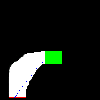

In [42]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_off-policy_example.png", width=400)

#### Value function
Bellow is the average value of each possition on the track. We ignore states where the car is not moving up and to the right to decrease the noise a bit. Howerver becuase we are only covering a small fraction of the full state space during the monte carlo simulations take this value funciton with a large grain of salt.

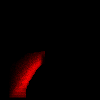

In [43]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_off-policy_avg_value.png", width=400)

### Exploring Starts
I did implement a second simpler algorithm for this problem, which was on policy Monte Carlo learning a greedy policy with exploring starts. Since this algorithm always follows a greedy policy, it can have a bit of trouble getting started and is highly sensitive to the initial value given to each state. In general, I have found that it is quite a bit slower and can become unrecoverably struct. Hence the low max episode length. However, the exploring starts method covers more of the state space than the off-policy method with small epsilon.

In [5]:
!./e5_12/target/release/main --track ./e5_12_tracks/race_track.png \
    --algo exploring \
    --num_episodes 2000000 \
    --max_ep_len 2000 \
    --seed 42 \
    --example ./e5_12_outputs/race_track_exploring_example.png \
    --value 0 5 -5 0 ./e5_12_outputs/race_track_exploring_avg_value.png

Creating race track env
max velocity 14
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
___________________________________________________

_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________XXXXXXXXXXXXXXXXX__________________________________________________________________________
_________=================__________________________________________________________________________
____________________________________________________________________________________________________
____________________________________________________________________________________________________
There are a total of 866230 states
running from seed
Using default value -1001
Starting Monte Carlo Simulations
[00:00:00] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░       1/2000000 
[00:00:00] 

[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11747/2000000 recent ep len 1133.683987692901
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   12029/2000000 recent ep len 1129.1031799557654
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   12302/2000000 recent ep len 1134.0322180623077
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   12575/2000000 recent ep len 1128.148152434186
[00:00:03] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   12862/2000000 recent ep len 1108.2360545053043
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   13143/2000000 recent ep len 1116.4995246949363
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   13417/2000000 recent ep len 1123.9143278056913
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   13686/2000000 recent ep len 1147.6993395527452
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   13966/2000000 recent ep len 1151.6080174717567
[00:00:04] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   14260/2000000 recent ep len 1135.243038

[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   29209/2000000 recent ep len 1082.3003275083124
[00:00:07] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   29512/2000000 recent ep len 1065.160235411057
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   29791/2000000 recent ep len 1090.7250929716074
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   30079/2000000 recent ep len 1090.9885874027746
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   30360/2000000 recent ep len 1098.04525520459
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   30656/2000000 recent ep len 1075.063593837892
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   30935/2000000 recent ep len 1095.0185157223439
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   31222/2000000 recent ep len 1095.4691127873677
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   31505/2000000 recent ep len 1114.474440654638
[00:00:08] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   31779/2000000 recent ep len 1124.550445044

[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47309/2000000 recent ep len 1109.985364691785
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47565/2000000 recent ep len 1128.7796872475446
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47851/2000000 recent ep len 1142.109988434691
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48152/2000000 recent ep len 1113.5904533209423
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48451/2000000 recent ep len 1107.5415986432827
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48741/2000000 recent ep len 1120.1047125051718
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48982/2000000 recent ep len 1119.6283551536164
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   49285/2000000 recent ep len 1092.688004902853
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   49558/2000000 recent ep len 1118.3227147648015
[00:00:12] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   49844/2000000 recent ep len 1107.1148104

[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   65694/2000000 recent ep len 1073.2293962409271
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   65988/2000000 recent ep len 1075.8770287483696
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   66279/2000000 recent ep len 1070.3214871325606
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   66559/2000000 recent ep len 1090.3492725393621
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   66853/2000000 recent ep len 1083.5597136100603
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   67139/2000000 recent ep len 1089.1764539325955
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   67434/2000000 recent ep len 1081.2512382549842
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   67722/2000000 recent ep len 1086.2419943165314
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   68024/2000000 recent ep len 1072.309031051813
[00:00:16] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   68311/2000000 recent ep len 1085.35169

[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   94103/2000000 recent ep len 93.4988773328189
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   94641/2000000 recent ep len 95.43753007788104
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   95197/2000000 recent ep len 92.60578823905237
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   95735/2000000 recent ep len 92.76474139223482
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96292/2000000 recent ep len 90.78840929512839
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96840/2000000 recent ep len 91.51074005561493
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   97372/2000000 recent ep len 94.9405090577449
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   97894/2000000 recent ep len 95.55140301159177
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   98430/2000000 recent ep len 96.33637201958481
[00:00:20] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   98972/2000000 recent ep len 94.97225407261354
[0

[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  127883/2000000 recent ep len 94.07388028959753
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  128449/2000000 recent ep len 90.71116720874578
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  128990/2000000 recent ep len 91.75400349586504
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  129531/2000000 recent ep len 92.69981004695228
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  130030/2000000 recent ep len 96.61073394480009
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  130546/2000000 recent ep len 98.80498489033656
[00:00:24] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  131087/2000000 recent ep len 96.23299769569208
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  131609/2000000 recent ep len 97.50461668310753
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  132041/2000000 recent ep len 94.80054163353613
[00:00:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  132488/2000000 recent ep len 95.30329598602776


[00:00:28] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  161532/2000000 recent ep len 91.56846341188275
[00:00:28] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  162012/2000000 recent ep len 93.00290629940902
[00:00:28] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  162541/2000000 recent ep len 95.495608344146
[00:00:29] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  163005/2000000 recent ep len 97.27821465555357
[00:00:29] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  163534/2000000 recent ep len 94.49798733615258
[00:00:29] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  164063/2000000 recent ep len 92.70049362633533
[00:00:29] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  164580/2000000 recent ep len 95.4536355093226
[00:00:29] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  165109/2000000 recent ep len 94.28145373537691
[00:00:29] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  165642/2000000 recent ep len 93.31981342030178
[00:00:29] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  166157/2000000 recent ep len 97.20119920414498
[00

[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  194490/2000000 recent ep len 93.70418076816625
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  194986/2000000 recent ep len 96.60111600672644
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  195495/2000000 recent ep len 95.55668744579582
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  196017/2000000 recent ep len 93.32999930412163
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  196535/2000000 recent ep len 93.12596787535999
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197057/2000000 recent ep len 91.41982787326681
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  197570/2000000 recent ep len 91.26754374620162
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  198069/2000000 recent ep len 94.72882603639538
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  198583/2000000 recent ep len 93.23238264987057
[00:00:33] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  199095/2000000 recent ep len 93.14601106194051


[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  227057/2000000 recent ep len 93.48564638500373
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  227570/2000000 recent ep len 95.71735171537146
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  228120/2000000 recent ep len 92.42283606174101
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  228647/2000000 recent ep len 94.84363306690997
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229182/2000000 recent ep len 94.67960891060491
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  229730/2000000 recent ep len 92.5556631176048
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  230271/2000000 recent ep len 92.57388283014049
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  230817/2000000 recent ep len 92.04074947172595
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  231342/2000000 recent ep len 95.06226886229432
[00:00:37] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  231884/2000000 recent ep len 94.34018455626484
[

[00:00:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  260942/2000000 recent ep len 95.46820082622284
[00:00:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  261479/2000000 recent ep len 92.05445192154666
[00:00:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  262007/2000000 recent ep len 91.93363721649258
[00:00:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  262546/2000000 recent ep len 91.39473609570192
[00:00:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  263061/2000000 recent ep len 96.48124310731437
[00:00:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  263541/2000000 recent ep len 97.39036389683967
[00:00:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  264064/2000000 recent ep len 97.34639610318506
[00:00:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  264583/2000000 recent ep len 96.10844222130535
[00:00:42] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  265113/2000000 recent ep len 95.01604748344342
[00:00:42] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  265651/2000000 recent ep len 93.25462493370074


[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  294487/2000000 recent ep len 90.88886555358009
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  295018/2000000 recent ep len 91.35550258310627
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  295433/2000000 recent ep len 94.22090006501588
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  295869/2000000 recent ep len 92.73959342772045
[00:00:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  296404/2000000 recent ep len 91.85679481550756
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  296943/2000000 recent ep len 90.16008430275353
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  297457/2000000 recent ep len 93.30036426906324
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  297977/2000000 recent ep len 94.55627659875972
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  298507/2000000 recent ep len 93.55622347667997
[00:00:46] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  299029/2000000 recent ep len 91.51241793968353


[00:00:49] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  324538/2000000 recent ep len 95.00053053087424
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  324905/2000000 recent ep len 94.48606915254982
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  325339/2000000 recent ep len 96.07243139297569
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  325764/2000000 recent ep len 92.9002397299555
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  326214/2000000 recent ep len 91.7943843363197
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  326689/2000000 recent ep len 94.05746814847724
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  327164/2000000 recent ep len 91.6856072439296
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  327589/2000000 recent ep len 92.23934157771002
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  328007/2000000 recent ep len 92.48358293786904
[00:00:50] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  328264/2000000 recent ep len 93.93646509711282
[00

[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  351878/2000000 recent ep len 94.99399215482947
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352261/2000000 recent ep len 93.41653072751771
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  352664/2000000 recent ep len 91.1908495598846
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  353007/2000000 recent ep len 92.58773056398093
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  353410/2000000 recent ep len 93.84697805311339
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  353748/2000000 recent ep len 91.82590687474595
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  354151/2000000 recent ep len 91.60776373682435
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  354533/2000000 recent ep len 95.2475724630153
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  354954/2000000 recent ep len 94.78621229798634
[00:00:54] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  355392/2000000 recent ep len 95.18398508627503
[0

[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  378152/2000000 recent ep len 92.10448941200384
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  378673/2000000 recent ep len 91.7635707795715
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  379182/2000000 recent ep len 92.38027911786516
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  379693/2000000 recent ep len 92.06307292527343
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  380205/2000000 recent ep len 92.00147593140505
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  380722/2000000 recent ep len 92.50041375037557
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  381223/2000000 recent ep len 92.78845790067457
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  381750/2000000 recent ep len 90.76745028749112
[00:00:58] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  382217/2000000 recent ep len 90.86105349829798
[00:00:59] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  382739/2000000 recent ep len 91.45049654347982
[

[00:01:02] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  408462/2000000 recent ep len 94.8667070920201
[00:01:02] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  408949/2000000 recent ep len 95.8518684276857
[00:01:02] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  409454/2000000 recent ep len 95.2496197506314
[00:01:02] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  409891/2000000 recent ep len 91.73814864358474
[00:01:02] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  410354/2000000 recent ep len 93.0933939456038
[00:01:02] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  410854/2000000 recent ep len 92.33157577541613
[00:01:03] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  411376/2000000 recent ep len 90.51264493218733
[00:01:03] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  411867/2000000 recent ep len 93.72877468424723
[00:01:03] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  412361/2000000 recent ep len 96.34148114272752
[00:01:03] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  412860/2000000 recent ep len 97.78050014398045
[00:

[00:01:06] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  436706/2000000 recent ep len 92.41247573098052
[00:01:06] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  437073/2000000 recent ep len 90.28200257186957
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  437496/2000000 recent ep len 89.44601508014387
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  437908/2000000 recent ep len 91.28484145501571
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  438309/2000000 recent ep len 90.00440742697201
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  438639/2000000 recent ep len 90.51108335336825
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  439078/2000000 recent ep len 92.5508797750501
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  439515/2000000 recent ep len 92.89150092756135
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  439938/2000000 recent ep len 93.61760511490563
[00:01:07] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  440328/2000000 recent ep len 95.25449005739816
[

[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  462152/2000000 recent ep len 93.59402227670039
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  462553/2000000 recent ep len 94.27141620602573
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  462975/2000000 recent ep len 91.13953112142788
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  463398/2000000 recent ep len 90.39333885359548
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  463787/2000000 recent ep len 90.59515422236514
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  464174/2000000 recent ep len 90.08688187346817
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  464530/2000000 recent ep len 90.4616908951503
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  464914/2000000 recent ep len 90.08549424528101
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  465292/2000000 recent ep len 90.55932744079244
[00:01:11] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  465532/2000000 recent ep len 91.10435514295497
[

[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  487812/2000000 recent ep len 90.08632095962
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  488262/2000000 recent ep len 91.31989796184294
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  488707/2000000 recent ep len 93.7133205292428
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  489155/2000000 recent ep len 94.6928844005036
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  489588/2000000 recent ep len 94.23254996279483
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  490041/2000000 recent ep len 92.40303498836566
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  490476/2000000 recent ep len 94.01060788924784
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  490925/2000000 recent ep len 92.85257092257739
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  491351/2000000 recent ep len 91.45925890673388
[00:01:15] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  491765/2000000 recent ep len 92.98423358758235
[00:0

[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  516977/2000000 recent ep len 93.55879505702801
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  517436/2000000 recent ep len 93.96949787975511
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  517922/2000000 recent ep len 92.7559977292822
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  518404/2000000 recent ep len 92.68451797981926
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  518865/2000000 recent ep len 91.47491494207459
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  519312/2000000 recent ep len 92.15880374649228
[00:01:19] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  519766/2000000 recent ep len 92.84445412457329
[00:01:20] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  520246/2000000 recent ep len 92.8919035953043
[00:01:20] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  520713/2000000 recent ep len 92.54938210852049
[00:01:20] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  521168/2000000 recent ep len 92.4643392656121
[00

[00:01:23] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  545113/2000000 recent ep len 91.79059753711255
[00:01:23] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  545556/2000000 recent ep len 91.45255313101235
[00:01:23] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  546004/2000000 recent ep len 93.0040780991846
[00:01:23] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  546489/2000000 recent ep len 90.33567681077835
[00:01:24] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  546916/2000000 recent ep len 90.5631985139007
[00:01:24] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  547427/2000000 recent ep len 91.82732413024964
[00:01:24] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  547911/2000000 recent ep len 93.51915847225764
[00:01:24] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  548336/2000000 recent ep len 95.17721582063517
[00:01:24] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  548798/2000000 recent ep len 94.29548530553183
[00:01:24] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  549269/2000000 recent ep len 95.1231390333412
[00

[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  572786/2000000 recent ep len 90.65604674938214
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573338/2000000 recent ep len 91.00878414461457
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  573873/2000000 recent ep len 92.84624942042493
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574425/2000000 recent ep len 90.74063096440638
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  574945/2000000 recent ep len 90.33610236632748
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  575418/2000000 recent ep len 89.43622288494531
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  575942/2000000 recent ep len 91.95648254275778
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  576450/2000000 recent ep len 95.36251155343116
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  577002/2000000 recent ep len 90.5549581576682
[00:01:28] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  577545/2000000 recent ep len 89.14275314032488
[

[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  605107/2000000 recent ep len 92.84987523335818
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  605421/2000000 recent ep len 91.80053016102929
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  605771/2000000 recent ep len 90.63094333354069
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  606255/2000000 recent ep len 93.98623472866655
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  606829/2000000 recent ep len 91.44971006153871
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  607368/2000000 recent ep len 91.47930385945396
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  607903/2000000 recent ep len 91.21054454656142
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  608455/2000000 recent ep len 89.16732412922501
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  608984/2000000 recent ep len 90.81641086519092
[00:01:32] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  609512/2000000 recent ep len 91.10625208627563


[00:01:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  637609/2000000 recent ep len 95.07469886799292
[00:01:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  638111/2000000 recent ep len 93.6791787386469
[00:01:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  638635/2000000 recent ep len 94.46957607052984
[00:01:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  639169/2000000 recent ep len 93.59758861099168
[00:01:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  639705/2000000 recent ep len 92.45557432762875
[00:01:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  640163/2000000 recent ep len 91.35228128552777
[00:01:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  640616/2000000 recent ep len 92.22874926005628
[00:01:36] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  641124/2000000 recent ep len 90.18974965723082
[00:01:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  641591/2000000 recent ep len 93.27205898480825
[00:01:37] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░  642113/2000000 recent ep len 92.78944361675623
[

[00:01:40] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  666085/2000000 recent ep len 89.50559373375322
[00:01:40] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  666459/2000000 recent ep len 90.86167476489683
[00:01:40] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  666838/2000000 recent ep len 90.04822714390038
[00:01:40] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  667195/2000000 recent ep len 89.30198417943166
[00:01:40] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  667764/2000000 recent ep len 88.01615057915653
[00:01:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  668296/2000000 recent ep len 89.90551532658239
[00:01:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  668831/2000000 recent ep len 90.90886460834898
[00:01:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  669364/2000000 recent ep len 90.89978848126916
[00:01:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  669899/2000000 recent ep len 90.89996200346773
[00:01:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  670438/2000000 recent ep len 89.20612060205302


[00:01:44] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  698224/2000000 recent ep len 93.66564160742978
[00:01:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  698739/2000000 recent ep len 94.18286078971721
[00:01:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  699275/2000000 recent ep len 91.52002725778954
[00:01:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░  699791/2000000 recent ep len 92.30527814028152
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  700299/2000000 recent ep len 94.52750055989344
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  700801/2000000 recent ep len 92.31322841128438
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  701318/2000000 recent ep len 92.47186336924995
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  701802/2000000 recent ep len 89.71779698120693
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  702135/2000000 recent ep len 90.12129138556269
[00:01:45] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  702421/2000000 recent ep len 89.58342388125435


[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  727125/2000000 recent ep len 91.88967060281377
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  727633/2000000 recent ep len 91.79090931012573
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  728119/2000000 recent ep len 90.67872283980854
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  728642/2000000 recent ep len 90.25948311671469
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  729147/2000000 recent ep len 91.75367037334792
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  729656/2000000 recent ep len 91.38146654439305
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  730160/2000000 recent ep len 89.90629842451042
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  730659/2000000 recent ep len 90.3583503857501
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  731141/2000000 recent ep len 90.2872057433272
[00:01:49] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░  731607/2000000 recent ep len 92.88374770122677
[0

[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  752872/2000000 recent ep len 88.80098225005415
[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  753099/2000000 recent ep len 90.31450861842454
[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  753305/2000000 recent ep len 90.31161750273338
[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  753549/2000000 recent ep len 90.3387312446151
[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  754014/2000000 recent ep len 87.47726260210429
[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  754502/2000000 recent ep len 87.29635238466265
[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  754961/2000000 recent ep len 91.56772028715727
[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  755303/2000000 recent ep len 90.37283979524528
[00:01:53] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  755729/2000000 recent ep len 89.98515521420546
[00:01:54] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  756066/2000000 recent ep len 90.96281825762024
[

[00:01:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  780436/2000000 recent ep len 93.16456219531361
[00:01:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  780963/2000000 recent ep len 90.66848730696901
[00:01:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  781486/2000000 recent ep len 90.23508158055402
[00:01:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  781985/2000000 recent ep len 90.7326225107014
[00:01:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  782499/2000000 recent ep len 92.22119651525979
[00:01:57] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  783006/2000000 recent ep len 93.06895761471819
[00:01:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  783492/2000000 recent ep len 95.62869045179959
[00:01:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  784020/2000000 recent ep len 91.89152283333743
[00:01:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  784544/2000000 recent ep len 91.69923179109209
[00:01:58] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░  785070/2000000 recent ep len 90.34219363708632
[

[00:02:01] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  811079/2000000 recent ep len 88.48931617143182
[00:02:01] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  811542/2000000 recent ep len 88.47073297406335
[00:02:02] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  811971/2000000 recent ep len 92.30411244829217
[00:02:02] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  812316/2000000 recent ep len 95.16746099273549
[00:02:02] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  812622/2000000 recent ep len 93.76652481382217
[00:02:02] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  813061/2000000 recent ep len 93.55626606776042
[00:02:02] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  813505/2000000 recent ep len 95.21638336159506
[00:02:02] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  813934/2000000 recent ep len 93.55298581815993
[00:02:02] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  814218/2000000 recent ep len 93.66469581854436
[00:02:02] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  814490/2000000 recent ep len 93.21753168521997


[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  839622/2000000 recent ep len 89.37417741290622
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  840086/2000000 recent ep len 88.89704209079208
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  840575/2000000 recent ep len 89.37409670182156
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  841050/2000000 recent ep len 88.68106910929107
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  841515/2000000 recent ep len 88.93722567431591
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  841979/2000000 recent ep len 90.59059651460046
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  842459/2000000 recent ep len 91.42669351457052
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  842932/2000000 recent ep len 94.48672056073065
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  843391/2000000 recent ep len 93.78584959622823
[00:02:06] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░  843879/2000000 recent ep len 94.37037170416792


[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  868612/2000000 recent ep len 90.29647243778125
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  869075/2000000 recent ep len 89.99508245299833
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  869474/2000000 recent ep len 90.27412789795429
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  869926/2000000 recent ep len 90.13822630818636
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  870382/2000000 recent ep len 91.55489126805836
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  870850/2000000 recent ep len 90.04128187486059
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  871302/2000000 recent ep len 91.24778094376325
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  871715/2000000 recent ep len 91.75793990701538
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  872104/2000000 recent ep len 91.8460610590151
[00:02:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  872565/2000000 recent ep len 92.7688969487292
[0

[00:02:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  897486/2000000 recent ep len 92.48878367072922
[00:02:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  897879/2000000 recent ep len 91.75845390628913
[00:02:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  898286/2000000 recent ep len 91.16173629155216
[00:02:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  898714/2000000 recent ep len 90.98977054182151
[00:02:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  899118/2000000 recent ep len 92.63605395992718
[00:02:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  899533/2000000 recent ep len 92.09972892640194
[00:02:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░  899956/2000000 recent ep len 92.04278913407849
[00:02:15] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  900374/2000000 recent ep len 90.76644319076874
[00:02:15] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  900797/2000000 recent ep len 91.22286682614484
[00:02:15] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  901295/2000000 recent ep len 87.97953168573319


[00:02:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  926470/2000000 recent ep len 87.79341102434246
[00:02:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  926927/2000000 recent ep len 88.27232177441407
[00:02:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  927367/2000000 recent ep len 92.62407221267325
[00:02:18] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  927872/2000000 recent ep len 92.90947760467928
[00:02:19] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  928364/2000000 recent ep len 91.84160403488563
[00:02:19] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  928835/2000000 recent ep len 91.23821793212267
[00:02:19] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  929307/2000000 recent ep len 89.22229314312716
[00:02:19] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  929797/2000000 recent ep len 89.61878186123108
[00:02:19] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  930266/2000000 recent ep len 91.8061727578286
[00:02:19] ██████████████████░░░░░░░░░░░░░░░░░░░░░░  930737/2000000 recent ep len 90.17956328595429
[

[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  954787/2000000 recent ep len 91.84051127240907
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  955255/2000000 recent ep len 91.63343190123017
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  955666/2000000 recent ep len 92.29919912864254
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  955999/2000000 recent ep len 92.3333911543026
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  956321/2000000 recent ep len 93.1313978879664
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  956661/2000000 recent ep len 92.64269764463529
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  956953/2000000 recent ep len 95.49310346556588
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  957291/2000000 recent ep len 94.499126934492
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  957676/2000000 recent ep len 93.22940941044105
[00:02:23] ███████████████████░░░░░░░░░░░░░░░░░░░░░  958118/2000000 recent ep len 94.31050219204694
[00:

[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  982018/2000000 recent ep len 86.25378485884582
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  982404/2000000 recent ep len 88.97077871278339
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  982708/2000000 recent ep len 88.46202915725573
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  983003/2000000 recent ep len 89.77159603279468
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  983326/2000000 recent ep len 91.14808578044469
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  983732/2000000 recent ep len 93.27333601072594
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  984160/2000000 recent ep len 92.51398309645641
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  984606/2000000 recent ep len 92.15080676980318
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  985026/2000000 recent ep len 95.36763979019013
[00:02:27] ███████████████████░░░░░░░░░░░░░░░░░░░░░  985463/2000000 recent ep len 91.73116216924703


[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1008032/2000000 recent ep len 93.19935396176923
[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1008477/2000000 recent ep len 90.16697692085027
[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1008924/2000000 recent ep len 90.9494664389645
[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1009376/2000000 recent ep len 90.97770703598358
[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1009808/2000000 recent ep len 90.3763350335045
[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1010204/2000000 recent ep len 87.68092265496794
[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1010526/2000000 recent ep len 88.13496254448413
[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1010859/2000000 recent ep len 88.3761061032723
[00:02:31] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1011276/2000000 recent ep len 89.74919670130765
[00:02:32] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1011651/2000000 recent ep len 91.68595138758573
[00

[00:02:35] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1034087/2000000 recent ep len 90.34035616660682
[00:02:35] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1034443/2000000 recent ep len 92.84911654492322
[00:02:35] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1034824/2000000 recent ep len 94.91825674532203
[00:02:35] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1035244/2000000 recent ep len 95.51177908370386
[00:02:35] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1035680/2000000 recent ep len 95.33154348096073
[00:02:36] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1036137/2000000 recent ep len 92.90182771594411
[00:02:36] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1036594/2000000 recent ep len 91.16044195363737
[00:02:36] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1037042/2000000 recent ep len 93.01650821106999
[00:02:36] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1037484/2000000 recent ep len 92.54020406494692
[00:02:36] ████████████████████░░░░░░░░░░░░░░░░░░░░ 1037899/2000000 recent ep len 91.51352768034408


[00:02:39] █████████████████████░░░░░░░░░░░░░░░░░░░ 1060550/2000000 recent ep len 91.72879161785981
[00:02:39] █████████████████████░░░░░░░░░░░░░░░░░░░ 1060951/2000000 recent ep len 93.37568790788454
[00:02:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 1061364/2000000 recent ep len 91.78975283861314
[00:02:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 1061794/2000000 recent ep len 91.71493236772629
[00:02:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 1062242/2000000 recent ep len 89.59369094162409
[00:02:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 1062638/2000000 recent ep len 87.09725909091864
[00:02:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 1063033/2000000 recent ep len 89.61850965509575
[00:02:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 1063433/2000000 recent ep len 89.51811864941493
[00:02:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 1063843/2000000 recent ep len 87.06617239720427
[00:02:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 1064246/2000000 recent ep len 88.5780239853698
[

[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1086677/2000000 recent ep len 87.66999089234916
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1087100/2000000 recent ep len 87.71347676691592
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1087499/2000000 recent ep len 90.31664622301557
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1087916/2000000 recent ep len 90.18515182379966
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1088330/2000000 recent ep len 91.68238421869371
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1088764/2000000 recent ep len 90.17145616832018
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1089179/2000000 recent ep len 91.3072077157666
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1089592/2000000 recent ep len 90.96587032791996
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1090036/2000000 recent ep len 89.31136456225876
[00:02:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 1090461/2000000 recent ep len 89.01458178855667
[

[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1112264/2000000 recent ep len 89.23897166807583
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1112574/2000000 recent ep len 90.53240005718823
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1112905/2000000 recent ep len 88.65707552697381
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1113237/2000000 recent ep len 90.07633949312991
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1113611/2000000 recent ep len 90.28412504648566
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1113993/2000000 recent ep len 90.1986679856182
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1114349/2000000 recent ep len 90.77008643957986
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1114664/2000000 recent ep len 90.90279922235287
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1114973/2000000 recent ep len 90.61513794181644
[00:02:48] ██████████████████████░░░░░░░░░░░░░░░░░░ 1115283/2000000 recent ep len 89.146793744014
[00

[00:02:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 1136811/2000000 recent ep len 86.57886875640992
[00:02:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 1137241/2000000 recent ep len 89.53292673650004
[00:02:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 1137661/2000000 recent ep len 90.50279500374985
[00:02:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 1138091/2000000 recent ep len 90.03018833485795
[00:02:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 1138544/2000000 recent ep len 89.28361172861655
[00:02:52] ██████████████████████░░░░░░░░░░░░░░░░░░ 1139015/2000000 recent ep len 87.04748418905426
[00:02:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 1139452/2000000 recent ep len 87.7265747858725
[00:02:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 1139902/2000000 recent ep len 89.71591836017198
[00:02:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 1140351/2000000 recent ep len 90.33751608762041
[00:02:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 1140798/2000000 recent ep len 89.95271036964772
[

[00:02:56] ███████████████████████░░░░░░░░░░░░░░░░░ 1164847/2000000 recent ep len 89.91034150210224
[00:02:56] ███████████████████████░░░░░░░░░░░░░░░░░ 1165289/2000000 recent ep len 91.11418171005846
[00:02:56] ███████████████████████░░░░░░░░░░░░░░░░░ 1165756/2000000 recent ep len 89.91650979664325
[00:02:57] ███████████████████████░░░░░░░░░░░░░░░░░ 1166227/2000000 recent ep len 89.05549675175521
[00:02:57] ███████████████████████░░░░░░░░░░░░░░░░░ 1166680/2000000 recent ep len 90.02706389904941
[00:02:57] ███████████████████████░░░░░░░░░░░░░░░░░ 1167102/2000000 recent ep len 90.15118178777604
[00:02:57] ███████████████████████░░░░░░░░░░░░░░░░░ 1167542/2000000 recent ep len 89.82295999951272
[00:02:57] ███████████████████████░░░░░░░░░░░░░░░░░ 1167991/2000000 recent ep len 91.8327958106645
[00:02:57] ███████████████████████░░░░░░░░░░░░░░░░░ 1168454/2000000 recent ep len 90.92455224162802
[00:02:57] ███████████████████████░░░░░░░░░░░░░░░░░ 1168906/2000000 recent ep len 91.49089409225405
[

[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1194187/2000000 recent ep len 88.77675533435256
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1194669/2000000 recent ep len 87.23717933731318
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1195133/2000000 recent ep len 87.51532310532234
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1195586/2000000 recent ep len 88.04993546347049
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1196048/2000000 recent ep len 88.88104548449684
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1196493/2000000 recent ep len 89.85196589668634
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1196945/2000000 recent ep len 89.23225785691048
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1197407/2000000 recent ep len 88.03866940045525
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1197893/2000000 recent ep len 88.91288711188105
[00:03:01] ███████████████████████░░░░░░░░░░░░░░░░░ 1198356/2000000 recent ep len 88.676992683341
[0

[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1223210/2000000 recent ep len 89.82648385490101
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1223603/2000000 recent ep len 88.31851012500056
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1224058/2000000 recent ep len 86.95925972612424
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1224541/2000000 recent ep len 87.76071479770539
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1224962/2000000 recent ep len 89.60219420973529
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1225400/2000000 recent ep len 90.55702287346094
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1225883/2000000 recent ep len 90.80313163649616
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1226324/2000000 recent ep len 90.74404024395184
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1226762/2000000 recent ep len 87.65677414171911
[00:03:05] ████████████████████████░░░░░░░░░░░░░░░░ 1227189/2000000 recent ep len 90.48617209111593


[00:03:09] █████████████████████████░░░░░░░░░░░░░░░ 1252132/2000000 recent ep len 87.3591228896043
[00:03:09] █████████████████████████░░░░░░░░░░░░░░░ 1252607/2000000 recent ep len 87.4683736482372
[00:03:09] █████████████████████████░░░░░░░░░░░░░░░ 1253067/2000000 recent ep len 87.00678620022182
[00:03:09] █████████████████████████░░░░░░░░░░░░░░░ 1253506/2000000 recent ep len 87.25881697625394
[00:03:09] █████████████████████████░░░░░░░░░░░░░░░ 1253950/2000000 recent ep len 88.12617700472484
[00:03:09] █████████████████████████░░░░░░░░░░░░░░░ 1254382/2000000 recent ep len 91.39452023333202
[00:03:09] █████████████████████████░░░░░░░░░░░░░░░ 1254811/2000000 recent ep len 92.69676555386819
[00:03:09] █████████████████████████░░░░░░░░░░░░░░░ 1255250/2000000 recent ep len 93.50212537964822
[00:03:10] █████████████████████████░░░░░░░░░░░░░░░ 1255730/2000000 recent ep len 92.66487023428662
[00:03:10] █████████████████████████░░░░░░░░░░░░░░░ 1256172/2000000 recent ep len 93.03213983817626
[0

[00:03:13] █████████████████████████░░░░░░░░░░░░░░░ 1280645/2000000 recent ep len 91.34656571521657
[00:03:13] █████████████████████████░░░░░░░░░░░░░░░ 1281083/2000000 recent ep len 89.76302608925538
[00:03:13] █████████████████████████░░░░░░░░░░░░░░░ 1281529/2000000 recent ep len 88.85866739946528
[00:03:13] █████████████████████████░░░░░░░░░░░░░░░ 1281970/2000000 recent ep len 89.72639798637557
[00:03:14] █████████████████████████░░░░░░░░░░░░░░░ 1282416/2000000 recent ep len 89.78474228834139
[00:03:14] █████████████████████████░░░░░░░░░░░░░░░ 1282860/2000000 recent ep len 88.18743799754046
[00:03:14] █████████████████████████░░░░░░░░░░░░░░░ 1283286/2000000 recent ep len 90.7983613881141
[00:03:14] █████████████████████████░░░░░░░░░░░░░░░ 1283751/2000000 recent ep len 91.49911748126871
[00:03:14] █████████████████████████░░░░░░░░░░░░░░░ 1284175/2000000 recent ep len 89.88412723495394
[00:03:14] █████████████████████████░░░░░░░░░░░░░░░ 1284475/2000000 recent ep len 90.13478715697407
[

[00:03:17] ██████████████████████████░░░░░░░░░░░░░░ 1305327/2000000 recent ep len 88.9795407527552
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1305610/2000000 recent ep len 90.21729378269369
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1305941/2000000 recent ep len 88.08630667144432
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1306306/2000000 recent ep len 88.52766896932533
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1306697/2000000 recent ep len 88.66213789206418
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1307093/2000000 recent ep len 88.52941414067446
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1307477/2000000 recent ep len 90.96403298259058
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1307889/2000000 recent ep len 90.61182878477543
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1308271/2000000 recent ep len 93.03277345469306
[00:03:18] ██████████████████████████░░░░░░░░░░░░░░ 1308651/2000000 recent ep len 90.95069647724306
[

[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1328430/2000000 recent ep len 90.34215368254641
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1328793/2000000 recent ep len 92.0775615579918
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1329143/2000000 recent ep len 92.6756763901748
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1329485/2000000 recent ep len 91.85029976732841
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1329846/2000000 recent ep len 91.12451484870029
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1330200/2000000 recent ep len 90.92886053734223
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1330546/2000000 recent ep len 91.22604171795315
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1330901/2000000 recent ep len 92.26042045873002
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1331283/2000000 recent ep len 92.09941426672168
[00:03:22] ██████████████████████████░░░░░░░░░░░░░░ 1331678/2000000 recent ep len 91.43081351131787
[0

[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1351778/2000000 recent ep len 90.13913388302542
[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1352162/2000000 recent ep len 89.62241246990934
[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1352535/2000000 recent ep len 90.96691676777685
[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1352895/2000000 recent ep len 91.51307391169658
[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1353278/2000000 recent ep len 87.35715224322537
[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1353664/2000000 recent ep len 86.301240339783
[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1354013/2000000 recent ep len 87.32498779083645
[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1354375/2000000 recent ep len 88.64823117951623
[00:03:26] ███████████████████████████░░░░░░░░░░░░░ 1354774/2000000 recent ep len 86.0813894150979
[00:03:27] ███████████████████████████░░░░░░░░░░░░░ 1355168/2000000 recent ep len 87.05113486092117
[00

[00:03:30] ███████████████████████████░░░░░░░░░░░░░ 1376992/2000000 recent ep len 91.11160336869895
[00:03:30] ███████████████████████████░░░░░░░░░░░░░ 1377377/2000000 recent ep len 91.96266160229568
[00:03:30] ███████████████████████████░░░░░░░░░░░░░ 1377781/2000000 recent ep len 92.48889646700925
[00:03:30] ███████████████████████████░░░░░░░░░░░░░ 1378204/2000000 recent ep len 91.40497822778967
[00:03:30] ███████████████████████████░░░░░░░░░░░░░ 1378531/2000000 recent ep len 91.651125240495
[00:03:30] ███████████████████████████░░░░░░░░░░░░░ 1378892/2000000 recent ep len 88.79178948878928
[00:03:31] ███████████████████████████░░░░░░░░░░░░░ 1379283/2000000 recent ep len 89.52823075853112
[00:03:31] ███████████████████████████░░░░░░░░░░░░░ 1379669/2000000 recent ep len 88.5883323701151
[00:03:31] ███████████████████████████░░░░░░░░░░░░░ 1380092/2000000 recent ep len 86.97995243186436
[00:03:31] ███████████████████████████░░░░░░░░░░░░░ 1380519/2000000 recent ep len 87.73261125057488
[00

[00:03:34] ████████████████████████████░░░░░░░░░░░░ 1402248/2000000 recent ep len 88.02483013704865
[00:03:34] ████████████████████████████░░░░░░░░░░░░ 1402652/2000000 recent ep len 89.52216305967502
[00:03:35] ████████████████████████████░░░░░░░░░░░░ 1403067/2000000 recent ep len 91.28085573320075
[00:03:35] ████████████████████████████░░░░░░░░░░░░ 1403471/2000000 recent ep len 92.52219837428335
[00:03:35] ████████████████████████████░░░░░░░░░░░░ 1403880/2000000 recent ep len 92.32150120521914
[00:03:35] ████████████████████████████░░░░░░░░░░░░ 1404320/2000000 recent ep len 91.45869918680226
[00:03:35] ████████████████████████████░░░░░░░░░░░░ 1404742/2000000 recent ep len 91.71504963573031
[00:03:35] ████████████████████████████░░░░░░░░░░░░ 1405182/2000000 recent ep len 90.59588006187055
[00:03:35] ████████████████████████████░░░░░░░░░░░░ 1405628/2000000 recent ep len 86.14480600428209
[00:03:35] ████████████████████████████░░░░░░░░░░░░ 1406062/2000000 recent ep len 86.79583234183457


[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1424550/2000000 recent ep len 89.8524779716992
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1424935/2000000 recent ep len 88.7888647262108
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1425336/2000000 recent ep len 88.54672503409793
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1425740/2000000 recent ep len 88.16204787554196
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1426134/2000000 recent ep len 91.74376410236697
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1426527/2000000 recent ep len 91.22672398257134
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1426930/2000000 recent ep len 91.03127672920405
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1427329/2000000 recent ep len 91.65862756258059
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1427743/2000000 recent ep len 88.91793307304914
[00:03:39] ████████████████████████████░░░░░░░░░░░░ 1428152/2000000 recent ep len 88.93052942656621
[0

[00:03:43] █████████████████████████████░░░░░░░░░░░ 1450619/2000000 recent ep len 89.62633562969418
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1451008/2000000 recent ep len 90.41293145934209
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1451435/2000000 recent ep len 88.77025258927787
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1451849/2000000 recent ep len 88.35903791950365
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1452285/2000000 recent ep len 89.22151189988875
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1452675/2000000 recent ep len 92.43631153197582
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1453079/2000000 recent ep len 91.65854230282008
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1453510/2000000 recent ep len 91.34789137735615
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1453936/2000000 recent ep len 92.92132806197289
[00:03:43] █████████████████████████████░░░░░░░░░░░ 1454386/2000000 recent ep len 90.34939450459288


[00:03:47] █████████████████████████████░░░░░░░░░░░ 1475204/2000000 recent ep len 86.61494040771115
[00:03:47] █████████████████████████████░░░░░░░░░░░ 1475651/2000000 recent ep len 88.07372919350183
[00:03:47] █████████████████████████████░░░░░░░░░░░ 1476085/2000000 recent ep len 89.72147516950457
[00:03:47] █████████████████████████████░░░░░░░░░░░ 1476518/2000000 recent ep len 90.79438918393272
[00:03:47] █████████████████████████████░░░░░░░░░░░ 1476962/2000000 recent ep len 90.31937480203715
[00:03:47] █████████████████████████████░░░░░░░░░░░ 1477417/2000000 recent ep len 91.7914269935402
[00:03:48] █████████████████████████████░░░░░░░░░░░ 1477874/2000000 recent ep len 90.48624774536141
[00:03:48] █████████████████████████████░░░░░░░░░░░ 1478334/2000000 recent ep len 89.63541674138614
[00:03:48] █████████████████████████████░░░░░░░░░░░ 1478830/2000000 recent ep len 87.40511253944943
[00:03:48] █████████████████████████████░░░░░░░░░░░ 1479280/2000000 recent ep len 89.12713759416249
[

[00:03:51] ██████████████████████████████░░░░░░░░░░ 1504637/2000000 recent ep len 85.0171029795438
[00:03:51] ██████████████████████████████░░░░░░░░░░ 1505113/2000000 recent ep len 86.36658548291948
[00:03:51] ██████████████████████████████░░░░░░░░░░ 1505573/2000000 recent ep len 86.68944972240949
[00:03:52] ██████████████████████████████░░░░░░░░░░ 1506010/2000000 recent ep len 90.41665393396325
[00:03:52] ██████████████████████████████░░░░░░░░░░ 1506452/2000000 recent ep len 91.50944806974331
[00:03:52] ██████████████████████████████░░░░░░░░░░ 1506953/2000000 recent ep len 90.34099957054124
[00:03:52] ██████████████████████████████░░░░░░░░░░ 1507420/2000000 recent ep len 89.7507706241531
[00:03:52] ██████████████████████████████░░░░░░░░░░ 1507874/2000000 recent ep len 90.66300902932626
[00:03:52] ██████████████████████████████░░░░░░░░░░ 1508387/2000000 recent ep len 88.3503268242462
[00:03:52] ██████████████████████████████░░░░░░░░░░ 1508876/2000000 recent ep len 85.95478043772376
[00

[00:03:56] ██████████████████████████████░░░░░░░░░░ 1533682/2000000 recent ep len 90.75898819754386
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1534136/2000000 recent ep len 90.77754007261554
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1534606/2000000 recent ep len 90.47484986311953
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1535124/2000000 recent ep len 87.90347498983589
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1535592/2000000 recent ep len 86.65324919967458
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1536054/2000000 recent ep len 87.94397538361841
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1536508/2000000 recent ep len 90.36989426698548
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1537014/2000000 recent ep len 89.3860830364818
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1537485/2000000 recent ep len 88.29760935553436
[00:03:56] ██████████████████████████████░░░░░░░░░░ 1537963/2000000 recent ep len 85.84902086880095
[

[00:04:00] ███████████████████████████████░░░░░░░░░ 1563463/2000000 recent ep len 89.34572426003162
[00:04:00] ███████████████████████████████░░░░░░░░░ 1563903/2000000 recent ep len 89.31654754054883
[00:04:00] ███████████████████████████████░░░░░░░░░ 1564377/2000000 recent ep len 92.12209365308149
[00:04:00] ███████████████████████████████░░░░░░░░░ 1564816/2000000 recent ep len 95.06572764911137
[00:04:00] ███████████████████████████████░░░░░░░░░ 1565273/2000000 recent ep len 91.86693142193343
[00:04:00] ███████████████████████████████░░░░░░░░░ 1565715/2000000 recent ep len 91.65867643932675
[00:04:00] ███████████████████████████████░░░░░░░░░ 1566206/2000000 recent ep len 90.8648726121856
[00:04:00] ███████████████████████████████░░░░░░░░░ 1566680/2000000 recent ep len 87.29437110440199
[00:04:00] ███████████████████████████████░░░░░░░░░ 1567114/2000000 recent ep len 87.60210879737818
[00:04:00] ███████████████████████████████░░░░░░░░░ 1567603/2000000 recent ep len 86.97453300176899
[

[00:04:04] ███████████████████████████████░░░░░░░░░ 1592707/2000000 recent ep len 92.15308674243204
[00:04:04] ███████████████████████████████░░░░░░░░░ 1593165/2000000 recent ep len 90.49424035394846
[00:04:04] ███████████████████████████████░░░░░░░░░ 1593611/2000000 recent ep len 89.48872781460315
[00:04:04] ███████████████████████████████░░░░░░░░░ 1594045/2000000 recent ep len 88.64797780874719
[00:04:04] ███████████████████████████████░░░░░░░░░ 1594498/2000000 recent ep len 88.590312963959
[00:04:04] ███████████████████████████████░░░░░░░░░ 1594952/2000000 recent ep len 89.76140437553654
[00:04:04] ███████████████████████████████░░░░░░░░░ 1595413/2000000 recent ep len 88.33332795248899
[00:04:04] ███████████████████████████████░░░░░░░░░ 1595870/2000000 recent ep len 86.9715803320929
[00:04:05] ███████████████████████████████░░░░░░░░░ 1596316/2000000 recent ep len 87.7917385939849
[00:04:05] ███████████████████████████████░░░░░░░░░ 1596799/2000000 recent ep len 88.80208844704379
[00:

[00:04:08] ████████████████████████████████░░░░░░░░ 1621969/2000000 recent ep len 89.54676260778658
[00:04:08] ████████████████████████████████░░░░░░░░ 1622434/2000000 recent ep len 91.69597911364765
[00:04:08] ████████████████████████████████░░░░░░░░ 1622875/2000000 recent ep len 93.9715170471292
[00:04:08] ████████████████████████████████░░░░░░░░ 1623338/2000000 recent ep len 92.03359174466021
[00:04:09] ████████████████████████████████░░░░░░░░ 1623798/2000000 recent ep len 91.1531040120297
[00:04:09] ████████████████████████████████░░░░░░░░ 1624310/2000000 recent ep len 88.57255610109668
[00:04:09] ████████████████████████████████░░░░░░░░ 1624764/2000000 recent ep len 90.83802585232023
[00:04:09] ████████████████████████████████░░░░░░░░ 1625210/2000000 recent ep len 91.8023237879029
[00:04:09] ████████████████████████████████░░░░░░░░ 1625696/2000000 recent ep len 92.42778492966639
[00:04:09] ████████████████████████████████░░░░░░░░ 1626162/2000000 recent ep len 91.34072829629619
[00

[00:04:12] █████████████████████████████████░░░░░░░ 1651150/2000000 recent ep len 88.1600328480822
[00:04:13] █████████████████████████████████░░░░░░░ 1651620/2000000 recent ep len 91.81019885524864
[00:04:13] █████████████████████████████████░░░░░░░ 1652075/2000000 recent ep len 92.36900109491076
[00:04:13] █████████████████████████████████░░░░░░░ 1652540/2000000 recent ep len 91.12507915573626
[00:04:13] █████████████████████████████████░░░░░░░ 1653038/2000000 recent ep len 89.64517117020029
[00:04:13] █████████████████████████████████░░░░░░░ 1653502/2000000 recent ep len 88.88059096509387
[00:04:13] █████████████████████████████████░░░░░░░ 1653960/2000000 recent ep len 86.40050256093484
[00:04:13] █████████████████████████████████░░░░░░░ 1654399/2000000 recent ep len 87.2146713943194
[00:04:13] █████████████████████████████████░░░░░░░ 1654902/2000000 recent ep len 86.38629005186384
[00:04:13] █████████████████████████████████░░░░░░░ 1655364/2000000 recent ep len 85.86987170778525
[0

[00:04:17] █████████████████████████████████░░░░░░░ 1680203/2000000 recent ep len 89.91297091825173
[00:04:17] █████████████████████████████████░░░░░░░ 1680682/2000000 recent ep len 91.23404968951557
[00:04:17] █████████████████████████████████░░░░░░░ 1681130/2000000 recent ep len 89.22625800384104
[00:04:17] █████████████████████████████████░░░░░░░ 1681572/2000000 recent ep len 88.73755646638124
[00:04:17] █████████████████████████████████░░░░░░░ 1682054/2000000 recent ep len 90.62408473777978
[00:04:17] █████████████████████████████████░░░░░░░ 1682498/2000000 recent ep len 90.29561159713576
[00:04:17] █████████████████████████████████░░░░░░░ 1682940/2000000 recent ep len 88.20226376081496
[00:04:17] █████████████████████████████████░░░░░░░ 1683392/2000000 recent ep len 89.09017201098116
[00:04:17] █████████████████████████████████░░░░░░░ 1683872/2000000 recent ep len 90.46554083116987
[00:04:17] █████████████████████████████████░░░░░░░ 1684324/2000000 recent ep len 89.74305272464731


[00:04:21] ██████████████████████████████████░░░░░░ 1709514/2000000 recent ep len 90.02658644874413
[00:04:21] ██████████████████████████████████░░░░░░ 1710002/2000000 recent ep len 90.086538940563
[00:04:21] ██████████████████████████████████░░░░░░ 1710463/2000000 recent ep len 89.72949685921516
[00:04:21] ██████████████████████████████████░░░░░░ 1710915/2000000 recent ep len 89.84845188863102
[00:04:21] ██████████████████████████████████░░░░░░ 1711395/2000000 recent ep len 90.43567398297684
[00:04:21] ██████████████████████████████████░░░░░░ 1711849/2000000 recent ep len 91.02812781478984
[00:04:21] ██████████████████████████████████░░░░░░ 1712291/2000000 recent ep len 91.65107888162179
[00:04:21] ██████████████████████████████████░░░░░░ 1712754/2000000 recent ep len 90.11967756977172
[00:04:21] ██████████████████████████████████░░░░░░ 1713237/2000000 recent ep len 92.28172801373317
[00:04:22] ██████████████████████████████████░░░░░░ 1713699/2000000 recent ep len 91.09923431240573
[0

[00:04:25] ██████████████████████████████████░░░░░░ 1738436/2000000 recent ep len 88.92247440106854
[00:04:25] ██████████████████████████████████░░░░░░ 1738920/2000000 recent ep len 88.04008388964074
[00:04:25] ██████████████████████████████████░░░░░░ 1739380/2000000 recent ep len 89.0699780166202
[00:04:25] ██████████████████████████████████░░░░░░ 1739833/2000000 recent ep len 87.83236766712488
[00:04:25] ██████████████████████████████████░░░░░░ 1740333/2000000 recent ep len 88.29891365354194
[00:04:25] ██████████████████████████████████░░░░░░ 1740795/2000000 recent ep len 88.78592620018591
[00:04:26] ██████████████████████████████████░░░░░░ 1741270/2000000 recent ep len 87.17803211297793
[00:04:26] ██████████████████████████████████░░░░░░ 1741668/2000000 recent ep len 87.41577006737793
[00:04:26] ██████████████████████████████████░░░░░░ 1742137/2000000 recent ep len 88.00744548132892
[00:04:26] ██████████████████████████████████░░░░░░ 1742618/2000000 recent ep len 85.68719617029109
[

[00:04:29] ███████████████████████████████████░░░░░ 1768081/2000000 recent ep len 88.63013718493372
[00:04:29] ███████████████████████████████████░░░░░ 1768530/2000000 recent ep len 88.78799405162172
[00:04:30] ███████████████████████████████████░░░░░ 1769000/2000000 recent ep len 86.63001660115178
[00:04:30] ███████████████████████████████████░░░░░ 1769512/2000000 recent ep len 84.6968319536058
[00:04:30] ███████████████████████████████████░░░░░ 1769978/2000000 recent ep len 86.66149784281353
[00:04:30] ███████████████████████████████████░░░░░ 1770433/2000000 recent ep len 86.49542194891205
[00:04:30] ███████████████████████████████████░░░░░ 1770888/2000000 recent ep len 88.33171715952221
[00:04:30] ███████████████████████████████████░░░░░ 1771391/2000000 recent ep len 86.80071499892134
[00:04:30] ███████████████████████████████████░░░░░ 1771856/2000000 recent ep len 86.81417112226386
[00:04:30] ███████████████████████████████████░░░░░ 1772327/2000000 recent ep len 88.0200107068768
[0

[00:04:34] ███████████████████████████████████░░░░░ 1797705/2000000 recent ep len 87.78954997482391
[00:04:34] ███████████████████████████████████░░░░░ 1798177/2000000 recent ep len 86.13283690757413
[00:04:34] ███████████████████████████████████░░░░░ 1798640/2000000 recent ep len 87.43236840157138
[00:04:34] ███████████████████████████████████░░░░░ 1799148/2000000 recent ep len 86.6880610014848
[00:04:34] ███████████████████████████████████░░░░░ 1799613/2000000 recent ep len 86.24571581480684
[00:04:34] ████████████████████████████████████░░░░ 1800034/2000000 recent ep len 89.51722492830004
[00:04:34] ████████████████████████████████████░░░░ 1800522/2000000 recent ep len 88.49105491254733
[00:04:34] ████████████████████████████████████░░░░ 1800941/2000000 recent ep len 92.45231513769787
[00:04:34] ████████████████████████████████████░░░░ 1801376/2000000 recent ep len 91.2285776353445
[00:04:34] ████████████████████████████████████░░░░ 1801826/2000000 recent ep len 92.08668599353524
[0

[00:04:38] ████████████████████████████████████░░░░ 1826394/2000000 recent ep len 88.13471001700556
[00:04:38] ████████████████████████████████████░░░░ 1826847/2000000 recent ep len 87.142145708755
[00:04:38] ████████████████████████████████████░░░░ 1827354/2000000 recent ep len 87.61643313710508
[00:04:38] ████████████████████████████████████░░░░ 1827820/2000000 recent ep len 87.66401203437619
[00:04:38] ████████████████████████████████████░░░░ 1828231/2000000 recent ep len 88.58835013146663
[00:04:38] ████████████████████████████████████░░░░ 1828704/2000000 recent ep len 90.45746376227935
[00:04:38] ████████████████████████████████████░░░░ 1829171/2000000 recent ep len 88.59085391061562
[00:04:38] ████████████████████████████████████░░░░ 1829621/2000000 recent ep len 87.80582004405339
[00:04:38] ████████████████████████████████████░░░░ 1830060/2000000 recent ep len 88.50576132831318
[00:04:38] ████████████████████████████████████░░░░ 1830554/2000000 recent ep len 88.13385571975226
[0

[00:04:42] █████████████████████████████████████░░░ 1855786/2000000 recent ep len 90.11282170689474
[00:04:42] █████████████████████████████████████░░░ 1856241/2000000 recent ep len 89.88830951369742
[00:04:42] █████████████████████████████████████░░░ 1856720/2000000 recent ep len 89.82743307021258
[00:04:42] █████████████████████████████████████░░░ 1857177/2000000 recent ep len 88.96937310477752
[00:04:42] █████████████████████████████████████░░░ 1857636/2000000 recent ep len 87.08874512511913
[00:04:42] █████████████████████████████████████░░░ 1858075/2000000 recent ep len 88.93815812256551
[00:04:42] █████████████████████████████████████░░░ 1858566/2000000 recent ep len 87.81942046660022
[00:04:43] █████████████████████████████████████░░░ 1859028/2000000 recent ep len 87.74561685806127
[00:04:43] █████████████████████████████████████░░░ 1859471/2000000 recent ep len 88.92973152913281
[00:04:43] █████████████████████████████████████░░░ 1859952/2000000 recent ep len 86.40386922177248


[00:04:46] █████████████████████████████████████░░░ 1884829/2000000 recent ep len 85.95958690714966
[00:04:46] █████████████████████████████████████░░░ 1885246/2000000 recent ep len 87.09800969120812
[00:04:46] █████████████████████████████████████░░░ 1885712/2000000 recent ep len 85.99021010784672
[00:04:47] █████████████████████████████████████░░░ 1886200/2000000 recent ep len 86.18660233680879
[00:04:47] █████████████████████████████████████░░░ 1886652/2000000 recent ep len 88.50197718429018
[00:04:47] █████████████████████████████████████░░░ 1887103/2000000 recent ep len 90.03277763402652
[00:04:47] █████████████████████████████████████░░░ 1887602/2000000 recent ep len 89.04397518932122
[00:04:47] █████████████████████████████████████░░░ 1888058/2000000 recent ep len 91.01989860046383
[00:04:47] █████████████████████████████████████░░░ 1888514/2000000 recent ep len 89.13092193956024
[00:04:47] █████████████████████████████████████░░░ 1888963/2000000 recent ep len 87.3868449594221
[

[00:04:51] ██████████████████████████████████████░░ 1914381/2000000 recent ep len 87.52101635459067
[00:04:51] ██████████████████████████████████████░░ 1914833/2000000 recent ep len 87.28907120094675
[00:04:51] ██████████████████████████████████████░░ 1915274/2000000 recent ep len 88.21290138785028
[00:04:51] ██████████████████████████████████████░░ 1915765/2000000 recent ep len 88.27284750391686
[00:04:51] ██████████████████████████████████████░░ 1916222/2000000 recent ep len 88.03903490084275
[00:04:51] ██████████████████████████████████████░░ 1916670/2000000 recent ep len 88.58687840637319
[00:04:51] ██████████████████████████████████████░░ 1917106/2000000 recent ep len 89.39499529214794
[00:04:51] ██████████████████████████████████████░░ 1917600/2000000 recent ep len 86.89564706197223
[00:04:51] ██████████████████████████████████████░░ 1918025/2000000 recent ep len 89.28002240587166
[00:04:51] ██████████████████████████████████████░░ 1918416/2000000 recent ep len 88.04558688624091


[00:04:55] ██████████████████████████████████████░░ 1942955/2000000 recent ep len 89.31986813767443
[00:04:55] ██████████████████████████████████████░░ 1943450/2000000 recent ep len 87.3106795487636
[00:04:55] ██████████████████████████████████████░░ 1943913/2000000 recent ep len 86.97948706910013
[00:04:55] ██████████████████████████████████████░░ 1944349/2000000 recent ep len 88.26464040646023
[00:04:55] ██████████████████████████████████████░░ 1944802/2000000 recent ep len 89.2513138522551
[00:04:55] ██████████████████████████████████████░░ 1945185/2000000 recent ep len 87.89616145713798
[00:04:55] ██████████████████████████████████████░░ 1945533/2000000 recent ep len 90.72847615125069
[00:04:55] ██████████████████████████████████████░░ 1945948/2000000 recent ep len 89.34379497051037
[00:04:55] ██████████████████████████████████████░░ 1946425/2000000 recent ep len 87.05008761339526
[00:04:55] ██████████████████████████████████████░░ 1946836/2000000 recent ep len 86.75591370574278
[0

[00:04:59] ███████████████████████████████████████░ 1971569/2000000 recent ep len 88.03805412698348
[00:04:59] ███████████████████████████████████████░ 1972031/2000000 recent ep len 86.67225003801506
[00:04:59] ███████████████████████████████████████░ 1972491/2000000 recent ep len 86.8923952848
[00:04:59] ███████████████████████████████████████░ 1972932/2000000 recent ep len 88.04818184771403
[00:04:59] ███████████████████████████████████████░ 1973361/2000000 recent ep len 89.68077074240018
[00:04:59] ███████████████████████████████████████░ 1973818/2000000 recent ep len 88.48287832900434
[00:04:59] ███████████████████████████████████████░ 1974236/2000000 recent ep len 88.99446282174901
[00:04:59] ███████████████████████████████████████░ 1974657/2000000 recent ep len 88.664671623495
[00:05:00] ███████████████████████████████████████░ 1975129/2000000 recent ep len 91.39223689255373
[00:05:00] ███████████████████████████████████████░ 1975582/2000000 recent ep len 91.68459502279879
[00:05

avg values where in the range [-1062.1930835205903, -675.5952245244976]
Complete!


#### Example path
Again a sample path following the optimal policy.

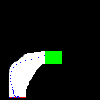

In [6]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_exploring_example.png", width=400)

#### Value function
This was computed using the exact same method as the above value function.

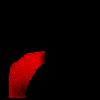

In [7]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/race_track_exploring_avg_value.png", width=400)

## A Larger Example
Using the off-policy method, we can move to an even larger state space than seen in the textbook. This problem requires careful hyperparameter tunning and a longer run of 5,000,000 episodes to get reliable convergence.


In [8]:
!./e5_12/target/release/main --track ./e5_12_tracks/complex_track.png \
    --algo off-policy \
    --epsilon 0.08 \
    --seed 42 \
    --num_episodes 5000000 \
    --example ./e5_12_outputs/complex_track_off-policy_example.png \
    --value 0 10 -10 10 ./e5_12_outputs/complex_track_off-policy_avg_value.png

Creating race track env
max velocity 20
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________________________________________________

___________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX___________________________________________________________________
__________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX__________________________________________________________________
_________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________________________
_________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________
________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX___________________________________________________________

_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
_____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________

_____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX__________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_________________________________________________
____________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_____________________________________________

_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX_______________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________
_________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX________________________________________________________________XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX____________________________

[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      15/5000000 recent ep len 20331.860882896246
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      19/5000000 recent ep len 20869.651809083378
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      21/5000000 recent ep len 21090.00916611702
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      23/5000000 recent ep len 21265.85924279395
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      27/5000000 recent ep len 21440.73194783295
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      31/5000000 recent ep len 21636.11531409674
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      35/5000000 recent ep len 21752.546957084174
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      39/5000000 recent ep len 22167.503986746407
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      44/5000000 recent ep len 22222.97639208677
[00:00:01] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      48/5000000 recent ep len 22376.10697891

[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     561/5000000 recent ep len 20774.51090157424
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     585/5000000 recent ep len 20448.809878386997
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     600/5000000 recent ep len 20271.573208705184
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     627/5000000 recent ep len 19920.957904520255
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     646/5000000 recent ep len 19722.580323949158
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     664/5000000 recent ep len 19540.55574350828
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     691/5000000 recent ep len 19191.178011445467
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     721/5000000 recent ep len 18774.496789927307
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     742/5000000 recent ep len 18509.652575838114
[00:00:06] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░     767/5000000 recent ep len 18207.10543

[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3431/5000000 recent ep len 3362.896314662642
[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3509/5000000 recent ep len 3225.500628371609
[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3594/5000000 recent ep len 3071.5734763890237
[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3664/5000000 recent ep len 2970.8880958850013
[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3751/5000000 recent ep len 2830.839229172766
[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3834/5000000 recent ep len 2719.557440914924
[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3906/5000000 recent ep len 2642.569612790378
[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    3996/5000000 recent ep len 2534.0605744845666
[00:00:10] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4084/5000000 recent ep len 2438.0011870132007
[00:00:11] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░    4169/5000000 recent ep len 2349.148819018

[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10108/5000000 recent ep len 755.1955021336253
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10256/5000000 recent ep len 733.7284913683492
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10390/5000000 recent ep len 728.8934527147162
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10542/5000000 recent ep len 707.0927143262544
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10693/5000000 recent ep len 696.419031352688
[00:00:14] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   10843/5000000 recent ep len 683.0566824802871
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11013/5000000 recent ep len 651.1661444991673
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11172/5000000 recent ep len 639.5090676199136
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11332/5000000 recent ep len 629.3867146514331
[00:00:15] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   11481/5000000 recent ep len 620.6871177274791
[

[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   20733/5000000 recent ep len 454.5050715320415
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   20912/5000000 recent ep len 452.74594969205083
[00:00:18] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   21114/5000000 recent ep len 441.00793956519595
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   21294/5000000 recent ep len 444.09011145162407
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   21491/5000000 recent ep len 435.1376564638364
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   21675/5000000 recent ep len 432.7262337135621
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   21864/5000000 recent ep len 430.7907390044494
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   22042/5000000 recent ep len 433.04596039156513
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   22218/5000000 recent ep len 435.00865907912004
[00:00:19] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   22404/5000000 recent ep len 431.852812524

[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   33325/5000000 recent ep len 338.51306254227956
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   33535/5000000 recent ep len 344.58437902205037
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   33737/5000000 recent ep len 345.7654606916361
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   33949/5000000 recent ep len 347.98179612496875
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   34152/5000000 recent ep len 347.26108633470625
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   34366/5000000 recent ep len 347.0749419781933
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   34581/5000000 recent ep len 351.471362567801
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   34789/5000000 recent ep len 349.2830786806297
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   35008/5000000 recent ep len 343.6622171558739
[00:00:23] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   35233/5000000 recent ep len 344.08462157360

[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47066/5000000 recent ep len 286.5364112048901
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47305/5000000 recent ep len 280.79354560583715
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47540/5000000 recent ep len 280.3939008113456
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47774/5000000 recent ep len 281.87604956196026
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   47999/5000000 recent ep len 284.7348119420617
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48232/5000000 recent ep len 280.0183592265762
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48467/5000000 recent ep len 278.7429473242365
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48699/5000000 recent ep len 281.0325049051763
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   48941/5000000 recent ep len 275.56480884802795
[00:00:27] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   49175/5000000 recent ep len 276.78360276977

[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   62299/5000000 recent ep len 240.96044224692818
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   62557/5000000 recent ep len 245.65846427505727
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   62815/5000000 recent ep len 245.61394163713607
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   63064/5000000 recent ep len 245.02958748862562
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   63313/5000000 recent ep len 248.4869848368962
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   63557/5000000 recent ep len 250.34660708182315
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   63809/5000000 recent ep len 247.69046615294278
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   64063/5000000 recent ep len 245.7796082594438
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   64329/5000000 recent ep len 246.86247011230583
[00:00:31] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   64583/5000000 recent ep len 250.9209119

[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   78603/5000000 recent ep len 210.09167267775902
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   78879/5000000 recent ep len 206.00477584604783
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   79150/5000000 recent ep len 208.68707615669652
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   79423/5000000 recent ep len 209.45623961137392
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   79679/5000000 recent ep len 211.2942774650991
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   79932/5000000 recent ep len 215.77642276179165
[00:00:35] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   80208/5000000 recent ep len 215.19645997595507
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   80474/5000000 recent ep len 218.49782760620917
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   80735/5000000 recent ep len 218.13939185437889
[00:00:36] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   81018/5000000 recent ep len 216.155016

[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   95736/5000000 recent ep len 200.83639879374996
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96016/5000000 recent ep len 200.7569661977309
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96273/5000000 recent ep len 205.12153997195009
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96541/5000000 recent ep len 206.46685423267974
[00:00:39] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   96819/5000000 recent ep len 206.89261657572737
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   97086/5000000 recent ep len 203.9848216879069
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   97364/5000000 recent ep len 199.40260480975965
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   97646/5000000 recent ep len 198.01708286612057
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   97900/5000000 recent ep len 202.8220797206743
[00:00:40] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░   98163/5000000 recent ep len 201.65152625

[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112664/5000000 recent ep len 207.24843155420868
[00:00:43] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  112934/5000000 recent ep len 204.80563656029884
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113190/5000000 recent ep len 206.84370642947144
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113459/5000000 recent ep len 205.6295492942047
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113729/5000000 recent ep len 201.75546507914862
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  113974/5000000 recent ep len 206.57867462608047
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  114236/5000000 recent ep len 207.87376723263003
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  114478/5000000 recent ep len 211.85376699296893
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  114738/5000000 recent ep len 209.4982579164177
[00:00:44] ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  115015/5000000 recent ep len 206.4183705

[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  129975/5000000 recent ep len 180.83934301041282
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  130261/5000000 recent ep len 181.9238025096785
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  130542/5000000 recent ep len 180.39684193788912
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  130823/5000000 recent ep len 180.09017355156695
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  131109/5000000 recent ep len 178.75998622090634
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  131387/5000000 recent ep len 180.3782017039785
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  131684/5000000 recent ep len 174.09465385293964
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  131960/5000000 recent ep len 172.41163513398078
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  132257/5000000 recent ep len 175.43585917163315
[00:00:48] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  132547/5000000 recent ep len 174.8804594

[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  148138/5000000 recent ep len 171.67770434101922
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  148455/5000000 recent ep len 164.74317313475046
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  148756/5000000 recent ep len 163.4483927708688
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  149056/5000000 recent ep len 162.24121271354437
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  149341/5000000 recent ep len 163.31056662484175
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  149630/5000000 recent ep len 165.31484378151234
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  149922/5000000 recent ep len 166.63348880876117
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  150207/5000000 recent ep len 166.41995953540956
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  150497/5000000 recent ep len 166.6080382908052
[00:00:52] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  150798/5000000 recent ep len 164.8646856

[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  166674/5000000 recent ep len 159.45028823529557
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  166969/5000000 recent ep len 160.36274968292716
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  167270/5000000 recent ep len 159.1472721833532
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  167574/5000000 recent ep len 158.9144251026026
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  167871/5000000 recent ep len 162.64168399770438
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168157/5000000 recent ep len 163.51535516752287
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168451/5000000 recent ep len 162.20287138389543
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  168750/5000000 recent ep len 163.19164362975798
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  169040/5000000 recent ep len 164.49906817245028
[00:00:56] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  169335/5000000 recent ep len 160.7852004

[00:01:00] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  185543/5000000 recent ep len 157.3601619647726
[00:01:00] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  185841/5000000 recent ep len 161.94940422703704
[00:01:00] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  186161/5000000 recent ep len 159.22263999107864
[00:01:00] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  186449/5000000 recent ep len 158.24893404719552
[00:01:00] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  186741/5000000 recent ep len 157.5559483767349
[00:01:00] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  187049/5000000 recent ep len 156.00863307111567
[00:01:00] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  187345/5000000 recent ep len 155.20161326474627
[00:01:00] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  187641/5000000 recent ep len 154.35329565988147
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  187945/5000000 recent ep len 151.62164501649318
[00:01:01] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  188254/5000000 recent ep len 150.9241213

[00:01:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  204508/5000000 recent ep len 159.32625154880822
[00:01:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  204783/5000000 recent ep len 159.24561938792033
[00:01:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  205079/5000000 recent ep len 160.56914513132767
[00:01:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  205385/5000000 recent ep len 157.66045204613917
[00:01:04] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  205712/5000000 recent ep len 154.33438428574365
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  206015/5000000 recent ep len 154.09347658738537
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  206311/5000000 recent ep len 157.7254172753194
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  206629/5000000 recent ep len 154.88786198936577
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  206939/5000000 recent ep len 154.71024359205154
[00:01:05] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  207239/5000000 recent ep len 158.147215

[00:01:08] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  223694/5000000 recent ep len 157.83370926256583
[00:01:08] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  224017/5000000 recent ep len 152.4634357759892
[00:01:08] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  224342/5000000 recent ep len 151.26552166153343
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  224639/5000000 recent ep len 152.60489570117
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  224948/5000000 recent ep len 150.81414804539213
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  225263/5000000 recent ep len 150.75375166857296
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  225571/5000000 recent ep len 152.25895450174815
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  225866/5000000 recent ep len 153.21480413863137
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  226159/5000000 recent ep len 155.06007380595403
[00:01:09] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  226462/5000000 recent ep len 152.644863287

[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  242959/5000000 recent ep len 150.25907029638097
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  243278/5000000 recent ep len 148.1498495921809
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  243593/5000000 recent ep len 147.29527114432588
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  243903/5000000 recent ep len 150.33517575088058
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  244217/5000000 recent ep len 151.0889149239616
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  244521/5000000 recent ep len 150.6918267050038
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  244832/5000000 recent ep len 147.87816750956628
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  245150/5000000 recent ep len 147.2093343003152
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  245461/5000000 recent ep len 148.05893314374106
[00:01:13] █░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  245785/5000000 recent ep len 145.686829579

[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  261951/5000000 recent ep len 143.42313310797354
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  262286/5000000 recent ep len 140.76525763244547
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  262621/5000000 recent ep len 139.29587626213953
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  262947/5000000 recent ep len 138.47341515486644
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  263272/5000000 recent ep len 139.8204665307624
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  263605/5000000 recent ep len 140.76046317601933
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  263922/5000000 recent ep len 138.21772483769274
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  264238/5000000 recent ep len 139.00370200740036
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  264543/5000000 recent ep len 140.93522356130694
[00:01:17] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  264848/5000000 recent ep len 143.231881

[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  282047/5000000 recent ep len 137.66689598017535
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  282363/5000000 recent ep len 138.93858766751913
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  282677/5000000 recent ep len 140.7202861123642
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  282990/5000000 recent ep len 142.6973153384019
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  283307/5000000 recent ep len 140.94966223938843
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  283615/5000000 recent ep len 140.6111989847099
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  283920/5000000 recent ep len 139.3180619324169
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284255/5000000 recent ep len 134.85066798226595
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284570/5000000 recent ep len 135.90495621183462
[00:01:21] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  284879/5000000 recent ep len 138.507736684

[00:01:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  302139/5000000 recent ep len 135.34535518855157
[00:01:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  302475/5000000 recent ep len 135.45764719278267
[00:01:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  302797/5000000 recent ep len 136.51683337722855
[00:01:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303111/5000000 recent ep len 136.15375260219216
[00:01:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303429/5000000 recent ep len 137.26039591968552
[00:01:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  303740/5000000 recent ep len 138.72500080515047
[00:01:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  304057/5000000 recent ep len 138.41658401567926
[00:01:25] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  304370/5000000 recent ep len 140.34993391005173
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  304703/5000000 recent ep len 138.2737654392359
[00:01:26] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  305024/5000000 recent ep len 137.754191

[00:01:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  322670/5000000 recent ep len 134.2301056530073
[00:01:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  322987/5000000 recent ep len 138.42969969484594
[00:01:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  323325/5000000 recent ep len 136.95578802028172
[00:01:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  323658/5000000 recent ep len 139.30853618694772
[00:01:29] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  323992/5000000 recent ep len 135.59482181263635
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  324306/5000000 recent ep len 137.02884555361263
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  324619/5000000 recent ep len 138.3227327375692
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  324939/5000000 recent ep len 138.79851231941964
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  325256/5000000 recent ep len 140.82250741795826
[00:01:30] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  325575/5000000 recent ep len 141.0451338

[00:01:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  343304/5000000 recent ep len 131.41751918484653
[00:01:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  343638/5000000 recent ep len 132.6684043707038
[00:01:33] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  343960/5000000 recent ep len 135.32090486783412
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  344284/5000000 recent ep len 136.8303364566599
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  344604/5000000 recent ep len 138.15002585690357
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  344943/5000000 recent ep len 137.51034280997024
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  345272/5000000 recent ep len 137.20141644136115
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  345602/5000000 recent ep len 136.12192340519323
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  345935/5000000 recent ep len 133.6620429644946
[00:01:34] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  346269/5000000 recent ep len 133.27144315

[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  363885/5000000 recent ep len 127.89102488770803
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  364205/5000000 recent ep len 129.06143873887652
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  364539/5000000 recent ep len 128.77060952886055
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  364863/5000000 recent ep len 129.82364275044614
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365192/5000000 recent ep len 128.1590318238592
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365519/5000000 recent ep len 126.12428474843702
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  365852/5000000 recent ep len 126.38678351019685
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  366187/5000000 recent ep len 126.52745065887922
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  366497/5000000 recent ep len 128.2900686795818
[00:01:38] ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  366825/5000000 recent ep len 127.7395180

[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384459/5000000 recent ep len 131.67084228764318
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  384771/5000000 recent ep len 133.41604839019283
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  385084/5000000 recent ep len 134.78016949525195
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  385393/5000000 recent ep len 137.3377848217222
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  385704/5000000 recent ep len 137.39673537379326
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  386013/5000000 recent ep len 134.5284503685723
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  386331/5000000 recent ep len 134.274452363108
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  386658/5000000 recent ep len 134.27877760801334
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  386992/5000000 recent ep len 132.8727726883904
[00:01:42] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  387318/5000000 recent ep len 133.4679453850

[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  405402/5000000 recent ep len 124.36106748199698
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  405731/5000000 recent ep len 122.6927645588784
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  406069/5000000 recent ep len 122.36474087494159
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  406400/5000000 recent ep len 124.20798377972181
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  406733/5000000 recent ep len 122.8370158361265
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  407058/5000000 recent ep len 124.43272177731855
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  407394/5000000 recent ep len 124.5762623333387
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  407718/5000000 recent ep len 125.59292779345401
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  408037/5000000 recent ep len 128.1695360028021
[00:01:46] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  408375/5000000 recent ep len 125.736481696

[00:01:50] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  426564/5000000 recent ep len 120.93657985508125
[00:01:50] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  426915/5000000 recent ep len 121.64306021938457
[00:01:50] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  427260/5000000 recent ep len 121.62917093738788
[00:01:50] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  427605/5000000 recent ep len 122.21620235750193
[00:01:50] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  427939/5000000 recent ep len 123.78874080577297
[00:01:50] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  428295/5000000 recent ep len 124.46329856232222
[00:01:50] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  428633/5000000 recent ep len 125.03088933354753
[00:01:50] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  428976/5000000 recent ep len 124.50446071795
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  429305/5000000 recent ep len 127.76841177413105
[00:01:51] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  429645/5000000 recent ep len 126.91000687

[00:01:54] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  447450/5000000 recent ep len 125.96807103646
[00:01:54] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  447788/5000000 recent ep len 124.80690136836249
[00:01:54] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  448119/5000000 recent ep len 122.87434164511426
[00:01:54] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  448447/5000000 recent ep len 125.6267124793774
[00:01:54] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  448778/5000000 recent ep len 126.38163030880281
[00:01:54] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  449116/5000000 recent ep len 124.67719057982438
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  449440/5000000 recent ep len 125.9271458756401
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  449781/5000000 recent ep len 124.81859377462322
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450104/5000000 recent ep len 124.80240914241976
[00:01:55] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  450442/5000000 recent ep len 124.9153318945

[00:01:58] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  468699/5000000 recent ep len 119.94903406303496
[00:01:58] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469034/5000000 recent ep len 118.93011669375778
[00:01:58] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469372/5000000 recent ep len 118.9426580018
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  469717/5000000 recent ep len 119.29702615212263
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470063/5000000 recent ep len 118.57980722368656
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470408/5000000 recent ep len 118.10744333962523
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  470759/5000000 recent ep len 118.22709902442656
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  471123/5000000 recent ep len 117.26667529796065
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  471483/5000000 recent ep len 115.61341555417596
[00:01:59] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  471819/5000000 recent ep len 116.926110542

[00:02:02] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  490374/5000000 recent ep len 119.46794722319115
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  490726/5000000 recent ep len 119.47384561539046
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  491067/5000000 recent ep len 120.0565589090826
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  491401/5000000 recent ep len 119.96367535155579
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  491741/5000000 recent ep len 117.7439538486585
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  492071/5000000 recent ep len 118.87805273397672
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  492423/5000000 recent ep len 118.78588317872558
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  492758/5000000 recent ep len 119.22674949786598
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  493090/5000000 recent ep len 120.8368047279775
[00:02:03] ███░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  493423/5000000 recent ep len 119.38222719

[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  512080/5000000 recent ep len 114.33944109842723
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  512414/5000000 recent ep len 116.96892544174054
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  512756/5000000 recent ep len 116.39017710193617
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  513098/5000000 recent ep len 116.51142263754923
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  513439/5000000 recent ep len 115.27823547769803
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  513773/5000000 recent ep len 116.86230028750904
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  514108/5000000 recent ep len 117.68845451617422
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  514452/5000000 recent ep len 117.46169979319674
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  514782/5000000 recent ep len 115.92993156878704
[00:02:07] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  515126/5000000 recent ep len 115.49107

[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  533731/5000000 recent ep len 116.29166172344028
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  534076/5000000 recent ep len 116.20346366994468
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  534419/5000000 recent ep len 118.77824324010453
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  534759/5000000 recent ep len 117.83435773157818
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  535088/5000000 recent ep len 120.54922901962262
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  535433/5000000 recent ep len 119.14772135795235
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  535780/5000000 recent ep len 116.46232461520216
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  536123/5000000 recent ep len 117.20417889713754
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  536468/5000000 recent ep len 116.02794076751489
[00:02:11] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  536821/5000000 recent ep len 115.42272

[00:02:15] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  555443/5000000 recent ep len 115.53203940358941
[00:02:15] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  555787/5000000 recent ep len 116.3421445200798
[00:02:15] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  556142/5000000 recent ep len 115.39435451760207
[00:02:15] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  556494/5000000 recent ep len 115.14989494341802
[00:02:15] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  556819/5000000 recent ep len 118.4909445242206
[00:02:15] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  557162/5000000 recent ep len 116.52048329814896
[00:02:15] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  557495/5000000 recent ep len 117.71676584539959
[00:02:15] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  557841/5000000 recent ep len 116.70241791394726
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  558194/5000000 recent ep len 114.2763574846626
[00:02:16] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  558533/5000000 recent ep len 117.13717053

[00:02:19] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  577305/5000000 recent ep len 116.12640039772657
[00:02:19] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  577639/5000000 recent ep len 118.35110628896419
[00:02:19] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  577988/5000000 recent ep len 116.90421336205219
[00:02:19] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  578325/5000000 recent ep len 117.12065093042824
[00:02:19] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  578692/5000000 recent ep len 113.57620449183334
[00:02:19] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  579054/5000000 recent ep len 114.55521910465725
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  579411/5000000 recent ep len 113.66763697317131
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  579772/5000000 recent ep len 113.31887915041793
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  580141/5000000 recent ep len 112.9761896623406
[00:02:20] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  580498/5000000 recent ep len 112.234349

[00:02:23] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  599085/5000000 recent ep len 113.50151328272784
[00:02:23] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  599444/5000000 recent ep len 112.51185506097625
[00:02:23] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  599789/5000000 recent ep len 112.91840011768134
[00:02:23] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  600130/5000000 recent ep len 111.5808190192843
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  600486/5000000 recent ep len 109.8081237601184
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  600832/5000000 recent ep len 109.6122297969715
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  601162/5000000 recent ep len 111.74114744698265
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  601493/5000000 recent ep len 110.73112551513918
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  601850/5000000 recent ep len 110.1747203843542
[00:02:24] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  602203/5000000 recent ep len 109.183873759

[00:02:27] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  620885/5000000 recent ep len 111.50730279168346
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  621251/5000000 recent ep len 108.91545010695918
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  621614/5000000 recent ep len 109.23723891530332
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  621960/5000000 recent ep len 107.4056077112236
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  622320/5000000 recent ep len 106.1560786122643
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  622658/5000000 recent ep len 109.26441084673195
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  623007/5000000 recent ep len 109.35981588034774
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  623354/5000000 recent ep len 107.91210823316504
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  623703/5000000 recent ep len 108.08509260476444
[00:02:28] ████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  624051/5000000 recent ep len 106.3811106

[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  643173/5000000 recent ep len 110.53946535049269
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  643528/5000000 recent ep len 109.62276154669325
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  643872/5000000 recent ep len 112.22103289536332
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  644235/5000000 recent ep len 112.48873652149064
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  644602/5000000 recent ep len 111.18783370908072
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  644953/5000000 recent ep len 111.61549128855344
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  645304/5000000 recent ep len 110.73149214199476
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  645646/5000000 recent ep len 109.13479495428693
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  646001/5000000 recent ep len 107.59025546698474
[00:02:32] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  646343/5000000 recent ep len 108.19430

[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  665234/5000000 recent ep len 115.14632967794923
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  665576/5000000 recent ep len 113.70889939077517
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  665923/5000000 recent ep len 116.19215041145895
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  666264/5000000 recent ep len 114.80435451398287
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  666613/5000000 recent ep len 114.89640529745229
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  666962/5000000 recent ep len 113.02883513619786
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  667291/5000000 recent ep len 113.05035934519604
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  667645/5000000 recent ep len 112.59857918238414
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  668004/5000000 recent ep len 111.8651193297886
[00:02:36] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  668350/5000000 recent ep len 113.239161

[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  687116/5000000 recent ep len 109.44702491782837
[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  687486/5000000 recent ep len 108.59045402414043
[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  687848/5000000 recent ep len 107.16586223228411
[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  688190/5000000 recent ep len 109.03570170557867
[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  688537/5000000 recent ep len 109.5104865535891
[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  688874/5000000 recent ep len 110.10457163543472
[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  689233/5000000 recent ep len 110.63427865202104
[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  689568/5000000 recent ep len 110.01452982116555
[00:02:40] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  689925/5000000 recent ep len 110.10607933913292
[00:02:41] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  690280/5000000 recent ep len 111.404605

[00:02:44] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  709179/5000000 recent ep len 110.79414478874605
[00:02:44] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  709529/5000000 recent ep len 109.27933858549738
[00:02:44] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  709880/5000000 recent ep len 108.15096536810438
[00:02:44] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  710224/5000000 recent ep len 108.35257818556191
[00:02:44] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  710565/5000000 recent ep len 109.1076080539479
[00:02:44] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  710916/5000000 recent ep len 107.69544813306715
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  711258/5000000 recent ep len 108.66706460239799
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  711608/5000000 recent ep len 107.06739566635147
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  711944/5000000 recent ep len 107.26821422700644
[00:02:45] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  712292/5000000 recent ep len 109.020074

[00:02:48] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  731298/5000000 recent ep len 107.28908076059719
[00:02:48] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  731640/5000000 recent ep len 106.47893204857756
[00:02:48] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  732002/5000000 recent ep len 106.09922189579915
[00:02:48] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  732381/5000000 recent ep len 104.29697918927661
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  732760/5000000 recent ep len 102.57153317702124
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  733131/5000000 recent ep len 104.02531701021401
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  733489/5000000 recent ep len 105.81858628308098
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  733854/5000000 recent ep len 104.6576580607667
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  734209/5000000 recent ep len 105.30197149243541
[00:02:49] █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  734575/5000000 recent ep len 105.368158

[00:02:52] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  753667/5000000 recent ep len 107.16946502290841
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  754008/5000000 recent ep len 106.34782479114308
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  754354/5000000 recent ep len 107.81380485214719
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  754698/5000000 recent ep len 106.70225163005502
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  755055/5000000 recent ep len 105.34317487177356
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  755404/5000000 recent ep len 106.22658177876374
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  755743/5000000 recent ep len 106.28161202325205
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  756074/5000000 recent ep len 106.71942817915355
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  756405/5000000 recent ep len 107.66027737807053
[00:02:53] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  756752/5000000 recent ep len 106.69162

[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  775376/5000000 recent ep len 104.25277466115003
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  775739/5000000 recent ep len 104.1328386229365
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  776112/5000000 recent ep len 102.01670006395996
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  776472/5000000 recent ep len 103.73610962647358
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  776824/5000000 recent ep len 105.18277204328537
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  777157/5000000 recent ep len 106.13527848731184
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  777479/5000000 recent ep len 104.03629839396127
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  777764/5000000 recent ep len 103.74304777764264
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  778060/5000000 recent ep len 105.02730461716698
[00:02:57] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  778360/5000000 recent ep len 104.757514

[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  797072/5000000 recent ep len 100.84968593876671
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  797408/5000000 recent ep len 102.08491672524191
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  797774/5000000 recent ep len 101.03394823886825
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  798118/5000000 recent ep len 101.8682318885444
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  798463/5000000 recent ep len 101.73094815765256
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  798800/5000000 recent ep len 102.64395267926007
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  799164/5000000 recent ep len 101.60063663135429
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  799520/5000000 recent ep len 103.13145084346783
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  799882/5000000 recent ep len 104.97476360153337
[00:03:01] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  800243/5000000 recent ep len 103.327221

[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  818799/5000000 recent ep len 102.42155960429653
[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  819151/5000000 recent ep len 104.2803289798113
[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  819492/5000000 recent ep len 106.19726987668416
[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  819848/5000000 recent ep len 105.32987387371797
[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  820204/5000000 recent ep len 104.49818377872027
[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  820558/5000000 recent ep len 104.22118441381143
[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  820916/5000000 recent ep len 103.68109734491856
[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  821265/5000000 recent ep len 104.8202121750845
[00:03:05] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  821614/5000000 recent ep len 105.0764628495513
[00:03:06] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  821973/5000000 recent ep len 104.67939515

[00:03:09] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  841102/5000000 recent ep len 101.91574989051266
[00:03:09] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  841444/5000000 recent ep len 102.78986289786137
[00:03:09] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  841787/5000000 recent ep len 101.93575571365697
[00:03:09] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  842131/5000000 recent ep len 100.57973321797645
[00:03:09] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  842467/5000000 recent ep len 100.77011102368482
[00:03:09] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  842797/5000000 recent ep len 101.7546764859282
[00:03:09] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  843153/5000000 recent ep len 101.74137181266272
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  843511/5000000 recent ep len 101.22305558884878
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  843874/5000000 recent ep len 100.55551903815775
[00:03:10] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  844239/5000000 recent ep len 100.483656

[00:03:13] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  863181/5000000 recent ep len 101.85651932562625
[00:03:13] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  863537/5000000 recent ep len 103.08167326880614
[00:03:13] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  863882/5000000 recent ep len 104.23198534582794
[00:03:13] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  864251/5000000 recent ep len 103.6679543166845
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  864609/5000000 recent ep len 103.57825255192851
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  864965/5000000 recent ep len 105.59243976962654
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  865323/5000000 recent ep len 103.8152682517988
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  865685/5000000 recent ep len 102.45542332142571
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  866054/5000000 recent ep len 102.82332382220619
[00:03:14] ██████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  866413/5000000 recent ep len 104.6988824

[00:03:17] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  885829/5000000 recent ep len 102.72803522652293
[00:03:17] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  886178/5000000 recent ep len 105.29183078446678
[00:03:18] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  886545/5000000 recent ep len 105.39599006394154
[00:03:18] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  886916/5000000 recent ep len 103.39180321699976
[00:03:18] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  887288/5000000 recent ep len 101.49144937081441
[00:03:18] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  887660/5000000 recent ep len 100.58940214862334
[00:03:18] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  888035/5000000 recent ep len 100.7664808795866
[00:03:18] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  888393/5000000 recent ep len 100.3941411978718
[00:03:18] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  888749/5000000 recent ep len 99.75232544307939
[00:03:18] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  889105/5000000 recent ep len 99.669742492

[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  908391/5000000 recent ep len 103.66471210962926
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  908754/5000000 recent ep len 104.97104013144954
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  909123/5000000 recent ep len 101.89020315694486
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  909481/5000000 recent ep len 102.69494903585158
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  909833/5000000 recent ep len 100.77459701591694
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  910191/5000000 recent ep len 101.16630248841085
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  910551/5000000 recent ep len 99.83087308353879
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  910906/5000000 recent ep len 100.96183437462086
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  911263/5000000 recent ep len 101.45522415172063
[00:03:22] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  911630/5000000 recent ep len 98.6491312

[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  930948/5000000 recent ep len 103.02530905217823
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  931311/5000000 recent ep len 102.83055281439051
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  931684/5000000 recent ep len 102.72600120381536
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  932045/5000000 recent ep len 101.76453878627143
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  932407/5000000 recent ep len 101.13179679137625
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  932773/5000000 recent ep len 102.90511734896245
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  933126/5000000 recent ep len 102.23207447541388
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  933486/5000000 recent ep len 101.20969568843779
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  933830/5000000 recent ep len 102.08730101423033
[00:03:26] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  934194/5000000 recent ep len 103.28285

[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  953486/5000000 recent ep len 104.23720399147233
[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  953836/5000000 recent ep len 104.73914584767863
[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  954168/5000000 recent ep len 103.31207782729672
[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  954517/5000000 recent ep len 103.85778224128418
[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  954859/5000000 recent ep len 103.49701943093719
[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  955212/5000000 recent ep len 101.28114673434911
[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  955565/5000000 recent ep len 101.96402635395448
[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  955923/5000000 recent ep len 101.42566032275714
[00:03:30] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  956246/5000000 recent ep len 103.74921992534037
[00:03:31] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  956601/5000000 recent ep len 102.52074

[00:03:34] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  975854/5000000 recent ep len 99.40600035430067
[00:03:34] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  976227/5000000 recent ep len 98.09275419124944
[00:03:34] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  976593/5000000 recent ep len 98.87637577125649
[00:03:34] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  976947/5000000 recent ep len 97.0366037891401
[00:03:34] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  977306/5000000 recent ep len 96.88714676364475
[00:03:34] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  977664/5000000 recent ep len 97.55263799842396
[00:03:34] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  978033/5000000 recent ep len 96.8082008654845
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  978391/5000000 recent ep len 97.02611228316799
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  978748/5000000 recent ep len 98.1133494314242
[00:03:35] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  979104/5000000 recent ep len 99.74977110158328
[00

[00:03:38] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  998608/5000000 recent ep len 98.6079214354037
[00:03:38] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  998960/5000000 recent ep len 100.7074729177382
[00:03:38] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  999310/5000000 recent ep len 102.8065529625997
[00:03:38] ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  999650/5000000 recent ep len 103.63199601980962
[00:03:38] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1000009/5000000 recent ep len 103.53416783827463
[00:03:39] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1000363/5000000 recent ep len 102.08843848176743
[00:03:39] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1000722/5000000 recent ep len 101.50259621660393
[00:03:39] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1001070/5000000 recent ep len 102.1331510110351
[00:03:39] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1001397/5000000 recent ep len 102.15342505359783
[00:03:39] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1001758/5000000 recent ep len 101.0567811246

[00:03:42] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1021035/5000000 recent ep len 99.33546860340444
[00:03:42] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1021347/5000000 recent ep len 100.20028753309337
[00:03:43] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1021663/5000000 recent ep len 101.33242893011113
[00:03:43] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1022031/5000000 recent ep len 101.8261522045579
[00:03:43] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1022374/5000000 recent ep len 102.1107614197768
[00:03:43] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1022729/5000000 recent ep len 100.41551510316452
[00:03:43] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1023075/5000000 recent ep len 98.3840568678455
[00:03:43] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1023443/5000000 recent ep len 97.77358215916584
[00:03:43] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1023797/5000000 recent ep len 98.83914509442795
[00:03:43] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1024162/5000000 recent ep len 97.8703609830477

[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1044310/5000000 recent ep len 99.15898700838882
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1044682/5000000 recent ep len 97.63854756191067
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1045039/5000000 recent ep len 97.71713620663802
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1045407/5000000 recent ep len 98.06745051952635
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1045773/5000000 recent ep len 98.06888835439388
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1046118/5000000 recent ep len 99.06424232249832
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1046474/5000000 recent ep len 98.58631961840803
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1046838/5000000 recent ep len 99.06129964662763
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1047188/5000000 recent ep len 100.14697666441003
[00:03:47] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1047544/5000000 recent ep len 100.0570613323009

[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1067107/5000000 recent ep len 96.61635338983274
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1067491/5000000 recent ep len 95.54673755605721
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1067863/5000000 recent ep len 96.48215325495107
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1068227/5000000 recent ep len 97.54686040965242
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1068581/5000000 recent ep len 98.28387284250242
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1068933/5000000 recent ep len 98.45868143733414
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1069295/5000000 recent ep len 97.08250741092662
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1069660/5000000 recent ep len 95.82082772570593
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1070020/5000000 recent ep len 96.07845138715037
[00:03:51] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1070376/5000000 recent ep len 96.82315204054741


[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1090556/5000000 recent ep len 96.37540441880842
[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1090912/5000000 recent ep len 96.673716732443
[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1091285/5000000 recent ep len 95.0675560906993
[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1091640/5000000 recent ep len 95.93183792053235
[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1091998/5000000 recent ep len 94.0157049238268
[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1092359/5000000 recent ep len 94.24642415161348
[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1092713/5000000 recent ep len 94.51494528322927
[00:03:55] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1093053/5000000 recent ep len 95.9790579323182
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1093412/5000000 recent ep len 95.90927508441999
[00:03:56] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1093782/5000000 recent ep len 96.25586285848728
[00:0

[00:03:59] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1114064/5000000 recent ep len 95.81260394088352
[00:03:59] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1114431/5000000 recent ep len 94.7471478034062
[00:03:59] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1114796/5000000 recent ep len 93.91413065432437
[00:03:59] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115154/5000000 recent ep len 94.48786652301833
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115513/5000000 recent ep len 94.3734577668867
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1115865/5000000 recent ep len 93.94316107760544
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1116232/5000000 recent ep len 94.68538149911252
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1116591/5000000 recent ep len 93.53967492911364
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1116941/5000000 recent ep len 95.037571307423
[00:04:00] ████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1117312/5000000 recent ep len 94.42095430278829
[00:

[00:04:03] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1137623/5000000 recent ep len 94.547611826959
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1137985/5000000 recent ep len 96.53457098796679
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1138355/5000000 recent ep len 96.51810352690907
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1138732/5000000 recent ep len 97.73073244102723
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1139089/5000000 recent ep len 96.09749640898478
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1139439/5000000 recent ep len 96.57935471202343
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1139797/5000000 recent ep len 95.7957340643903
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1140166/5000000 recent ep len 94.96729144296198
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1140521/5000000 recent ep len 95.70600767498323
[00:04:04] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1140898/5000000 recent ep len 94.89702775563228
[00

[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1161116/5000000 recent ep len 93.79842642103229
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1161489/5000000 recent ep len 93.3554402831393
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1161865/5000000 recent ep len 94.66257471016333
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1162242/5000000 recent ep len 94.23180665272514
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1162626/5000000 recent ep len 93.99811511645456
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1162993/5000000 recent ep len 94.91362246001498
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1163341/5000000 recent ep len 95.74767928760873
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1163677/5000000 recent ep len 96.12003515796494
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1164029/5000000 recent ep len 96.44299291499905
[00:04:08] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1164385/5000000 recent ep len 95.4231819738691
[0

[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1184458/5000000 recent ep len 95.73227967217292
[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1184818/5000000 recent ep len 95.73902098983875
[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1185203/5000000 recent ep len 94.68219436906077
[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1185554/5000000 recent ep len 96.22990138781718
[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1185904/5000000 recent ep len 97.57642486586005
[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1186264/5000000 recent ep len 96.2360084760368
[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1186617/5000000 recent ep len 94.89884929223543
[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1186977/5000000 recent ep len 94.03020465952956
[00:04:12] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1187343/5000000 recent ep len 93.32627912591343
[00:04:13] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1187685/5000000 recent ep len 94.48402822250753
[

[00:04:16] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1207968/5000000 recent ep len 94.47403842470811
[00:04:16] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1208326/5000000 recent ep len 95.88175694707532
[00:04:16] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1208693/5000000 recent ep len 94.16905159355542
[00:04:16] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1209051/5000000 recent ep len 94.59917611904605
[00:04:16] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1209414/5000000 recent ep len 94.87296293262642
[00:04:16] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1209788/5000000 recent ep len 92.57615545397204
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1210155/5000000 recent ep len 93.65672930194279
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1210530/5000000 recent ep len 92.5791466282576
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1210896/5000000 recent ep len 93.36944419981913
[00:04:17] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1211275/5000000 recent ep len 93.80350391529397
[

[00:04:20] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1231665/5000000 recent ep len 95.57373938347881
[00:04:20] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1232024/5000000 recent ep len 96.70594685642455
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1232383/5000000 recent ep len 97.34191854733737
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1232760/5000000 recent ep len 97.33109948694575
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1233141/5000000 recent ep len 96.41825136343053
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1233507/5000000 recent ep len 94.89447023937709
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1233851/5000000 recent ep len 95.62295706101975
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1234219/5000000 recent ep len 95.29187717099248
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1234569/5000000 recent ep len 94.97298282590535
[00:04:21] █████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1234939/5000000 recent ep len 94.72266969609917


[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1255418/5000000 recent ep len 91.3017573890059
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1255787/5000000 recent ep len 91.88012273549165
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1256159/5000000 recent ep len 91.67786281606111
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1256534/5000000 recent ep len 91.81605269993524
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1256906/5000000 recent ep len 92.67342566314696
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1257274/5000000 recent ep len 92.32634902664788
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1257631/5000000 recent ep len 92.17818187652847
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1258002/5000000 recent ep len 91.42134082524274
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1258357/5000000 recent ep len 92.76322802823628
[00:04:25] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1258719/5000000 recent ep len 92.77188074575885
[

[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1279134/5000000 recent ep len 93.22564260480527
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1279507/5000000 recent ep len 93.72146213177764
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1279883/5000000 recent ep len 95.0663264946784
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1280258/5000000 recent ep len 94.16830034383187
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1280636/5000000 recent ep len 93.67765312532929
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1281011/5000000 recent ep len 92.90370170321307
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1281374/5000000 recent ep len 93.8716663268219
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1281735/5000000 recent ep len 93.71827405859219
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1282104/5000000 recent ep len 93.3268946310752
[00:04:29] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1282462/5000000 recent ep len 94.11142967656842
[00

[00:04:33] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1302680/5000000 recent ep len 93.43018647012258
[00:04:33] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1303052/5000000 recent ep len 92.6463463498435
[00:04:33] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1303430/5000000 recent ep len 91.87543773776164
[00:04:33] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1303792/5000000 recent ep len 93.44109896680237
[00:04:33] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1304160/5000000 recent ep len 93.24270994192793
[00:04:33] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1304524/5000000 recent ep len 93.35740974051129
[00:04:33] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1304889/5000000 recent ep len 93.18996252234
[00:04:34] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1305261/5000000 recent ep len 94.27938188308754
[00:04:34] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1305626/5000000 recent ep len 93.17399163169634
[00:04:34] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1305996/5000000 recent ep len 92.65523429585843
[00:

[00:04:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1326457/5000000 recent ep len 94.35969724553624
[00:04:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1326827/5000000 recent ep len 94.01127208348163
[00:04:37] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1327200/5000000 recent ep len 92.44361239199023
[00:04:38] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1327565/5000000 recent ep len 93.33786036331743
[00:04:38] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1327925/5000000 recent ep len 92.87423411030332
[00:04:38] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1328292/5000000 recent ep len 93.75864586082993
[00:04:38] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1328656/5000000 recent ep len 93.21146491134363
[00:04:38] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1329044/5000000 recent ep len 92.02492773344301
[00:04:38] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1329413/5000000 recent ep len 93.57950801502591
[00:04:38] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1329774/5000000 recent ep len 94.1090752668585
[

[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1350325/5000000 recent ep len 94.67837672208411
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1350706/5000000 recent ep len 92.53920355438933
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1351088/5000000 recent ep len 92.51025668252967
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1351447/5000000 recent ep len 93.46702756266069
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1351798/5000000 recent ep len 93.27443462345772
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1352163/5000000 recent ep len 93.95768993345523
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1352512/5000000 recent ep len 93.24124828209389
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1352869/5000000 recent ep len 93.14216205297512
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1353216/5000000 recent ep len 91.76146068772857
[00:04:42] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1353574/5000000 recent ep len 90.96907691533201


[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1373797/5000000 recent ep len 90.73066456154844
[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1374175/5000000 recent ep len 91.6029697395287
[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1374553/5000000 recent ep len 91.05041002748605
[00:04:46] ██████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1374924/5000000 recent ep len 90.42638827063838
[00:04:46] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1375287/5000000 recent ep len 90.84154989780504
[00:04:46] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1375648/5000000 recent ep len 91.1995795172267
[00:04:46] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1376008/5000000 recent ep len 90.6397292890522
[00:04:46] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1376375/5000000 recent ep len 91.25062414287524
[00:04:46] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1376736/5000000 recent ep len 90.98721203403024
[00:04:46] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1377106/5000000 recent ep len 92.13764812547018
[00

[00:04:50] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1397295/5000000 recent ep len 92.7844699857593
[00:04:50] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1397665/5000000 recent ep len 92.51403995057728
[00:04:50] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1398045/5000000 recent ep len 90.6001134060451
[00:04:50] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1398409/5000000 recent ep len 90.70570095820132
[00:04:50] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1398787/5000000 recent ep len 89.167854842448
[00:04:50] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1399155/5000000 recent ep len 91.0905924778881
[00:04:50] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1399538/5000000 recent ep len 90.69873651068825
[00:04:50] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1399912/5000000 recent ep len 91.80402121220799
[00:04:51] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1400291/5000000 recent ep len 92.42387351026954
[00:04:51] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1400657/5000000 recent ep len 93.39547134349333
[00:0

[00:04:54] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1421238/5000000 recent ep len 91.5345271661917
[00:04:54] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1421597/5000000 recent ep len 90.43096348206187
[00:04:54] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1421924/5000000 recent ep len 91.23773788651717
[00:04:54] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1422285/5000000 recent ep len 90.37664024409128
[00:04:54] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1422666/5000000 recent ep len 89.22212462195543
[00:04:55] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1423037/5000000 recent ep len 90.83809776492205
[00:04:55] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1423402/5000000 recent ep len 91.59686838072608
[00:04:55] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1423760/5000000 recent ep len 92.89522601096766
[00:04:55] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1424142/5000000 recent ep len 93.41908356986323
[00:04:55] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1424520/5000000 recent ep len 92.98130358062143
[

[00:04:58] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1445197/5000000 recent ep len 90.79767778909283
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1445565/5000000 recent ep len 90.70707328863901
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1445934/5000000 recent ep len 92.00478685487117
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1446311/5000000 recent ep len 91.89344176653604
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1446671/5000000 recent ep len 91.38576968947906
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1447028/5000000 recent ep len 91.76944006392418
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1447397/5000000 recent ep len 91.34846334949037
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1447770/5000000 recent ep len 91.2180107729329
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1448151/5000000 recent ep len 90.12297372295815
[00:04:59] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1448530/5000000 recent ep len 91.29398346981499
[

[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1469187/5000000 recent ep len 91.06231986471904
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1469551/5000000 recent ep len 91.35860315152838
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1469923/5000000 recent ep len 92.69275898021107
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1470304/5000000 recent ep len 92.0306161391381
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1470693/5000000 recent ep len 91.75304330499658
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1471059/5000000 recent ep len 90.55283487847016
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1471421/5000000 recent ep len 90.51079104389369
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1471801/5000000 recent ep len 89.49826532128189
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1472166/5000000 recent ep len 90.0711760920689
[00:05:03] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1472538/5000000 recent ep len 91.77306798066323
[0

[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1492523/5000000 recent ep len 90.21152923062851
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1492891/5000000 recent ep len 90.48907149088535
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1493247/5000000 recent ep len 91.9727801615908
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1493587/5000000 recent ep len 91.08792850268732
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1493958/5000000 recent ep len 90.52912905350578
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1494342/5000000 recent ep len 89.2242825279392
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1494707/5000000 recent ep len 89.45998098093482
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1495072/5000000 recent ep len 91.1008702862992
[00:05:07] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1495445/5000000 recent ep len 91.04070575102295
[00:05:08] ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1495822/5000000 recent ep len 89.74147307758957
[00

[00:05:11] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1516390/5000000 recent ep len 91.670202497522
[00:05:11] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1516750/5000000 recent ep len 90.1600697981792
[00:05:11] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1517141/5000000 recent ep len 90.16321046459873
[00:05:11] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1517516/5000000 recent ep len 90.65092303347119
[00:05:11] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1517886/5000000 recent ep len 88.55066767309015
[00:05:11] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1518245/5000000 recent ep len 89.60085600994717
[00:05:12] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1518611/5000000 recent ep len 89.11268530843228
[00:05:12] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1518977/5000000 recent ep len 87.72707003654169
[00:05:12] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1519328/5000000 recent ep len 89.16003536305989
[00:05:12] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1519682/5000000 recent ep len 89.47426410068017
[00

[00:05:15] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1540185/5000000 recent ep len 91.14388967503162
[00:05:15] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1540556/5000000 recent ep len 91.8728593897363
[00:05:15] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1540932/5000000 recent ep len 91.33261124778518
[00:05:16] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1541280/5000000 recent ep len 90.94933608851714
[00:05:16] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1541638/5000000 recent ep len 91.26388028918028
[00:05:16] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1542009/5000000 recent ep len 90.52616015038778
[00:05:16] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1542365/5000000 recent ep len 90.38648707342101
[00:05:16] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1542708/5000000 recent ep len 90.81557435965024
[00:05:16] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1543075/5000000 recent ep len 90.80625090742788
[00:05:16] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1543444/5000000 recent ep len 90.648539496521
[00

[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1563653/5000000 recent ep len 90.40263699483522
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1564003/5000000 recent ep len 90.50732592508822
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1564366/5000000 recent ep len 89.8087897472397
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1564726/5000000 recent ep len 89.31893977981571
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1565086/5000000 recent ep len 89.55011907742573
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1565457/5000000 recent ep len 88.60170156025181
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1565840/5000000 recent ep len 88.07178454004146
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1566211/5000000 recent ep len 88.94945896662236
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1566581/5000000 recent ep len 88.55643198399814
[00:05:20] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1566931/5000000 recent ep len 89.04067585663535
[

[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1587106/5000000 recent ep len 90.151854392308
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1587487/5000000 recent ep len 89.61942595389884
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1587873/5000000 recent ep len 90.31156852881725
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1588227/5000000 recent ep len 89.8125656523756
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1588575/5000000 recent ep len 89.20824570789136
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1588940/5000000 recent ep len 88.14179070217729
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1589316/5000000 recent ep len 87.80587497541421
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1589695/5000000 recent ep len 87.79900498574838
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1590069/5000000 recent ep len 88.19079499021389
[00:05:24] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1590452/5000000 recent ep len 86.98645234410296
[00

[00:05:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1611068/5000000 recent ep len 90.92102184018995
[00:05:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1611449/5000000 recent ep len 89.84221127592913
[00:05:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1611831/5000000 recent ep len 89.00671956085357
[00:05:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1612206/5000000 recent ep len 89.55484376871343
[00:05:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1612584/5000000 recent ep len 90.22020329625254
[00:05:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1612957/5000000 recent ep len 90.36377150080554
[00:05:28] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1613333/5000000 recent ep len 90.98539349264152
[00:05:29] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1613702/5000000 recent ep len 91.53039346236085
[00:05:29] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1614064/5000000 recent ep len 91.46925237518363
[00:05:29] ████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1614446/5000000 recent ep len 89.72924521221042


[00:05:32] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1634712/5000000 recent ep len 86.73899048796395
[00:05:32] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1635091/5000000 recent ep len 86.73050224046439
[00:05:32] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1635459/5000000 recent ep len 87.54545359748724
[00:05:32] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1635842/5000000 recent ep len 87.51236540326921
[00:05:33] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1636219/5000000 recent ep len 87.03806101530606
[00:05:33] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1636593/5000000 recent ep len 86.1295150220123
[00:05:33] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1636954/5000000 recent ep len 87.95388196283861
[00:05:33] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1637327/5000000 recent ep len 88.02424847297945
[00:05:33] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1637697/5000000 recent ep len 88.83838556095526
[00:05:33] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1638054/5000000 recent ep len 88.82307816765655
[

[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1658406/5000000 recent ep len 89.37838561493969
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1658779/5000000 recent ep len 88.49476726395673
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1659164/5000000 recent ep len 88.43595054457323
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1659532/5000000 recent ep len 89.19198419945813
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1659890/5000000 recent ep len 89.58121926949194
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1660245/5000000 recent ep len 88.77072176934918
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1660611/5000000 recent ep len 88.85738666696427
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1660959/5000000 recent ep len 90.66328375902405
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1661311/5000000 recent ep len 91.82968590595127
[00:05:37] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1661676/5000000 recent ep len 91.67883242186565


[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1681735/5000000 recent ep len 88.64204856216726
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682113/5000000 recent ep len 88.81287791335036
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682469/5000000 recent ep len 88.80616555790618
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1682831/5000000 recent ep len 88.45501894296554
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1683211/5000000 recent ep len 89.09707648829686
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1683565/5000000 recent ep len 89.5537515645223
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1683959/5000000 recent ep len 88.25035617581665
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1684336/5000000 recent ep len 86.97943634336704
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1684695/5000000 recent ep len 86.58024815243117
[00:05:41] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1685055/5000000 recent ep len 86.16258517496703
[

[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1705526/5000000 recent ep len 88.94852767572264
[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1705901/5000000 recent ep len 89.11036685975486
[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1706274/5000000 recent ep len 88.60326092960022
[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1706648/5000000 recent ep len 88.83179936362187
[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1707019/5000000 recent ep len 89.28299243165429
[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1707396/5000000 recent ep len 88.99793155068123
[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1707769/5000000 recent ep len 90.17340339207577
[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1708145/5000000 recent ep len 88.81104123499655
[00:05:45] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1708513/5000000 recent ep len 88.05172816083025
[00:05:46] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1708876/5000000 recent ep len 87.10388741875181


[00:05:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1729378/5000000 recent ep len 87.2232124954105
[00:05:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1729756/5000000 recent ep len 87.93535365757977
[00:05:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1730121/5000000 recent ep len 87.73950227554808
[00:05:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1730484/5000000 recent ep len 87.88763566180465
[00:05:49] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1730855/5000000 recent ep len 88.76370201146328
[00:05:50] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1731238/5000000 recent ep len 88.1620100086708
[00:05:50] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1731621/5000000 recent ep len 87.88886540625806
[00:05:50] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1732008/5000000 recent ep len 86.38858524219654
[00:05:50] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1732362/5000000 recent ep len 86.83866165686418
[00:05:50] █████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░ 1732721/5000000 recent ep len 88.15401360216619
[0

[00:05:53] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1752938/5000000 recent ep len 89.48562707923917
[00:05:53] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1753298/5000000 recent ep len 88.85819575062234
[00:05:54] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1753653/5000000 recent ep len 88.92879342814354
[00:05:54] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1754025/5000000 recent ep len 87.97296836055338
[00:05:54] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1754403/5000000 recent ep len 86.1629424030322
[00:05:54] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1754784/5000000 recent ep len 87.0109297160682
[00:05:54] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1755134/5000000 recent ep len 89.09635081807849
[00:05:54] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1755505/5000000 recent ep len 88.73663483877829
[00:05:54] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1755878/5000000 recent ep len 87.26784756210083
[00:05:54] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1756247/5000000 recent ep len 87.06918796802185
[0

[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1776875/5000000 recent ep len 86.52688900625141
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1777245/5000000 recent ep len 85.2403757188214
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1777628/5000000 recent ep len 86.02013553636915
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1778016/5000000 recent ep len 86.20131115799148
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1778390/5000000 recent ep len 87.01194899494716
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1778765/5000000 recent ep len 87.75578451208132
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1779143/5000000 recent ep len 86.85144601249061
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1779515/5000000 recent ep len 86.08634999770425
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1779878/5000000 recent ep len 88.03649345254885
[00:05:58] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1780251/5000000 recent ep len 87.29548578222976
[

[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1801023/5000000 recent ep len 85.32038157453287
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1801401/5000000 recent ep len 87.23489869784613
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1801783/5000000 recent ep len 88.33043876544407
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1802143/5000000 recent ep len 88.5318036108329
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1802499/5000000 recent ep len 89.65164924821524
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1802864/5000000 recent ep len 89.75027771942051
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1803229/5000000 recent ep len 89.19552943753507
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1803607/5000000 recent ep len 89.22724540945416
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1803962/5000000 recent ep len 89.31720752567051
[00:06:02] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1804342/5000000 recent ep len 87.44422066301759
[

[00:06:06] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1825127/5000000 recent ep len 87.11549687783422
[00:06:06] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1825489/5000000 recent ep len 88.60139884685638
[00:06:06] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1825859/5000000 recent ep len 88.1127492464896
[00:06:06] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1826238/5000000 recent ep len 88.40663988288493
[00:06:06] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1826608/5000000 recent ep len 87.90774789281032
[00:06:06] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1826990/5000000 recent ep len 86.39391241502267
[00:06:07] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1827368/5000000 recent ep len 86.39222018637003
[00:06:07] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1827746/5000000 recent ep len 86.97395282496308
[00:06:07] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1828123/5000000 recent ep len 87.2736836320139
[00:06:07] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1828503/5000000 recent ep len 86.67423532450181
[0

[00:06:10] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1848976/5000000 recent ep len 88.90913023879307
[00:06:10] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1849346/5000000 recent ep len 88.96193929178159
[00:06:10] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1849722/5000000 recent ep len 88.5605137744973
[00:06:11] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1850094/5000000 recent ep len 87.49928992774028
[00:06:11] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1850458/5000000 recent ep len 87.19751244829608
[00:06:11] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1850825/5000000 recent ep len 86.32497557659293
[00:06:11] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1851190/5000000 recent ep len 86.18941233972161
[00:06:11] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1851545/5000000 recent ep len 87.8148638891846
[00:06:11] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1851914/5000000 recent ep len 86.34678055749994
[00:06:11] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1852290/5000000 recent ep len 87.06352273854216
[0

[00:06:15] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1872897/5000000 recent ep len 88.14740026572429
[00:06:15] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1873273/5000000 recent ep len 88.42204898806597
[00:06:15] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1873649/5000000 recent ep len 87.93396715626412
[00:06:15] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1874024/5000000 recent ep len 86.61862999484252
[00:06:15] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1874405/5000000 recent ep len 85.54435607206051
[00:06:15] ██████████████░░░░░░░░░░░░░░░░░░░░░░░░░░ 1874770/5000000 recent ep len 87.13870118274097
[00:06:15] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1875132/5000000 recent ep len 87.01469327032218
[00:06:15] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1875517/5000000 recent ep len 86.6617519414378
[00:06:15] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1875899/5000000 recent ep len 86.91026377874256
[00:06:15] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1876273/5000000 recent ep len 87.10589391620418
[

[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1896570/5000000 recent ep len 87.73680151445498
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1896930/5000000 recent ep len 87.7065129926849
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1897289/5000000 recent ep len 88.34639541798174
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1897668/5000000 recent ep len 88.13327222237108
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1898037/5000000 recent ep len 88.19451761721625
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1898407/5000000 recent ep len 87.9291845971757
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1898776/5000000 recent ep len 86.71567121724901
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1899139/5000000 recent ep len 87.62935979702563
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1899503/5000000 recent ep len 86.245436223483
[00:06:19] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1899867/5000000 recent ep len 85.92789784494933
[00:

[00:06:23] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1919952/5000000 recent ep len 87.85331531975523
[00:06:23] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1920316/5000000 recent ep len 87.4372063031925
[00:06:23] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1920667/5000000 recent ep len 88.34936179049798
[00:06:23] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1921042/5000000 recent ep len 86.41016010652079
[00:06:23] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1921391/5000000 recent ep len 87.1207093794248
[00:06:23] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1921752/5000000 recent ep len 87.83805468363441
[00:06:23] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1922125/5000000 recent ep len 87.76382317934322
[00:06:23] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1922484/5000000 recent ep len 87.84286438634187
[00:06:24] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1922859/5000000 recent ep len 86.83670365157319
[00:06:24] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1923214/5000000 recent ep len 88.33207825552532
[0

[00:06:27] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1943599/5000000 recent ep len 85.38103383012069
[00:06:27] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1943971/5000000 recent ep len 85.4957580376517
[00:06:27] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1944353/5000000 recent ep len 85.69598537457794
[00:06:27] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1944729/5000000 recent ep len 85.82902410831792
[00:06:28] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1945114/5000000 recent ep len 85.01263725308644
[00:06:28] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1945498/5000000 recent ep len 84.28808487918009
[00:06:28] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1945860/5000000 recent ep len 85.18456976224182
[00:06:28] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1946220/5000000 recent ep len 84.84186520633648
[00:06:28] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1946594/5000000 recent ep len 83.43147595799488
[00:06:28] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1946984/5000000 recent ep len 84.53926496925543
[

[00:06:31] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1967570/5000000 recent ep len 86.46392073888407
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1967954/5000000 recent ep len 84.89104970753816
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1968334/5000000 recent ep len 85.59226806184819
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1968722/5000000 recent ep len 85.79962930620172
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1969104/5000000 recent ep len 84.85106775625545
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1969483/5000000 recent ep len 85.56778018275239
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1969865/5000000 recent ep len 85.9386774255898
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1970237/5000000 recent ep len 85.81095089189908
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1970595/5000000 recent ep len 87.08217681798968
[00:06:32] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1970969/5000000 recent ep len 87.68400649339704
[

[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1991639/5000000 recent ep len 86.72655694147525
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1992020/5000000 recent ep len 85.46764238413336
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1992391/5000000 recent ep len 85.29030195166082
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1992752/5000000 recent ep len 86.21332622740546
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1993125/5000000 recent ep len 85.70205061596047
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1993502/5000000 recent ep len 86.96114207865581
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1993884/5000000 recent ep len 86.76400201694109
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1994263/5000000 recent ep len 86.35985436457106
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1994651/5000000 recent ep len 85.96625321029767
[00:06:36] ███████████████░░░░░░░░░░░░░░░░░░░░░░░░░ 1995034/5000000 recent ep len 86.0295128525821
[

[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2015637/5000000 recent ep len 85.84213824775614
[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2016024/5000000 recent ep len 85.34772351845851
[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2016407/5000000 recent ep len 85.3591380912708
[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2016772/5000000 recent ep len 85.40209298709419
[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2017147/5000000 recent ep len 84.77200811827495
[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2017518/5000000 recent ep len 85.03687811004104
[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2017886/5000000 recent ep len 85.6570072192983
[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2018271/5000000 recent ep len 85.85684169086186
[00:06:40] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2018645/5000000 recent ep len 86.0057150777055
[00:06:41] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2019014/5000000 recent ep len 86.70115024039049
[00

[00:06:44] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2039739/5000000 recent ep len 85.22683724656194
[00:06:44] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2040124/5000000 recent ep len 85.3068739332996
[00:06:44] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2040495/5000000 recent ep len 85.62419352839913
[00:06:44] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2040877/5000000 recent ep len 84.18800244630256
[00:06:44] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2041268/5000000 recent ep len 84.1916731241024
[00:06:44] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2041639/5000000 recent ep len 84.86147699704368
[00:06:45] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2042015/5000000 recent ep len 83.35247354555835
[00:06:45] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2042385/5000000 recent ep len 83.53803516663672
[00:06:45] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2042758/5000000 recent ep len 84.80886035524689
[00:06:45] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2043133/5000000 recent ep len 85.91913932704358
[0

[00:06:48] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2064058/5000000 recent ep len 84.27169504655818
[00:06:48] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2064426/5000000 recent ep len 83.98492772933419
[00:06:49] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2064795/5000000 recent ep len 85.12777295458676
[00:06:49] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2065163/5000000 recent ep len 85.21814381045775
[00:06:49] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2065530/5000000 recent ep len 85.13072955845014
[00:06:49] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2065893/5000000 recent ep len 85.93855085699201
[00:06:49] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2066270/5000000 recent ep len 84.82359474294051
[00:06:49] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2066634/5000000 recent ep len 85.96364523219725
[00:06:49] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2066998/5000000 recent ep len 86.0091544741235
[00:06:49] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2067358/5000000 recent ep len 85.791425949374
[00

[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2088116/5000000 recent ep len 85.27302860571662
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2088483/5000000 recent ep len 84.75427423498671
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2088860/5000000 recent ep len 83.88541132226646
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2089229/5000000 recent ep len 84.54882492905271
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2089611/5000000 recent ep len 84.33040602378661
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2089988/5000000 recent ep len 83.32296281675997
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2090356/5000000 recent ep len 84.51606007054403
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2090734/5000000 recent ep len 84.06383703535653
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2091110/5000000 recent ep len 85.14627590979143
[00:06:53] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2091483/5000000 recent ep len 85.27824533887156


[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2111854/5000000 recent ep len 87.26369530600076
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2112229/5000000 recent ep len 86.50418481641957
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2112601/5000000 recent ep len 85.46244423906776
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2112979/5000000 recent ep len 84.25955317926584
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2113338/5000000 recent ep len 84.22475448301323
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2113699/5000000 recent ep len 84.49481926355224
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2114077/5000000 recent ep len 86.26897520246233
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2114455/5000000 recent ep len 86.14521291688861
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2114840/5000000 recent ep len 86.51460397279094
[00:06:57] ████████████████░░░░░░░░░░░░░░░░░░░░░░░░ 2115206/5000000 recent ep len 87.6197993660403
[

[00:07:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2135856/5000000 recent ep len 84.14423730116259
[00:07:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2136234/5000000 recent ep len 84.75068098440494
[00:07:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2136606/5000000 recent ep len 83.38690189052613
[00:07:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2136986/5000000 recent ep len 84.44142273253593
[00:07:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2137361/5000000 recent ep len 83.26086367663937
[00:07:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2137729/5000000 recent ep len 83.92654929728344
[00:07:01] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2138085/5000000 recent ep len 84.95891963475422
[00:07:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2138447/5000000 recent ep len 86.11345380500447
[00:07:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2138817/5000000 recent ep len 85.84799929813764
[00:07:02] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2139174/5000000 recent ep len 86.34583833312128


[00:07:05] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2159864/5000000 recent ep len 84.55049865143555
[00:07:05] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2160255/5000000 recent ep len 84.0078252738474
[00:07:05] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2160634/5000000 recent ep len 84.79775757183741
[00:07:06] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2160999/5000000 recent ep len 85.31646558031206
[00:07:06] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2161383/5000000 recent ep len 84.50523352008305
[00:07:06] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2161746/5000000 recent ep len 85.43030369393763
[00:07:06] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2162105/5000000 recent ep len 86.5286120760305
[00:07:06] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2162460/5000000 recent ep len 87.08363651309215
[00:07:06] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2162843/5000000 recent ep len 85.77613707471605
[00:07:06] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2163217/5000000 recent ep len 85.46096481017011
[0

[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2183822/5000000 recent ep len 85.65558285375168
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2184185/5000000 recent ep len 85.69881940015799
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2184544/5000000 recent ep len 85.68748159720467
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2184903/5000000 recent ep len 86.92479848557412
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2185268/5000000 recent ep len 87.48538760400389
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2185631/5000000 recent ep len 87.59693573713415
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2186013/5000000 recent ep len 88.15377506676418
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2186391/5000000 recent ep len 87.35047538767556
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2186757/5000000 recent ep len 87.93174768681742
[00:07:10] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2187115/5000000 recent ep len 90.73256660193762


[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2207783/5000000 recent ep len 86.04779188094788
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2208162/5000000 recent ep len 85.53324865848849
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2208540/5000000 recent ep len 85.66157405000834
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2208913/5000000 recent ep len 85.06920045442348
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2209283/5000000 recent ep len 84.78611681163572
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2209662/5000000 recent ep len 85.21567090116007
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2210020/5000000 recent ep len 86.29610337892764
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2210398/5000000 recent ep len 86.59823640181607
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2210755/5000000 recent ep len 86.97049983226063
[00:07:14] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2211120/5000000 recent ep len 86.71620120373326


[00:07:18] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2231695/5000000 recent ep len 84.35332524834175
[00:07:18] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2232065/5000000 recent ep len 84.16295172814965
[00:07:18] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2232427/5000000 recent ep len 84.60277307973216
[00:07:18] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2232779/5000000 recent ep len 85.48867934961181
[00:07:18] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2233143/5000000 recent ep len 85.44438947313837
[00:07:18] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2233499/5000000 recent ep len 85.48074225365332
[00:07:18] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2233879/5000000 recent ep len 86.58848852838976
[00:07:18] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2234243/5000000 recent ep len 84.83813794940451
[00:07:19] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2234610/5000000 recent ep len 83.80077140629933
[00:07:19] █████████████████░░░░░░░░░░░░░░░░░░░░░░░ 2234977/5000000 recent ep len 84.93901914800432


[00:07:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2255144/5000000 recent ep len 85.1215632622033
[00:07:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2255516/5000000 recent ep len 85.76246164963771
[00:07:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2255881/5000000 recent ep len 84.78014342743968
[00:07:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2256240/5000000 recent ep len 85.12738907208303
[00:07:22] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2256596/5000000 recent ep len 84.49355038634944
[00:07:23] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2256962/5000000 recent ep len 83.99531156639138
[00:07:23] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2257321/5000000 recent ep len 84.68044368538749
[00:07:23] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2257677/5000000 recent ep len 84.2595381004752
[00:07:23] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2258030/5000000 recent ep len 84.33120171810111
[00:07:23] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2258399/5000000 recent ep len 85.12279772916524
[0

[00:07:26] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2279123/5000000 recent ep len 85.17024153977695
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2279508/5000000 recent ep len 84.83737519314396
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2279890/5000000 recent ep len 84.24863836343354
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2280272/5000000 recent ep len 83.91040027648329
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2280660/5000000 recent ep len 84.66533841719146
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2281031/5000000 recent ep len 85.07100010774214
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2281423/5000000 recent ep len 84.94666753085747
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2281795/5000000 recent ep len 83.50609038718687
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2282158/5000000 recent ep len 84.9002594930092
[00:07:27] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2282538/5000000 recent ep len 85.22828696783344
[

[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2303112/5000000 recent ep len 84.11963674951105
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2303480/5000000 recent ep len 85.03622593609646
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2303858/5000000 recent ep len 84.7529464935413
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2304219/5000000 recent ep len 84.06281618768448
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2304589/5000000 recent ep len 85.1383049789879
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2304953/5000000 recent ep len 85.44061207337089
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2305328/5000000 recent ep len 86.11089880248313
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2305699/5000000 recent ep len 85.28645825771378
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2306066/5000000 recent ep len 84.14882051045936
[00:07:31] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2306416/5000000 recent ep len 83.48025842808305
[0

[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2326339/5000000 recent ep len 85.25274249186523
[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2326711/5000000 recent ep len 83.81797327392958
[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2327080/5000000 recent ep len 84.56501102045998
[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2327463/5000000 recent ep len 84.57389839823314
[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2327835/5000000 recent ep len 84.24710972769807
[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2328199/5000000 recent ep len 85.12321585394665
[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2328552/5000000 recent ep len 83.33287773729046
[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2328915/5000000 recent ep len 82.67819085149331
[00:07:35] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2329272/5000000 recent ep len 82.28012411580458
[00:07:36] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2329627/5000000 recent ep len 82.98424084206394


[00:07:39] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2348343/5000000 recent ep len 84.0544960587959
[00:07:39] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2348718/5000000 recent ep len 84.55229497923287
[00:07:39] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2349097/5000000 recent ep len 84.66502605302065
[00:07:39] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2349476/5000000 recent ep len 82.77371398173192
[00:07:39] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2349859/5000000 recent ep len 82.48122278241239
[00:07:39] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2350231/5000000 recent ep len 82.94952284496527
[00:07:40] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2350614/5000000 recent ep len 82.0353181990577
[00:07:40] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2350995/5000000 recent ep len 82.97793241870711
[00:07:40] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2351390/5000000 recent ep len 83.3877632904123
[00:07:40] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2351533/5000000 recent ep len 84.02772156337414
[00

[00:07:43] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2372101/5000000 recent ep len 83.1116174630759
[00:07:43] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2372415/5000000 recent ep len 84.3215919873287
[00:07:44] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2372739/5000000 recent ep len 84.58478883572967
[00:07:44] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2373071/5000000 recent ep len 84.30045584664983
[00:07:44] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2373388/5000000 recent ep len 84.56204320470965
[00:07:44] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2373719/5000000 recent ep len 82.90857549603247
[00:07:44] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2374046/5000000 recent ep len 83.11837156518159
[00:07:44] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2374364/5000000 recent ep len 84.2788993495107
[00:07:44] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2374637/5000000 recent ep len 84.18943594844002
[00:07:44] ██████████████████░░░░░░░░░░░░░░░░░░░░░░ 2374953/5000000 recent ep len 85.09929269861355
[00

[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2394937/5000000 recent ep len 84.92673575384798
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2395319/5000000 recent ep len 86.06790711051434
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2395707/5000000 recent ep len 86.10972582972374
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2396076/5000000 recent ep len 84.56798407106362
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2396424/5000000 recent ep len 84.95063264407023
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2396787/5000000 recent ep len 83.99997355021436
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2397142/5000000 recent ep len 84.49767483400959
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2397493/5000000 recent ep len 85.55452063691965
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2397850/5000000 recent ep len 85.71038800158001
[00:07:48] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2398191/5000000 recent ep len 85.46241055029574


[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2418775/5000000 recent ep len 82.85638791890908
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2419168/5000000 recent ep len 83.43134101911934
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2419550/5000000 recent ep len 85.17635379181677
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2419921/5000000 recent ep len 85.45416989679822
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2420296/5000000 recent ep len 85.65124250198906
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2420668/5000000 recent ep len 84.98852236497183
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2421049/5000000 recent ep len 84.27593616222292
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2421435/5000000 recent ep len 84.70909397295421
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2421821/5000000 recent ep len 84.19117499200847
[00:07:52] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2422198/5000000 recent ep len 84.59411007969368


[00:07:56] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2442362/5000000 recent ep len 82.78069616672119
[00:07:56] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2442732/5000000 recent ep len 84.26884472479456
[00:07:56] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2443089/5000000 recent ep len 83.98151842679084
[00:07:56] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2443466/5000000 recent ep len 82.90644612832533
[00:07:56] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2443831/5000000 recent ep len 83.61727730491448
[00:07:56] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2444182/5000000 recent ep len 84.72623488984705
[00:07:56] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2444547/5000000 recent ep len 84.40844859424023
[00:07:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2444902/5000000 recent ep len 84.90313178134879
[00:07:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2445267/5000000 recent ep len 85.90923069412626
[00:07:57] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2445619/5000000 recent ep len 86.03772762430502


[00:08:00] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2465440/5000000 recent ep len 86.20238119776235
[00:08:00] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2465831/5000000 recent ep len 85.10182703608825
[00:08:00] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2466212/5000000 recent ep len 86.25301997139549
[00:08:01] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2466592/5000000 recent ep len 84.82285782411473
[00:08:01] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2466963/5000000 recent ep len 85.1499119882873
[00:08:01] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2467343/5000000 recent ep len 83.98695052776021
[00:08:01] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2467729/5000000 recent ep len 84.17338970722176
[00:08:01] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2468117/5000000 recent ep len 82.82173253813139
[00:08:01] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2468497/5000000 recent ep len 82.33198880241966
[00:08:01] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2468883/5000000 recent ep len 82.21853766592476
[

[00:08:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2488984/5000000 recent ep len 81.90734455828438
[00:08:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2489328/5000000 recent ep len 81.48521227091668
[00:08:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2489748/5000000 recent ep len 82.37543288218056
[00:08:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2490130/5000000 recent ep len 82.2455291645867
[00:08:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2490500/5000000 recent ep len 83.57919186473859
[00:08:06] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2490931/5000000 recent ep len 85.02966180761386
[00:08:07] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2491345/5000000 recent ep len 84.67845939944966
[00:08:07] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2491763/5000000 recent ep len 84.2433358846735
[00:08:07] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2492192/5000000 recent ep len 82.37301888466259
[00:08:07] ███████████████████░░░░░░░░░░░░░░░░░░░░░ 2492629/5000000 recent ep len 83.35364840944622
[0

[00:08:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2515407/5000000 recent ep len 82.5437504704719
[00:08:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2515793/5000000 recent ep len 83.27654177227275
[00:08:10] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2516176/5000000 recent ep len 83.32102404697883
[00:08:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2516569/5000000 recent ep len 82.34006546226125
[00:08:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2516956/5000000 recent ep len 83.04173101678192
[00:08:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2517296/5000000 recent ep len 83.90321628778237
[00:08:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2517663/5000000 recent ep len 84.65251514114284
[00:08:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2518060/5000000 recent ep len 84.55314724121503
[00:08:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2518453/5000000 recent ep len 83.72944064082031
[00:08:11] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2518839/5000000 recent ep len 82.78265530004249
[

[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2539971/5000000 recent ep len 82.44402756676016
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2540366/5000000 recent ep len 82.95034165475062
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2540736/5000000 recent ep len 81.57692189616516
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2541092/5000000 recent ep len 82.75858253110279
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2541449/5000000 recent ep len 82.56367143453659
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2541827/5000000 recent ep len 81.44027885870452
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2542198/5000000 recent ep len 81.10122648293098
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2542559/5000000 recent ep len 82.23857697206759
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2542921/5000000 recent ep len 83.20481582223682
[00:08:15] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2543301/5000000 recent ep len 83.17201505492916


[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2564463/5000000 recent ep len 84.09426759590836
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2564861/5000000 recent ep len 84.17020279782597
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2565257/5000000 recent ep len 84.53221661679282
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2565663/5000000 recent ep len 83.42348528225855
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2566049/5000000 recent ep len 83.56171720492502
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2566394/5000000 recent ep len 83.41439516987828
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2566780/5000000 recent ep len 83.6269174013034
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2567152/5000000 recent ep len 82.68571090898527
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2567540/5000000 recent ep len 82.22955824264376
[00:08:19] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2567922/5000000 recent ep len 81.76998136838
[00:

[00:08:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2588427/5000000 recent ep len 82.4846131005836
[00:08:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2588785/5000000 recent ep len 81.93110870936721
[00:08:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2589132/5000000 recent ep len 81.90210097222564
[00:08:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2589476/5000000 recent ep len 83.11105315836636
[00:08:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2589833/5000000 recent ep len 83.15780309927635
[00:08:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2590188/5000000 recent ep len 83.46342926199303
[00:08:23] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2590554/5000000 recent ep len 82.50523427441178
[00:08:24] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2590936/5000000 recent ep len 82.31715028644228
[00:08:24] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2591299/5000000 recent ep len 82.68955794322373
[00:08:24] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2591636/5000000 recent ep len 83.2932735051972
[0

[00:08:27] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2612532/5000000 recent ep len 82.50999502220147
[00:08:27] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2612919/5000000 recent ep len 81.52051052951488
[00:08:27] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2613264/5000000 recent ep len 81.69393936455617
[00:08:27] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2613601/5000000 recent ep len 81.52717872417645
[00:08:28] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2613928/5000000 recent ep len 81.68406081371141
[00:08:28] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2614259/5000000 recent ep len 82.66924638549155
[00:08:28] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2614631/5000000 recent ep len 81.430405868973
[00:08:28] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2615008/5000000 recent ep len 81.81606040821627
[00:08:28] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2615363/5000000 recent ep len 83.59289881609445
[00:08:28] ████████████████████░░░░░░░░░░░░░░░░░░░░ 2615702/5000000 recent ep len 83.63847404903458
[0

[00:08:31] █████████████████████░░░░░░░░░░░░░░░░░░░ 2636195/5000000 recent ep len 82.95499872153019
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2636584/5000000 recent ep len 83.03179160528983
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2636972/5000000 recent ep len 82.8411543248564
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2637367/5000000 recent ep len 83.47135350508644
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2637761/5000000 recent ep len 83.56961526903547
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2638158/5000000 recent ep len 83.80372348207263
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2638552/5000000 recent ep len 82.96073853630904
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2638945/5000000 recent ep len 82.38870545518866
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2639327/5000000 recent ep len 82.65966767736725
[00:08:32] █████████████████████░░░░░░░░░░░░░░░░░░░ 2639710/5000000 recent ep len 81.69338626785228
[

[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2660698/5000000 recent ep len 82.85434014248165
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2661058/5000000 recent ep len 82.46890864902552
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2661437/5000000 recent ep len 81.24912834402387
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2661815/5000000 recent ep len 80.06441467944899
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2662204/5000000 recent ep len 80.50299358373059
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2662589/5000000 recent ep len 80.43531990219357
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2662966/5000000 recent ep len 81.54643460718769
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2663329/5000000 recent ep len 80.17780519720209
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2663709/5000000 recent ep len 81.03265195907734
[00:08:36] █████████████████████░░░░░░░░░░░░░░░░░░░ 2664083/5000000 recent ep len 81.69137012305478


[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2685229/5000000 recent ep len 80.93945584092884
[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2685586/5000000 recent ep len 81.91171085338217
[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2685952/5000000 recent ep len 81.27394490958476
[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2686333/5000000 recent ep len 81.24507277482529
[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2686705/5000000 recent ep len 81.87846852113861
[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2687074/5000000 recent ep len 81.58103055223818
[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2687461/5000000 recent ep len 82.37543612224837
[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2687860/5000000 recent ep len 82.01227940268411
[00:08:40] █████████████████████░░░░░░░░░░░░░░░░░░░ 2688234/5000000 recent ep len 81.33118594598044
[00:08:41] █████████████████████░░░░░░░░░░░░░░░░░░░ 2688613/5000000 recent ep len 80.75650051020708


[00:08:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 2709643/5000000 recent ep len 82.32790370977922
[00:08:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 2710036/5000000 recent ep len 81.28703382648861
[00:08:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 2710428/5000000 recent ep len 80.78993490244093
[00:08:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 2710806/5000000 recent ep len 80.89976314973582
[00:08:44] █████████████████████░░░░░░░░░░░░░░░░░░░ 2711189/5000000 recent ep len 81.27494187119369
[00:08:45] █████████████████████░░░░░░░░░░░░░░░░░░░ 2711577/5000000 recent ep len 81.3501274383835
[00:08:45] █████████████████████░░░░░░░░░░░░░░░░░░░ 2711963/5000000 recent ep len 81.31378495734958
[00:08:45] █████████████████████░░░░░░░░░░░░░░░░░░░ 2712343/5000000 recent ep len 83.11921820593852
[00:08:45] █████████████████████░░░░░░░░░░░░░░░░░░░ 2712738/5000000 recent ep len 83.12684974888141
[00:08:45] █████████████████████░░░░░░░░░░░░░░░░░░░ 2713117/5000000 recent ep len 81.81709935124161
[

[00:08:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 2734105/5000000 recent ep len 83.1653220166903
[00:08:48] █████████████████████░░░░░░░░░░░░░░░░░░░ 2734475/5000000 recent ep len 82.74639066964188
[00:08:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 2734863/5000000 recent ep len 82.57303906042513
[00:08:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 2735262/5000000 recent ep len 81.37410822318435
[00:08:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 2735660/5000000 recent ep len 80.85496112150012
[00:08:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 2736044/5000000 recent ep len 80.7124652685863
[00:08:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 2736432/5000000 recent ep len 81.95444391272466
[00:08:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 2736807/5000000 recent ep len 81.72769176268883
[00:08:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 2737188/5000000 recent ep len 82.35186495366015
[00:08:49] █████████████████████░░░░░░░░░░░░░░░░░░░ 2737561/5000000 recent ep len 82.66597221343815
[0

[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2758711/5000000 recent ep len 79.56831397032951
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2759087/5000000 recent ep len 81.50466844273383
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2759483/5000000 recent ep len 80.69790235077869
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2759862/5000000 recent ep len 80.57950283405334
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2760233/5000000 recent ep len 80.58997281669616
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2760621/5000000 recent ep len 79.83242367620781
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2761002/5000000 recent ep len 81.01096419707378
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2761382/5000000 recent ep len 81.57631923740279
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2761759/5000000 recent ep len 81.9578568362214
[00:08:53] ██████████████████████░░░░░░░░░░░░░░░░░░ 2762149/5000000 recent ep len 81.72735083707214
[

[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2782861/5000000 recent ep len 81.36716381651513
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2783257/5000000 recent ep len 81.03065788051761
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2783622/5000000 recent ep len 80.3882058900781
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2783929/5000000 recent ep len 81.7756059996429
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2784237/5000000 recent ep len 81.61783490333227
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2784565/5000000 recent ep len 81.2683075529948
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2784893/5000000 recent ep len 82.25136842538308
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2785284/5000000 recent ep len 82.62765286566612
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2785657/5000000 recent ep len 81.9326405016994
[00:08:57] ██████████████████████░░░░░░░░░░░░░░░░░░ 2786048/5000000 recent ep len 82.03327683873945
[00:

[00:09:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 2806582/5000000 recent ep len 82.87329610820173
[00:09:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 2806969/5000000 recent ep len 82.43810037509817
[00:09:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 2807347/5000000 recent ep len 81.39671382080523
[00:09:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 2807695/5000000 recent ep len 81.2499308914681
[00:09:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 2808034/5000000 recent ep len 82.08264861728902
[00:09:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 2808419/5000000 recent ep len 83.13210824220334
[00:09:01] ██████████████████████░░░░░░░░░░░░░░░░░░ 2808811/5000000 recent ep len 82.05950926551927
[00:09:02] ██████████████████████░░░░░░░░░░░░░░░░░░ 2809194/5000000 recent ep len 81.35645377931974
[00:09:02] ██████████████████████░░░░░░░░░░░░░░░░░░ 2809542/5000000 recent ep len 80.97012334129724
[00:09:02] ██████████████████████░░░░░░░░░░░░░░░░░░ 2809847/5000000 recent ep len 80.95136106782986
[

[00:09:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 2830426/5000000 recent ep len 81.12742304152607
[00:09:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 2830823/5000000 recent ep len 80.92475518063739
[00:09:05] ██████████████████████░░░░░░░░░░░░░░░░░░ 2831235/5000000 recent ep len 81.23650646934733
[00:09:06] ██████████████████████░░░░░░░░░░░░░░░░░░ 2831633/5000000 recent ep len 81.35612049884911
[00:09:06] ██████████████████████░░░░░░░░░░░░░░░░░░ 2832015/5000000 recent ep len 80.48165235712501
[00:09:06] ██████████████████████░░░░░░░░░░░░░░░░░░ 2832403/5000000 recent ep len 79.55129291142649
[00:09:06] ██████████████████████░░░░░░░░░░░░░░░░░░ 2832797/5000000 recent ep len 80.7503930059831
[00:09:06] ██████████████████████░░░░░░░░░░░░░░░░░░ 2833201/5000000 recent ep len 80.70456712287233
[00:09:06] ██████████████████████░░░░░░░░░░░░░░░░░░ 2833583/5000000 recent ep len 81.5248164430774
[00:09:06] ██████████████████████░░░░░░░░░░░░░░░░░░ 2833977/5000000 recent ep len 81.22707547217276
[0

[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2854639/5000000 recent ep len 82.45547075646593
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2855040/5000000 recent ep len 80.68824005707631
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2855437/5000000 recent ep len 81.47272972020392
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2855830/5000000 recent ep len 81.26952923932262
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2856232/5000000 recent ep len 80.7112244412731
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2856620/5000000 recent ep len 80.5904925582307
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2857015/5000000 recent ep len 79.93381251680127
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2857396/5000000 recent ep len 80.9734390850432
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2857790/5000000 recent ep len 81.85893034632072
[00:09:10] ██████████████████████░░░░░░░░░░░░░░░░░░ 2858187/5000000 recent ep len 80.70114993721536
[00

[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2879714/5000000 recent ep len 79.06630909946712
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2880097/5000000 recent ep len 80.39571373546096
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2880503/5000000 recent ep len 80.24356034813957
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2880890/5000000 recent ep len 80.89053677305009
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2881281/5000000 recent ep len 81.25793226315075
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2881670/5000000 recent ep len 81.44209613789347
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2882063/5000000 recent ep len 80.81452173673402
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2882466/5000000 recent ep len 80.17166963222702
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2882863/5000000 recent ep len 79.7641311777078
[00:09:14] ███████████████████████░░░░░░░░░░░░░░░░░ 2883247/5000000 recent ep len 80.38911320789127
[

[00:09:18] ███████████████████████░░░░░░░░░░░░░░░░░ 2904568/5000000 recent ep len 78.99043038510028
[00:09:18] ███████████████████████░░░░░░░░░░░░░░░░░ 2904946/5000000 recent ep len 78.63232665375271
[00:09:18] ███████████████████████░░░░░░░░░░░░░░░░░ 2905338/5000000 recent ep len 78.21002220720132
[00:09:18] ███████████████████████░░░░░░░░░░░░░░░░░ 2905731/5000000 recent ep len 78.41305099268901
[00:09:18] ███████████████████████░░░░░░░░░░░░░░░░░ 2906113/5000000 recent ep len 78.74052949972099
[00:09:18] ███████████████████████░░░░░░░░░░░░░░░░░ 2906501/5000000 recent ep len 79.02426225751232
[00:09:18] ███████████████████████░░░░░░░░░░░░░░░░░ 2906901/5000000 recent ep len 78.76359893850743
[00:09:18] ███████████████████████░░░░░░░░░░░░░░░░░ 2907294/5000000 recent ep len 79.56253686369334
[00:09:19] ███████████████████████░░░░░░░░░░░░░░░░░ 2907694/5000000 recent ep len 78.63032951601166
[00:09:19] ███████████████████████░░░░░░░░░░░░░░░░░ 2908095/5000000 recent ep len 78.32999869387727


[00:09:22] ███████████████████████░░░░░░░░░░░░░░░░░ 2928724/5000000 recent ep len 80.4467752458314
[00:09:22] ███████████████████████░░░░░░░░░░░░░░░░░ 2929120/5000000 recent ep len 80.20283683918565
[00:09:22] ███████████████████████░░░░░░░░░░░░░░░░░ 2929507/5000000 recent ep len 81.45464086554361
[00:09:22] ███████████████████████░░░░░░░░░░░░░░░░░ 2929904/5000000 recent ep len 80.0734422279432
[00:09:23] ███████████████████████░░░░░░░░░░░░░░░░░ 2930296/5000000 recent ep len 79.83152996256344
[00:09:23] ███████████████████████░░░░░░░░░░░░░░░░░ 2930692/5000000 recent ep len 80.08519864040512
[00:09:23] ███████████████████████░░░░░░░░░░░░░░░░░ 2931086/5000000 recent ep len 80.61757952098547
[00:09:23] ███████████████████████░░░░░░░░░░░░░░░░░ 2931472/5000000 recent ep len 81.1419302089029
[00:09:23] ███████████████████████░░░░░░░░░░░░░░░░░ 2931855/5000000 recent ep len 81.38081305439566
[00:09:23] ███████████████████████░░░░░░░░░░░░░░░░░ 2932263/5000000 recent ep len 80.04307227233417
[00

[00:09:26] ███████████████████████░░░░░░░░░░░░░░░░░ 2953754/5000000 recent ep len 80.12993607867803
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2954108/5000000 recent ep len 79.85471711119634
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2954491/5000000 recent ep len 79.48884169447642
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2954879/5000000 recent ep len 79.81656027645695
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2955243/5000000 recent ep len 81.21495488105776
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2955609/5000000 recent ep len 81.25673882013848
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2955972/5000000 recent ep len 81.9540565109658
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2956350/5000000 recent ep len 81.31264980067598
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2956720/5000000 recent ep len 80.50774046156708
[00:09:27] ███████████████████████░░░░░░░░░░░░░░░░░ 2957093/5000000 recent ep len 79.88916442599044
[

[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2978616/5000000 recent ep len 79.59395771158243
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2979009/5000000 recent ep len 79.03403446359194
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2979408/5000000 recent ep len 79.05958315951999
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2979813/5000000 recent ep len 80.04408042119141
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2980212/5000000 recent ep len 79.78987784844739
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2980603/5000000 recent ep len 80.64022079214193
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2981018/5000000 recent ep len 79.9867289678962
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2981414/5000000 recent ep len 79.52058106902867
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2981813/5000000 recent ep len 78.9294132866674
[00:09:31] ███████████████████████░░░░░░░░░░░░░░░░░ 2982206/5000000 recent ep len 78.88920449581575
[0

[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3003825/5000000 recent ep len 79.46196949911695
[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3004231/5000000 recent ep len 78.98677369829461
[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3004627/5000000 recent ep len 79.3978629627801
[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3005025/5000000 recent ep len 79.6153149946962
[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3005409/5000000 recent ep len 79.76096905557948
[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3005808/5000000 recent ep len 78.49858710275157
[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3006186/5000000 recent ep len 80.69016593016218
[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3006582/5000000 recent ep len 79.93028846188489
[00:09:35] ████████████████████████░░░░░░░░░░░░░░░░ 3006971/5000000 recent ep len 80.34592003508617
[00:09:36] ████████████████████████░░░░░░░░░░░░░░░░ 3007371/5000000 recent ep len 80.072229536483
[00:

[00:09:39] ████████████████████████░░░░░░░░░░░░░░░░ 3028831/5000000 recent ep len 79.42779870121733
[00:09:39] ████████████████████████░░░░░░░░░░░░░░░░ 3029228/5000000 recent ep len 78.35284247716481
[00:09:39] ████████████████████████░░░░░░░░░░░░░░░░ 3029622/5000000 recent ep len 79.16825947841866
[00:09:39] ████████████████████████░░░░░░░░░░░░░░░░ 3030005/5000000 recent ep len 79.59991291184397
[00:09:39] ████████████████████████░░░░░░░░░░░░░░░░ 3030398/5000000 recent ep len 79.09388321946057
[00:09:39] ████████████████████████░░░░░░░░░░░░░░░░ 3030785/5000000 recent ep len 80.73386203187566
[00:09:40] ████████████████████████░░░░░░░░░░░░░░░░ 3031172/5000000 recent ep len 81.02923780350122
[00:09:40] ████████████████████████░░░░░░░░░░░░░░░░ 3031570/5000000 recent ep len 80.65108183298935
[00:09:40] ████████████████████████░░░░░░░░░░░░░░░░ 3031961/5000000 recent ep len 79.4506103878963
[00:09:40] ████████████████████████░░░░░░░░░░░░░░░░ 3032360/5000000 recent ep len 79.10409502770956
[

[00:09:43] ████████████████████████░░░░░░░░░░░░░░░░ 3054111/5000000 recent ep len 79.50404430015193
[00:09:43] ████████████████████████░░░░░░░░░░░░░░░░ 3054508/5000000 recent ep len 78.44712538582218
[00:09:44] ████████████████████████░░░░░░░░░░░░░░░░ 3054890/5000000 recent ep len 79.21501649434795
[00:09:44] ████████████████████████░░░░░░░░░░░░░░░░ 3055290/5000000 recent ep len 79.50031996282674
[00:09:44] ████████████████████████░░░░░░░░░░░░░░░░ 3055681/5000000 recent ep len 79.36019773547585
[00:09:44] ████████████████████████░░░░░░░░░░░░░░░░ 3056086/5000000 recent ep len 79.41042788584262
[00:09:44] ████████████████████████░░░░░░░░░░░░░░░░ 3056450/5000000 recent ep len 79.91582559682246
[00:09:44] ████████████████████████░░░░░░░░░░░░░░░░ 3056856/5000000 recent ep len 79.35251587661955
[00:09:44] ████████████████████████░░░░░░░░░░░░░░░░ 3057249/5000000 recent ep len 80.41126775539733
[00:09:44] ████████████████████████░░░░░░░░░░░░░░░░ 3057648/5000000 recent ep len 78.86274012490182


[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3078918/5000000 recent ep len 78.9032395088627
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3079320/5000000 recent ep len 79.47175820312025
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3079714/5000000 recent ep len 80.03815345712837
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3080064/5000000 recent ep len 79.64136673672452
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3080422/5000000 recent ep len 79.5941501557187
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3080796/5000000 recent ep len 80.35320258608445
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3081134/5000000 recent ep len 81.2419390197443
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3081506/5000000 recent ep len 80.20852761622021
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3081894/5000000 recent ep len 79.2407068192913
[00:09:48] ████████████████████████░░░░░░░░░░░░░░░░ 3082289/5000000 recent ep len 78.55405450905404
[00:

[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3103243/5000000 recent ep len 77.55544955613112
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3103632/5000000 recent ep len 78.03935653768484
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3104039/5000000 recent ep len 78.17822575548273
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3104401/5000000 recent ep len 79.05495238507142
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3104786/5000000 recent ep len 80.25072376803018
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3105165/5000000 recent ep len 80.6583559779427
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3105558/5000000 recent ep len 81.5832011672745
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3105954/5000000 recent ep len 80.41156173441968
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3106346/5000000 recent ep len 78.04452326306307
[00:09:52] ████████████████████████░░░░░░░░░░░░░░░░ 3106724/5000000 recent ep len 78.02008848637504
[0

[00:09:56] █████████████████████████░░░░░░░░░░░░░░░ 3127515/5000000 recent ep len 77.99954402800759
[00:09:56] █████████████████████████░░░░░░░░░░░░░░░ 3127907/5000000 recent ep len 78.27254553323382
[00:09:56] █████████████████████████░░░░░░░░░░░░░░░ 3128316/5000000 recent ep len 78.55796414631851
[00:09:56] █████████████████████████░░░░░░░░░░░░░░░ 3128711/5000000 recent ep len 78.63393739652528
[00:09:56] █████████████████████████░░░░░░░░░░░░░░░ 3129114/5000000 recent ep len 78.39697773020428
[00:09:56] █████████████████████████░░░░░░░░░░░░░░░ 3129523/5000000 recent ep len 78.97934626369123
[00:09:56] █████████████████████████░░░░░░░░░░░░░░░ 3129938/5000000 recent ep len 78.54790651766208
[00:09:57] █████████████████████████░░░░░░░░░░░░░░░ 3130326/5000000 recent ep len 78.07310572894154
[00:09:57] █████████████████████████░░░░░░░░░░░░░░░ 3130723/5000000 recent ep len 79.44289884102716
[00:09:57] █████████████████████████░░░░░░░░░░░░░░░ 3131120/5000000 recent ep len 79.88322131511474


[00:10:00] █████████████████████████░░░░░░░░░░░░░░░ 3152752/5000000 recent ep len 80.19550215658688
[00:10:00] █████████████████████████░░░░░░░░░░░░░░░ 3153132/5000000 recent ep len 80.56706897904343
[00:10:00] █████████████████████████░░░░░░░░░░░░░░░ 3153507/5000000 recent ep len 80.47122374743222
[00:10:00] █████████████████████████░░░░░░░░░░░░░░░ 3153898/5000000 recent ep len 79.35421636001102
[00:10:01] █████████████████████████░░░░░░░░░░░░░░░ 3154287/5000000 recent ep len 78.87824605496746
[00:10:01] █████████████████████████░░░░░░░░░░░░░░░ 3154678/5000000 recent ep len 79.58853193563202
[00:10:01] █████████████████████████░░░░░░░░░░░░░░░ 3155079/5000000 recent ep len 79.37716247742499
[00:10:01] █████████████████████████░░░░░░░░░░░░░░░ 3155460/5000000 recent ep len 79.15834275725697
[00:10:01] █████████████████████████░░░░░░░░░░░░░░░ 3155851/5000000 recent ep len 79.46273397700057
[00:10:01] █████████████████████████░░░░░░░░░░░░░░░ 3156247/5000000 recent ep len 78.8106878048015
[

[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3177648/5000000 recent ep len 79.51070988254389
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3178031/5000000 recent ep len 80.50619491477056
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3178433/5000000 recent ep len 79.27206455827151
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3178839/5000000 recent ep len 79.04511530073005
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3179237/5000000 recent ep len 78.72324481716115
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3179614/5000000 recent ep len 79.15901617885407
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3179942/5000000 recent ep len 79.6484011836817
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3180262/5000000 recent ep len 78.82045788243657
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3180628/5000000 recent ep len 78.9319043272106
[00:10:05] █████████████████████████░░░░░░░░░░░░░░░ 3181030/5000000 recent ep len 78.14236436211813
[0

[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3201357/5000000 recent ep len 78.9255357395104
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3201747/5000000 recent ep len 80.60723472339677
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3202135/5000000 recent ep len 81.73309077341513
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3202532/5000000 recent ep len 80.49635129709976
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3202911/5000000 recent ep len 80.60156944702892
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3203322/5000000 recent ep len 81.11461632204849
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3203696/5000000 recent ep len 80.12350912747996
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3204091/5000000 recent ep len 80.17404181325948
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3204485/5000000 recent ep len 79.4072568674401
[00:10:09] █████████████████████████░░░░░░░░░░░░░░░ 3204853/5000000 recent ep len 81.46211698419754
[0

[00:10:13] █████████████████████████░░░░░░░░░░░░░░░ 3226093/5000000 recent ep len 81.00768135360464
[00:10:13] █████████████████████████░░░░░░░░░░░░░░░ 3226487/5000000 recent ep len 79.520373676068
[00:10:13] █████████████████████████░░░░░░░░░░░░░░░ 3226876/5000000 recent ep len 78.92217638267125
[00:10:13] █████████████████████████░░░░░░░░░░░░░░░ 3227261/5000000 recent ep len 79.88230567393971
[00:10:13] █████████████████████████░░░░░░░░░░░░░░░ 3227651/5000000 recent ep len 79.99297079525599
[00:10:13] █████████████████████████░░░░░░░░░░░░░░░ 3228054/5000000 recent ep len 79.26629504363753
[00:10:13] █████████████████████████░░░░░░░░░░░░░░░ 3228433/5000000 recent ep len 79.92901539936035
[00:10:13] █████████████████████████░░░░░░░░░░░░░░░ 3228836/5000000 recent ep len 79.55462699179584
[00:10:14] █████████████████████████░░░░░░░░░░░░░░░ 3229233/5000000 recent ep len 79.73069458056091
[00:10:14] █████████████████████████░░░░░░░░░░░░░░░ 3229629/5000000 recent ep len 81.47113199316169
[0

[00:10:17] ██████████████████████████░░░░░░░░░░░░░░ 3250980/5000000 recent ep len 79.04642962297417
[00:10:17] ██████████████████████████░░░░░░░░░░░░░░ 3251372/5000000 recent ep len 79.33377139506683
[00:10:17] ██████████████████████████░░░░░░░░░░░░░░ 3251767/5000000 recent ep len 80.13775341110127
[00:10:17] ██████████████████████████░░░░░░░░░░░░░░ 3252174/5000000 recent ep len 79.86394577728915
[00:10:17] ██████████████████████████░░░░░░░░░░░░░░ 3252577/5000000 recent ep len 78.711232690111
[00:10:18] ██████████████████████████░░░░░░░░░░░░░░ 3252971/5000000 recent ep len 79.26537274083529
[00:10:18] ██████████████████████████░░░░░░░░░░░░░░ 3253369/5000000 recent ep len 78.81844566293398
[00:10:18] ██████████████████████████░░░░░░░░░░░░░░ 3253765/5000000 recent ep len 78.72825661017633
[00:10:18] ██████████████████████████░░░░░░░░░░░░░░ 3254154/5000000 recent ep len 80.08214044085305
[00:10:18] ██████████████████████████░░░░░░░░░░░░░░ 3254546/5000000 recent ep len 79.33319099426453
[0

[00:10:21] ██████████████████████████░░░░░░░░░░░░░░ 3275694/5000000 recent ep len 78.76242064746829
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3276086/5000000 recent ep len 78.60573707698019
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3276467/5000000 recent ep len 79.15959933226054
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3276840/5000000 recent ep len 78.78206717957703
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3277178/5000000 recent ep len 79.50283562838987
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3277532/5000000 recent ep len 79.27720689211291
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3277919/5000000 recent ep len 79.20365773155602
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3278310/5000000 recent ep len 79.51081376124365
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3278697/5000000 recent ep len 78.75534260947973
[00:10:22] ██████████████████████████░░░░░░░░░░░░░░ 3279086/5000000 recent ep len 79.34028402416463


[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3300069/5000000 recent ep len 78.20862971907975
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3300450/5000000 recent ep len 78.68545722086726
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3300827/5000000 recent ep len 78.93590629139135
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3301202/5000000 recent ep len 78.0266423422027
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3301580/5000000 recent ep len 77.92917251286774
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3301944/5000000 recent ep len 77.87868085757016
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3302310/5000000 recent ep len 77.41878584453413
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3302693/5000000 recent ep len 77.2863876145328
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3303069/5000000 recent ep len 77.54828846109241
[00:10:26] ██████████████████████████░░░░░░░░░░░░░░ 3303448/5000000 recent ep len 78.73777901060768
[0

[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3324955/5000000 recent ep len 76.77282498537704
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3325297/5000000 recent ep len 77.41316708734577
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3325649/5000000 recent ep len 76.78489948778456
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3326032/5000000 recent ep len 77.63182783203416
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3326414/5000000 recent ep len 77.32938610400733
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3326799/5000000 recent ep len 76.77945819086314
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3327192/5000000 recent ep len 77.25907674150567
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3327592/5000000 recent ep len 77.67258244137285
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3327997/5000000 recent ep len 77.25944841174902
[00:10:30] ██████████████████████████░░░░░░░░░░░░░░ 3328392/5000000 recent ep len 76.55680408093393


[00:10:34] ██████████████████████████░░░░░░░░░░░░░░ 3349902/5000000 recent ep len 77.60318891356313
[00:10:34] ██████████████████████████░░░░░░░░░░░░░░ 3350302/5000000 recent ep len 78.4846664717089
[00:10:34] ██████████████████████████░░░░░░░░░░░░░░ 3350688/5000000 recent ep len 77.27607283481628
[00:10:34] ██████████████████████████░░░░░░░░░░░░░░ 3351070/5000000 recent ep len 77.82890118471006
[00:10:34] ██████████████████████████░░░░░░░░░░░░░░ 3351445/5000000 recent ep len 78.70106244563975
[00:10:34] ██████████████████████████░░░░░░░░░░░░░░ 3351824/5000000 recent ep len 79.03450862509544
[00:10:35] ██████████████████████████░░░░░░░░░░░░░░ 3352200/5000000 recent ep len 79.17852236870046
[00:10:35] ██████████████████████████░░░░░░░░░░░░░░ 3352591/5000000 recent ep len 78.86691937472852
[00:10:35] ██████████████████████████░░░░░░░░░░░░░░ 3352989/5000000 recent ep len 78.87549209303697
[00:10:35] ██████████████████████████░░░░░░░░░░░░░░ 3353386/5000000 recent ep len 78.14189150815366
[

[00:10:38] ███████████████████████████░░░░░░░░░░░░░ 3375004/5000000 recent ep len 77.08471940262797
[00:10:38] ███████████████████████████░░░░░░░░░░░░░ 3375384/5000000 recent ep len 76.7530998015946
[00:10:38] ███████████████████████████░░░░░░░░░░░░░ 3375783/5000000 recent ep len 76.89580489627191
[00:10:39] ███████████████████████████░░░░░░░░░░░░░ 3376153/5000000 recent ep len 77.28159066220405
[00:10:39] ███████████████████████████░░░░░░░░░░░░░ 3376541/5000000 recent ep len 78.015473135582
[00:10:39] ███████████████████████████░░░░░░░░░░░░░ 3376938/5000000 recent ep len 76.38293860608066
[00:10:39] ███████████████████████████░░░░░░░░░░░░░ 3377335/5000000 recent ep len 77.4787628853931
[00:10:39] ███████████████████████████░░░░░░░░░░░░░ 3377726/5000000 recent ep len 77.36532157586741
[00:10:39] ███████████████████████████░░░░░░░░░░░░░ 3378127/5000000 recent ep len 77.67133499059204
[00:10:39] ███████████████████████████░░░░░░░░░░░░░ 3378522/5000000 recent ep len 76.52354299183793
[00:

[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3399283/5000000 recent ep len 78.16290230205625
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3399684/5000000 recent ep len 77.21284300484344
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3400082/5000000 recent ep len 76.7863390767708
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3400466/5000000 recent ep len 76.86620528644957
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3400852/5000000 recent ep len 77.20424388748495
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3401244/5000000 recent ep len 77.78143624239934
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3401652/5000000 recent ep len 77.82989808116602
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3402028/5000000 recent ep len 78.27109008857414
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3402435/5000000 recent ep len 78.41827901032173
[00:10:43] ███████████████████████████░░░░░░░░░░░░░ 3402835/5000000 recent ep len 77.55540206179147
[

[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3424576/5000000 recent ep len 77.69430378975122
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3424984/5000000 recent ep len 76.79739229033738
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3425368/5000000 recent ep len 76.22629329244876
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3425745/5000000 recent ep len 76.01273448389252
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3426128/5000000 recent ep len 76.28260675731762
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3426522/5000000 recent ep len 76.05997985260949
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3426899/5000000 recent ep len 75.61513558699535
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3427296/5000000 recent ep len 74.73867842835861
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3427679/5000000 recent ep len 75.0998776828861
[00:10:47] ███████████████████████████░░░░░░░░░░░░░ 3428076/5000000 recent ep len 75.89204547688068
[

[00:10:51] ███████████████████████████░░░░░░░░░░░░░ 3449482/5000000 recent ep len 77.0191603798975
[00:10:51] ███████████████████████████░░░░░░░░░░░░░ 3449879/5000000 recent ep len 75.75035561358155
[00:10:51] ███████████████████████████░░░░░░░░░░░░░ 3450231/5000000 recent ep len 76.94483127081718
[00:10:51] ███████████████████████████░░░░░░░░░░░░░ 3450621/5000000 recent ep len 76.88250438063028
[00:10:51] ███████████████████████████░░░░░░░░░░░░░ 3451003/5000000 recent ep len 75.94856213066289
[00:10:51] ███████████████████████████░░░░░░░░░░░░░ 3451384/5000000 recent ep len 76.16548641844716
[00:10:51] ███████████████████████████░░░░░░░░░░░░░ 3451764/5000000 recent ep len 76.27236444117634
[00:10:52] ███████████████████████████░░░░░░░░░░░░░ 3452141/5000000 recent ep len 75.96899845699618
[00:10:52] ███████████████████████████░░░░░░░░░░░░░ 3452510/5000000 recent ep len 78.2311751051913
[00:10:52] ███████████████████████████░░░░░░░░░░░░░ 3452889/5000000 recent ep len 77.4358252453665
[00

[00:10:55] ███████████████████████████░░░░░░░░░░░░░ 3474259/5000000 recent ep len 76.9208522696162
[00:10:55] ███████████████████████████░░░░░░░░░░░░░ 3474645/5000000 recent ep len 76.6725966388012
[00:10:55] ███████████████████████████░░░░░░░░░░░░░ 3475027/5000000 recent ep len 76.83099791877379
[00:10:55] ███████████████████████████░░░░░░░░░░░░░ 3475434/5000000 recent ep len 76.40047782941824
[00:10:56] ███████████████████████████░░░░░░░░░░░░░ 3475808/5000000 recent ep len 76.66552549428786
[00:10:56] ███████████████████████████░░░░░░░░░░░░░ 3476189/5000000 recent ep len 76.80400045589616
[00:10:56] ███████████████████████████░░░░░░░░░░░░░ 3476568/5000000 recent ep len 76.35094348048058
[00:10:56] ███████████████████████████░░░░░░░░░░░░░ 3476970/5000000 recent ep len 76.7236788674371
[00:10:56] ███████████████████████████░░░░░░░░░░░░░ 3477366/5000000 recent ep len 76.87069595152093
[00:10:56] ███████████████████████████░░░░░░░░░░░░░ 3477751/5000000 recent ep len 77.07112993250168
[00

[00:10:59] ███████████████████████████░░░░░░░░░░░░░ 3499187/5000000 recent ep len 76.80729159336344
[00:11:00] ███████████████████████████░░░░░░░░░░░░░ 3499549/5000000 recent ep len 76.87080973349524
[00:11:00] ███████████████████████████░░░░░░░░░░░░░ 3499943/5000000 recent ep len 76.61128587239081
[00:11:00] ████████████████████████████░░░░░░░░░░░░ 3500343/5000000 recent ep len 76.991622189724
[00:11:00] ████████████████████████████░░░░░░░░░░░░ 3500732/5000000 recent ep len 75.82189769470767
[00:11:00] ████████████████████████████░░░░░░░░░░░░ 3501112/5000000 recent ep len 76.39371931676109
[00:11:00] ████████████████████████████░░░░░░░░░░░░ 3501501/5000000 recent ep len 78.36189994230205
[00:11:00] ████████████████████████████░░░░░░░░░░░░ 3501894/5000000 recent ep len 77.6117332765769
[00:11:00] ████████████████████████████░░░░░░░░░░░░ 3502263/5000000 recent ep len 77.77728306095739
[00:11:00] ████████████████████████████░░░░░░░░░░░░ 3502650/5000000 recent ep len 78.0701206649796
[00:

[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3524054/5000000 recent ep len 77.4201908269128
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3524443/5000000 recent ep len 77.618896084735
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3524820/5000000 recent ep len 77.53195655993052
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3525207/5000000 recent ep len 77.04704443346333
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3525572/5000000 recent ep len 78.53670344379674
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3525941/5000000 recent ep len 77.49004903805384
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3526336/5000000 recent ep len 77.40527619517268
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3526725/5000000 recent ep len 78.2284289643938
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3527131/5000000 recent ep len 77.11584430904671
[00:11:04] ████████████████████████████░░░░░░░░░░░░ 3527505/5000000 recent ep len 78.0295719048919
[00:1

[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3548776/5000000 recent ep len 76.89457363692668
[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3549157/5000000 recent ep len 75.92420346228478
[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3549554/5000000 recent ep len 77.00774311557699
[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3549949/5000000 recent ep len 77.57571135343028
[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3550337/5000000 recent ep len 77.98345045198043
[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3550726/5000000 recent ep len 77.40907891477406
[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3551122/5000000 recent ep len 76.83553313768776
[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3551519/5000000 recent ep len 77.13038961382193
[00:11:08] ████████████████████████████░░░░░░░░░░░░ 3551906/5000000 recent ep len 77.12329915500284
[00:11:09] ████████████████████████████░░░░░░░░░░░░ 3552261/5000000 recent ep len 77.4354792191484
[

[00:11:12] ████████████████████████████░░░░░░░░░░░░ 3573060/5000000 recent ep len 78.10564485614462
[00:11:12] ████████████████████████████░░░░░░░░░░░░ 3573449/5000000 recent ep len 77.34846154136483
[00:11:12] ████████████████████████████░░░░░░░░░░░░ 3573838/5000000 recent ep len 77.78557156645547
[00:11:12] ████████████████████████████░░░░░░░░░░░░ 3574225/5000000 recent ep len 76.63206354537662
[00:11:12] ████████████████████████████░░░░░░░░░░░░ 3574620/5000000 recent ep len 77.37668085568211
[00:11:13] ████████████████████████████░░░░░░░░░░░░ 3574986/5000000 recent ep len 78.80274518074596
[00:11:13] ████████████████████████████░░░░░░░░░░░░ 3575360/5000000 recent ep len 77.66034967037615
[00:11:13] ████████████████████████████░░░░░░░░░░░░ 3575741/5000000 recent ep len 76.56593001715824
[00:11:13] ████████████████████████████░░░░░░░░░░░░ 3576121/5000000 recent ep len 76.73911967679912
[00:11:13] ████████████████████████████░░░░░░░░░░░░ 3576493/5000000 recent ep len 77.3621883251489
[

[00:11:16] ████████████████████████████░░░░░░░░░░░░ 3597748/5000000 recent ep len 75.21550573828037
[00:11:16] ████████████████████████████░░░░░░░░░░░░ 3598144/5000000 recent ep len 75.38198448851304
[00:11:17] ████████████████████████████░░░░░░░░░░░░ 3598515/5000000 recent ep len 75.19192448865789
[00:11:17] ████████████████████████████░░░░░░░░░░░░ 3598897/5000000 recent ep len 75.86658044903605
[00:11:17] ████████████████████████████░░░░░░░░░░░░ 3599286/5000000 recent ep len 76.69227384493665
[00:11:17] ████████████████████████████░░░░░░░░░░░░ 3599690/5000000 recent ep len 76.95485509987857
[00:11:17] ████████████████████████████░░░░░░░░░░░░ 3600103/5000000 recent ep len 77.5773485977919
[00:11:17] ████████████████████████████░░░░░░░░░░░░ 3600493/5000000 recent ep len 77.00375972785459
[00:11:17] ████████████████████████████░░░░░░░░░░░░ 3600881/5000000 recent ep len 76.9353555579799
[00:11:17] ████████████████████████████░░░░░░░░░░░░ 3601265/5000000 recent ep len 77.26322646515544
[0

[00:11:21] ████████████████████████████░░░░░░░░░░░░ 3622579/5000000 recent ep len 75.28033352971562
[00:11:21] ████████████████████████████░░░░░░░░░░░░ 3622989/5000000 recent ep len 75.75417711351484
[00:11:21] ████████████████████████████░░░░░░░░░░░░ 3623381/5000000 recent ep len 75.95288505951146
[00:11:21] ████████████████████████████░░░░░░░░░░░░ 3623759/5000000 recent ep len 74.88307655173205
[00:11:21] ████████████████████████████░░░░░░░░░░░░ 3624144/5000000 recent ep len 75.56885070375264
[00:11:21] ████████████████████████████░░░░░░░░░░░░ 3624549/5000000 recent ep len 75.88918019407949
[00:11:21] ████████████████████████████░░░░░░░░░░░░ 3624908/5000000 recent ep len 76.25411883298317
[00:11:21] █████████████████████████████░░░░░░░░░░░ 3625291/5000000 recent ep len 77.02635667364049
[00:11:21] █████████████████████████████░░░░░░░░░░░ 3625659/5000000 recent ep len 77.55972065930908
[00:11:21] █████████████████████████████░░░░░░░░░░░ 3626055/5000000 recent ep len 78.10179830943154


[00:11:25] █████████████████████████████░░░░░░░░░░░ 3647263/5000000 recent ep len 76.98169355948693
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3647666/5000000 recent ep len 76.72850983270551
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3648064/5000000 recent ep len 76.45070848203748
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3648449/5000000 recent ep len 76.8460811213435
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3648844/5000000 recent ep len 75.85425912548493
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3649239/5000000 recent ep len 76.08636596412134
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3649647/5000000 recent ep len 76.56741351006634
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3650027/5000000 recent ep len 76.70176096302009
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3650409/5000000 recent ep len 76.08278929973937
[00:11:25] █████████████████████████████░░░░░░░░░░░ 3650810/5000000 recent ep len 76.29194037713117
[

[00:11:29] █████████████████████████████░░░░░░░░░░░ 3672280/5000000 recent ep len 76.3494359935103
[00:11:29] █████████████████████████████░░░░░░░░░░░ 3672661/5000000 recent ep len 78.20594923666445
[00:11:29] █████████████████████████████░░░░░░░░░░░ 3673049/5000000 recent ep len 77.15917736861545
[00:11:29] █████████████████████████████░░░░░░░░░░░ 3673429/5000000 recent ep len 76.532690877231
[00:11:29] █████████████████████████████░░░░░░░░░░░ 3673825/5000000 recent ep len 75.20379743197994
[00:11:29] █████████████████████████████░░░░░░░░░░░ 3674203/5000000 recent ep len 74.46018462819441
[00:11:29] █████████████████████████████░░░░░░░░░░░ 3674595/5000000 recent ep len 75.58057885193007
[00:11:30] █████████████████████████████░░░░░░░░░░░ 3674965/5000000 recent ep len 74.49144036813826
[00:11:30] █████████████████████████████░░░░░░░░░░░ 3675359/5000000 recent ep len 74.8649790742439
[00:11:30] █████████████████████████████░░░░░░░░░░░ 3675743/5000000 recent ep len 75.04979527463895
[00:

[00:11:33] █████████████████████████████░░░░░░░░░░░ 3696988/5000000 recent ep len 74.09483668346327
[00:11:33] █████████████████████████████░░░░░░░░░░░ 3697389/5000000 recent ep len 74.46940567450964
[00:11:33] █████████████████████████████░░░░░░░░░░░ 3697777/5000000 recent ep len 75.39671105702357
[00:11:34] █████████████████████████████░░░░░░░░░░░ 3698134/5000000 recent ep len 75.74432967359124
[00:11:34] █████████████████████████████░░░░░░░░░░░ 3698518/5000000 recent ep len 75.42300321259205
[00:11:34] █████████████████████████████░░░░░░░░░░░ 3698890/5000000 recent ep len 76.19860740508621
[00:11:34] █████████████████████████████░░░░░░░░░░░ 3699256/5000000 recent ep len 76.362684378713
[00:11:34] █████████████████████████████░░░░░░░░░░░ 3699613/5000000 recent ep len 76.84733501746896
[00:11:34] █████████████████████████████░░░░░░░░░░░ 3700006/5000000 recent ep len 76.50996303128257
[00:11:34] █████████████████████████████░░░░░░░░░░░ 3700397/5000000 recent ep len 75.94076547732055
[0

[00:11:38] █████████████████████████████░░░░░░░░░░░ 3721631/5000000 recent ep len 76.07957262632718
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3722018/5000000 recent ep len 75.3928653922003
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3722394/5000000 recent ep len 75.53022472317556
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3722785/5000000 recent ep len 75.65891556357445
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3723167/5000000 recent ep len 76.22537614019251
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3723565/5000000 recent ep len 76.56885888988172
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3723934/5000000 recent ep len 78.56356027100219
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3724304/5000000 recent ep len 77.91960989536112
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3724692/5000000 recent ep len 75.9771171826637
[00:11:38] █████████████████████████████░░░░░░░░░░░ 3725091/5000000 recent ep len 75.98670002617953
[0

[00:11:42] █████████████████████████████░░░░░░░░░░░ 3746280/5000000 recent ep len 75.77265693002153
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3746677/5000000 recent ep len 76.66907011798061
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3747057/5000000 recent ep len 76.11569771837338
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3747440/5000000 recent ep len 74.6981948504406
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3747806/5000000 recent ep len 74.11108304111723
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3748161/5000000 recent ep len 74.64381213780375
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3748492/5000000 recent ep len 76.19681970961125
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3748847/5000000 recent ep len 76.78682907889373
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3749245/5000000 recent ep len 75.67212806904615
[00:11:42] █████████████████████████████░░░░░░░░░░░ 3749644/5000000 recent ep len 75.02272000169648
[

[00:11:46] ██████████████████████████████░░░░░░░░░░ 3770960/5000000 recent ep len 74.84338812702372
[00:11:46] ██████████████████████████████░░░░░░░░░░ 3771326/5000000 recent ep len 75.21064843257317
[00:11:46] ██████████████████████████████░░░░░░░░░░ 3771713/5000000 recent ep len 74.10666491775227
[00:11:46] ██████████████████████████████░░░░░░░░░░ 3772088/5000000 recent ep len 74.83324882050286
[00:11:46] ██████████████████████████████░░░░░░░░░░ 3772466/5000000 recent ep len 75.21808047746687
[00:11:46] ██████████████████████████████░░░░░░░░░░ 3772837/5000000 recent ep len 75.33133655186288
[00:11:46] ██████████████████████████████░░░░░░░░░░ 3773218/5000000 recent ep len 74.99204876090108
[00:11:46] ██████████████████████████████░░░░░░░░░░ 3773591/5000000 recent ep len 76.11695553771186
[00:11:47] ██████████████████████████████░░░░░░░░░░ 3773966/5000000 recent ep len 76.32410136773389
[00:11:47] ██████████████████████████████░░░░░░░░░░ 3774350/5000000 recent ep len 75.832359166971
[0

[00:11:50] ██████████████████████████████░░░░░░░░░░ 3795493/5000000 recent ep len 75.25247602271524
[00:11:50] ██████████████████████████████░░░░░░░░░░ 3795877/5000000 recent ep len 76.0949466887901
[00:11:50] ██████████████████████████████░░░░░░░░░░ 3796259/5000000 recent ep len 76.75551121253271
[00:11:50] ██████████████████████████████░░░░░░░░░░ 3796633/5000000 recent ep len 77.2783130570611
[00:11:51] ██████████████████████████████░░░░░░░░░░ 3797004/5000000 recent ep len 76.25237940471116
[00:11:51] ██████████████████████████████░░░░░░░░░░ 3797354/5000000 recent ep len 75.81264090804056
[00:11:51] ██████████████████████████████░░░░░░░░░░ 3797741/5000000 recent ep len 75.58743013358738
[00:11:51] ██████████████████████████████░░░░░░░░░░ 3798119/5000000 recent ep len 75.73183632007688
[00:11:51] ██████████████████████████████░░░░░░░░░░ 3798492/5000000 recent ep len 75.08132975589518
[00:11:51] ██████████████████████████████░░░░░░░░░░ 3798878/5000000 recent ep len 74.63427028163939
[0

[00:11:54] ██████████████████████████████░░░░░░░░░░ 3819878/5000000 recent ep len 75.26720892971967
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3820267/5000000 recent ep len 75.06521202176422
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3820646/5000000 recent ep len 74.20156112469994
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3821028/5000000 recent ep len 74.16833315432625
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3821390/5000000 recent ep len 73.60851967183389
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3821777/5000000 recent ep len 73.87457490029395
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3822156/5000000 recent ep len 75.68171009053309
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3822527/5000000 recent ep len 75.8755509795403
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3822922/5000000 recent ep len 73.68963398614082
[00:11:55] ██████████████████████████████░░░░░░░░░░ 3823295/5000000 recent ep len 73.42428541057912
[

[00:11:59] ██████████████████████████████░░░░░░░░░░ 3844398/5000000 recent ep len 73.6594505928093
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3844756/5000000 recent ep len 74.27191593330903
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3845147/5000000 recent ep len 74.24066130623751
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3845532/5000000 recent ep len 74.77653634351786
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3845901/5000000 recent ep len 74.9524556210734
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3846270/5000000 recent ep len 73.76033762718129
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3846658/5000000 recent ep len 74.46718289309268
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3847048/5000000 recent ep len 74.26928527193996
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3847431/5000000 recent ep len 73.85558396531462
[00:11:59] ██████████████████████████████░░░░░░░░░░ 3847810/5000000 recent ep len 74.56646189492612
[0

[00:12:03] ██████████████████████████████░░░░░░░░░░ 3868104/5000000 recent ep len 75.1439272193597
[00:12:03] ██████████████████████████████░░░░░░░░░░ 3868495/5000000 recent ep len 74.48488136654832
[00:12:03] ██████████████████████████████░░░░░░░░░░ 3868854/5000000 recent ep len 74.72092504480892
[00:12:03] ██████████████████████████████░░░░░░░░░░ 3869237/5000000 recent ep len 74.6102577344476
[00:12:03] ██████████████████████████████░░░░░░░░░░ 3869592/5000000 recent ep len 75.55115714335702
[00:12:03] ██████████████████████████████░░░░░░░░░░ 3869975/5000000 recent ep len 75.04849497222617
[00:12:03] ██████████████████████████████░░░░░░░░░░ 3870351/5000000 recent ep len 75.49328806929431
[00:12:03] ██████████████████████████████░░░░░░░░░░ 3870748/5000000 recent ep len 74.80993161996359
[00:12:03] ██████████████████████████████░░░░░░░░░░ 3871126/5000000 recent ep len 74.70033509326423
[00:12:04] ██████████████████████████████░░░░░░░░░░ 3871490/5000000 recent ep len 74.93349144905675
[0

[00:12:07] ███████████████████████████████░░░░░░░░░ 3892304/5000000 recent ep len 75.4262312170978
[00:12:07] ███████████████████████████████░░░░░░░░░ 3892694/5000000 recent ep len 74.64316953441575
[00:12:07] ███████████████████████████████░░░░░░░░░ 3893068/5000000 recent ep len 75.77581068506942
[00:12:07] ███████████████████████████████░░░░░░░░░ 3893429/5000000 recent ep len 75.40506692970956
[00:12:07] ███████████████████████████████░░░░░░░░░ 3893820/5000000 recent ep len 75.21548448251018
[00:12:07] ███████████████████████████████░░░░░░░░░ 3894198/5000000 recent ep len 74.39507017961816
[00:12:08] ███████████████████████████████░░░░░░░░░ 3894561/5000000 recent ep len 74.84408099421506
[00:12:08] ███████████████████████████████░░░░░░░░░ 3894947/5000000 recent ep len 74.40327384553085
[00:12:08] ███████████████████████████████░░░░░░░░░ 3895330/5000000 recent ep len 74.75876025994086
[00:12:08] ███████████████████████████████░░░░░░░░░ 3895714/5000000 recent ep len 74.86023869278547
[

[00:12:11] ███████████████████████████████░░░░░░░░░ 3916833/5000000 recent ep len 74.98909581871716
[00:12:11] ███████████████████████████████░░░░░░░░░ 3917208/5000000 recent ep len 75.63752267052469
[00:12:12] ███████████████████████████████░░░░░░░░░ 3917579/5000000 recent ep len 75.40494924825865
[00:12:12] ███████████████████████████████░░░░░░░░░ 3917926/5000000 recent ep len 75.49291385845302
[00:12:12] ███████████████████████████████░░░░░░░░░ 3918309/5000000 recent ep len 74.42374798063376
[00:12:12] ███████████████████████████████░░░░░░░░░ 3918684/5000000 recent ep len 74.52135682454178
[00:12:12] ███████████████████████████████░░░░░░░░░ 3919062/5000000 recent ep len 74.56778863285342
[00:12:12] ███████████████████████████████░░░░░░░░░ 3919440/5000000 recent ep len 74.5738769731735
[00:12:12] ███████████████████████████████░░░░░░░░░ 3919819/5000000 recent ep len 74.17586243781278
[00:12:12] ███████████████████████████████░░░░░░░░░ 3920193/5000000 recent ep len 73.84757974750877
[

[00:12:16] ███████████████████████████████░░░░░░░░░ 3941271/5000000 recent ep len 75.23048575206971
[00:12:16] ███████████████████████████████░░░░░░░░░ 3941655/5000000 recent ep len 76.67694403750868
[00:12:16] ███████████████████████████████░░░░░░░░░ 3942034/5000000 recent ep len 76.52248550165413
[00:12:16] ███████████████████████████████░░░░░░░░░ 3942423/5000000 recent ep len 75.53090616609877
[00:12:16] ███████████████████████████████░░░░░░░░░ 3942801/5000000 recent ep len 75.74764734971666
[00:12:16] ███████████████████████████████░░░░░░░░░ 3943184/5000000 recent ep len 75.36956080046045
[00:12:16] ███████████████████████████████░░░░░░░░░ 3943555/5000000 recent ep len 75.17313354440125
[00:12:16] ███████████████████████████████░░░░░░░░░ 3943927/5000000 recent ep len 75.16887410968823
[00:12:16] ███████████████████████████████░░░░░░░░░ 3944305/5000000 recent ep len 75.31326045097263
[00:12:16] ███████████████████████████████░░░░░░░░░ 3944683/5000000 recent ep len 75.38468968204107


[00:12:20] ███████████████████████████████░░░░░░░░░ 3965448/5000000 recent ep len 75.69735698157267
[00:12:20] ███████████████████████████████░░░░░░░░░ 3965833/5000000 recent ep len 74.84726763843163
[00:12:20] ███████████████████████████████░░░░░░░░░ 3966223/5000000 recent ep len 74.18668086457411
[00:12:20] ███████████████████████████████░░░░░░░░░ 3966600/5000000 recent ep len 73.18132293569097
[00:12:20] ███████████████████████████████░░░░░░░░░ 3966978/5000000 recent ep len 73.79041938260245
[00:12:20] ███████████████████████████████░░░░░░░░░ 3967349/5000000 recent ep len 73.16942181225669
[00:12:20] ███████████████████████████████░░░░░░░░░ 3967745/5000000 recent ep len 73.12108394465672
[00:12:20] ███████████████████████████████░░░░░░░░░ 3968123/5000000 recent ep len 73.06924288326344
[00:12:20] ███████████████████████████████░░░░░░░░░ 3968514/5000000 recent ep len 74.03707708588628
[00:12:20] ███████████████████████████████░░░░░░░░░ 3968889/5000000 recent ep len 74.5719310720932
[

[00:12:24] ███████████████████████████████░░░░░░░░░ 3988118/5000000 recent ep len 73.49157714225237
[00:12:24] ███████████████████████████████░░░░░░░░░ 3988485/5000000 recent ep len 73.63242177356756
[00:12:24] ███████████████████████████████░░░░░░░░░ 3988874/5000000 recent ep len 71.96569972501118
[00:12:24] ███████████████████████████████░░░░░░░░░ 3989257/5000000 recent ep len 72.42854129904849
[00:12:24] ███████████████████████████████░░░░░░░░░ 3989635/5000000 recent ep len 73.51926982856486
[00:12:24] ███████████████████████████████░░░░░░░░░ 3990022/5000000 recent ep len 74.17937378215628
[00:12:24] ███████████████████████████████░░░░░░░░░ 3990403/5000000 recent ep len 74.46844853229737
[00:12:25] ███████████████████████████████░░░░░░░░░ 3990797/5000000 recent ep len 74.57270597190374
[00:12:25] ███████████████████████████████░░░░░░░░░ 3991184/5000000 recent ep len 75.67922758488318
[00:12:25] ███████████████████████████████░░░░░░░░░ 3991580/5000000 recent ep len 75.5524766615349
[

[00:12:28] ████████████████████████████████░░░░░░░░ 4012106/5000000 recent ep len 76.1120790747092
[00:12:28] ████████████████████████████████░░░░░░░░ 4012487/5000000 recent ep len 74.97688012978526
[00:12:28] ████████████████████████████████░░░░░░░░ 4012877/5000000 recent ep len 75.28460001493526
[00:12:28] ████████████████████████████████░░░░░░░░ 4013271/5000000 recent ep len 75.44163834534517
[00:12:29] ████████████████████████████████░░░░░░░░ 4013655/5000000 recent ep len 75.3389619448741
[00:12:29] ████████████████████████████████░░░░░░░░ 4014050/5000000 recent ep len 74.00775592745278
[00:12:29] ████████████████████████████████░░░░░░░░ 4014423/5000000 recent ep len 75.7215189538343
[00:12:29] ████████████████████████████████░░░░░░░░ 4014778/5000000 recent ep len 74.94549532304153
[00:12:29] ████████████████████████████████░░░░░░░░ 4015143/5000000 recent ep len 74.7894046438529
[00:12:29] ████████████████████████████████░░░░░░░░ 4015513/5000000 recent ep len 73.9835182063907
[00:1

[00:12:33] ████████████████████████████████░░░░░░░░ 4036146/5000000 recent ep len 73.70224675534625
[00:12:33] ████████████████████████████████░░░░░░░░ 4036515/5000000 recent ep len 73.46523545341925
[00:12:33] ████████████████████████████████░░░░░░░░ 4036872/5000000 recent ep len 73.96669106329765
[00:12:33] ████████████████████████████████░░░░░░░░ 4037233/5000000 recent ep len 74.10354576826519
[00:12:33] ████████████████████████████████░░░░░░░░ 4037588/5000000 recent ep len 73.79700940013025
[00:12:33] ████████████████████████████████░░░░░░░░ 4037954/5000000 recent ep len 73.68102852741973
[00:12:33] ████████████████████████████████░░░░░░░░ 4038306/5000000 recent ep len 74.75924596499453
[00:12:33] ████████████████████████████████░░░░░░░░ 4038684/5000000 recent ep len 74.9596707619335
[00:12:33] ████████████████████████████████░░░░░░░░ 4039063/5000000 recent ep len 74.8796739181086
[00:12:33] ████████████████████████████████░░░░░░░░ 4039461/5000000 recent ep len 75.18111045960806
[0

[00:12:37] ████████████████████████████████░░░░░░░░ 4059977/5000000 recent ep len 74.52421760032006
[00:12:37] ████████████████████████████████░░░░░░░░ 4060322/5000000 recent ep len 74.98317072972552
[00:12:37] ████████████████████████████████░░░░░░░░ 4060688/5000000 recent ep len 74.47223915107726
[00:12:37] ████████████████████████████████░░░░░░░░ 4061067/5000000 recent ep len 74.12695388543766
[00:12:37] ████████████████████████████████░░░░░░░░ 4061431/5000000 recent ep len 74.5204922323298
[00:12:37] ████████████████████████████████░░░░░░░░ 4061782/5000000 recent ep len 74.19567189423125
[00:12:37] ████████████████████████████████░░░░░░░░ 4062176/5000000 recent ep len 73.41361035040372
[00:12:37] ████████████████████████████████░░░░░░░░ 4062566/5000000 recent ep len 74.07380920603272
[00:12:37] ████████████████████████████████░░░░░░░░ 4062957/5000000 recent ep len 73.99355916258328
[00:12:37] ████████████████████████████████░░░░░░░░ 4063368/5000000 recent ep len 73.6259851145496
[0

[00:12:41] ████████████████████████████████░░░░░░░░ 4083872/5000000 recent ep len 74.30836032448855
[00:12:41] ████████████████████████████████░░░░░░░░ 4084233/5000000 recent ep len 74.54450092873047
[00:12:41] ████████████████████████████████░░░░░░░░ 4084600/5000000 recent ep len 74.18063017198462
[00:12:41] ████████████████████████████████░░░░░░░░ 4084987/5000000 recent ep len 73.58709086927927
[00:12:41] ████████████████████████████████░░░░░░░░ 4085379/5000000 recent ep len 74.74759951254296
[00:12:41] ████████████████████████████████░░░░░░░░ 4085743/5000000 recent ep len 74.1471349441173
[00:12:41] ████████████████████████████████░░░░░░░░ 4086101/5000000 recent ep len 74.54913743405375
[00:12:41] ████████████████████████████████░░░░░░░░ 4086456/5000000 recent ep len 74.65988831195703
[00:12:42] ████████████████████████████████░░░░░░░░ 4086845/5000000 recent ep len 74.61724343947125
[00:12:42] ████████████████████████████████░░░░░░░░ 4087211/5000000 recent ep len 73.80747288800723
[

[00:12:45] ████████████████████████████████░░░░░░░░ 4108486/5000000 recent ep len 76.56656188162859
[00:12:45] ████████████████████████████████░░░░░░░░ 4108830/5000000 recent ep len 75.27670917467205
[00:12:45] ████████████████████████████████░░░░░░░░ 4109188/5000000 recent ep len 74.32960045051838
[00:12:45] ████████████████████████████████░░░░░░░░ 4109556/5000000 recent ep len 74.49221254259206
[00:12:45] ████████████████████████████████░░░░░░░░ 4109910/5000000 recent ep len 75.46516522706432
[00:12:46] ████████████████████████████████░░░░░░░░ 4110271/5000000 recent ep len 76.14289216636946
[00:12:46] ████████████████████████████████░░░░░░░░ 4110617/5000000 recent ep len 76.19181149136875
[00:12:46] ████████████████████████████████░░░░░░░░ 4110997/5000000 recent ep len 76.29826925411326
[00:12:46] ████████████████████████████████░░░░░░░░ 4111346/5000000 recent ep len 76.38662810233193
[00:12:46] ████████████████████████████████░░░░░░░░ 4111729/5000000 recent ep len 75.05526839128984


[00:12:49] █████████████████████████████████░░░░░░░ 4132385/5000000 recent ep len 74.00207341570542
[00:12:50] █████████████████████████████████░░░░░░░ 4132780/5000000 recent ep len 73.60677541550417
[00:12:50] █████████████████████████████████░░░░░░░ 4133157/5000000 recent ep len 73.97069437735296
[00:12:50] █████████████████████████████████░░░░░░░ 4133549/5000000 recent ep len 73.61384874884753
[00:12:50] █████████████████████████████████░░░░░░░ 4133955/5000000 recent ep len 74.08156350483789
[00:12:50] █████████████████████████████████░░░░░░░ 4134314/5000000 recent ep len 75.12875959007953
[00:12:50] █████████████████████████████████░░░░░░░ 4134678/5000000 recent ep len 75.38184820438981
[00:12:50] █████████████████████████████████░░░░░░░ 4135051/5000000 recent ep len 74.34194836655186
[00:12:50] █████████████████████████████████░░░░░░░ 4135429/5000000 recent ep len 75.00072267676863
[00:12:50] █████████████████████████████████░░░░░░░ 4135811/5000000 recent ep len 74.46696934636041


[00:12:54] █████████████████████████████████░░░░░░░ 4156726/5000000 recent ep len 74.59363590375342
[00:12:54] █████████████████████████████████░░░░░░░ 4157115/5000000 recent ep len 74.46363208172366
[00:12:54] █████████████████████████████████░░░░░░░ 4157525/5000000 recent ep len 74.39961813652337
[00:12:54] █████████████████████████████████░░░░░░░ 4157909/5000000 recent ep len 73.84739401536218
[00:12:54] █████████████████████████████████░░░░░░░ 4158281/5000000 recent ep len 74.83723336738042
[00:12:54] █████████████████████████████████░░░░░░░ 4158639/5000000 recent ep len 75.29263832348062
[00:12:54] █████████████████████████████████░░░░░░░ 4159038/5000000 recent ep len 75.61398619354357
[00:12:54] █████████████████████████████████░░░░░░░ 4159434/5000000 recent ep len 76.31886532748817
[00:12:54] █████████████████████████████████░░░░░░░ 4159824/5000000 recent ep len 75.93994381971034
[00:12:54] █████████████████████████████████░░░░░░░ 4160226/5000000 recent ep len 74.77865593016244


[00:12:58] █████████████████████████████████░░░░░░░ 4181015/5000000 recent ep len 72.92016683468945
[00:12:58] █████████████████████████████████░░░░░░░ 4181364/5000000 recent ep len 74.24193801580044
[00:12:58] █████████████████████████████████░░░░░░░ 4181705/5000000 recent ep len 74.39874720056356
[00:12:58] █████████████████████████████████░░░░░░░ 4182084/5000000 recent ep len 73.64593448839828
[00:12:58] █████████████████████████████████░░░░░░░ 4182485/5000000 recent ep len 74.20456295283532
[00:12:58] █████████████████████████████████░░░░░░░ 4182848/5000000 recent ep len 74.75380546904043
[00:12:58] █████████████████████████████████░░░░░░░ 4183223/5000000 recent ep len 75.80486010821538
[00:12:58] █████████████████████████████████░░░░░░░ 4183610/5000000 recent ep len 75.21736721887116
[00:12:58] █████████████████████████████████░░░░░░░ 4183999/5000000 recent ep len 74.93526693630814
[00:12:58] █████████████████████████████████░░░░░░░ 4184362/5000000 recent ep len 75.17879462612142


[00:13:02] █████████████████████████████████░░░░░░░ 4205168/5000000 recent ep len 74.50760270539801
[00:13:02] █████████████████████████████████░░░░░░░ 4205528/5000000 recent ep len 74.00283642400562
[00:13:02] █████████████████████████████████░░░░░░░ 4205880/5000000 recent ep len 74.33386168017725
[00:13:02] █████████████████████████████████░░░░░░░ 4206247/5000000 recent ep len 74.2954984297825
[00:13:02] █████████████████████████████████░░░░░░░ 4206636/5000000 recent ep len 74.09799362471595
[00:13:02] █████████████████████████████████░░░░░░░ 4207017/5000000 recent ep len 73.39617431487191
[00:13:03] █████████████████████████████████░░░░░░░ 4207417/5000000 recent ep len 74.586506696181
[00:13:03] █████████████████████████████████░░░░░░░ 4207805/5000000 recent ep len 74.04460739874622
[00:13:03] █████████████████████████████████░░░░░░░ 4208196/5000000 recent ep len 74.53376414764593
[00:13:03] █████████████████████████████████░░░░░░░ 4208576/5000000 recent ep len 76.03397476420302
[00

[00:13:06] █████████████████████████████████░░░░░░░ 4229249/5000000 recent ep len 74.78159284733903
[00:13:06] █████████████████████████████████░░░░░░░ 4229630/5000000 recent ep len 74.14282277676453
[00:13:06] █████████████████████████████████░░░░░░░ 4230025/5000000 recent ep len 74.80345343477275
[00:13:07] █████████████████████████████████░░░░░░░ 4230430/5000000 recent ep len 74.32344526869646
[00:13:07] █████████████████████████████████░░░░░░░ 4230817/5000000 recent ep len 73.35079673268213
[00:13:07] █████████████████████████████████░░░░░░░ 4231195/5000000 recent ep len 73.18485076731709
[00:13:07] █████████████████████████████████░░░░░░░ 4231602/5000000 recent ep len 72.81178944407513
[00:13:07] █████████████████████████████████░░░░░░░ 4232000/5000000 recent ep len 73.38091910863253
[00:13:07] █████████████████████████████████░░░░░░░ 4232387/5000000 recent ep len 73.23182254436294
[00:13:07] █████████████████████████████████░░░░░░░ 4232752/5000000 recent ep len 74.38415762233342


[00:13:11] ██████████████████████████████████░░░░░░ 4253526/5000000 recent ep len 73.67629854950779
[00:13:11] ██████████████████████████████████░░░░░░ 4253933/5000000 recent ep len 74.01921685326558
[00:13:11] ██████████████████████████████████░░░░░░ 4254323/5000000 recent ep len 74.3487333055692
[00:13:11] ██████████████████████████████████░░░░░░ 4254696/5000000 recent ep len 74.55972236329589
[00:13:11] ██████████████████████████████████░░░░░░ 4255074/5000000 recent ep len 74.71610046436479
[00:13:11] ██████████████████████████████████░░░░░░ 4255449/5000000 recent ep len 75.15203145095512
[00:13:11] ██████████████████████████████████░░░░░░ 4255790/5000000 recent ep len 74.3450269842494
[00:13:11] ██████████████████████████████████░░░░░░ 4256139/5000000 recent ep len 74.21055595257334
[00:13:11] ██████████████████████████████████░░░░░░ 4256497/5000000 recent ep len 75.12456250319399
[00:13:11] ██████████████████████████████████░░░░░░ 4256893/5000000 recent ep len 73.8711239545803
[00

[00:13:15] ██████████████████████████████████░░░░░░ 4277242/5000000 recent ep len 73.74089391013686
[00:13:15] ██████████████████████████████████░░░░░░ 4277615/5000000 recent ep len 74.23578301333976
[00:13:15] ██████████████████████████████████░░░░░░ 4277990/5000000 recent ep len 75.13921577323777
[00:13:15] ██████████████████████████████████░░░░░░ 4278388/5000000 recent ep len 74.75852074200999
[00:13:15] ██████████████████████████████████░░░░░░ 4278773/5000000 recent ep len 74.14291208223027
[00:13:15] ██████████████████████████████████░░░░░░ 4279155/5000000 recent ep len 73.72266902615246
[00:13:15] ██████████████████████████████████░░░░░░ 4279526/5000000 recent ep len 73.74820970686186
[00:13:15] ██████████████████████████████████░░░░░░ 4279920/5000000 recent ep len 75.51722335173653
[00:13:15] ██████████████████████████████████░░░░░░ 4280281/5000000 recent ep len 75.00225060933992
[00:13:15] ██████████████████████████████████░░░░░░ 4280653/5000000 recent ep len 74.96696026784461


[00:13:19] ██████████████████████████████████░░░░░░ 4301401/5000000 recent ep len 72.78605248674057
[00:13:19] ██████████████████████████████████░░░░░░ 4301779/5000000 recent ep len 73.59662796961773
[00:13:19] ██████████████████████████████████░░░░░░ 4302157/5000000 recent ep len 73.21012214349004
[00:13:19] ██████████████████████████████████░░░░░░ 4302546/5000000 recent ep len 73.93956283020206
[00:13:19] ██████████████████████████████████░░░░░░ 4302931/5000000 recent ep len 75.66029343930806
[00:13:19] ██████████████████████████████████░░░░░░ 4303294/5000000 recent ep len 74.56575357303502
[00:13:19] ██████████████████████████████████░░░░░░ 4303658/5000000 recent ep len 74.64125716743038
[00:13:20] ██████████████████████████████████░░░░░░ 4304032/5000000 recent ep len 74.00278173517057
[00:13:20] ██████████████████████████████████░░░░░░ 4304419/5000000 recent ep len 74.1494870387945
[00:13:20] ██████████████████████████████████░░░░░░ 4304825/5000000 recent ep len 73.93895742752039
[

[00:13:23] ██████████████████████████████████░░░░░░ 4325364/5000000 recent ep len 74.29282519936075
[00:13:23] ██████████████████████████████████░░░░░░ 4325732/5000000 recent ep len 74.5665063996696
[00:13:23] ██████████████████████████████████░░░░░░ 4326114/5000000 recent ep len 74.09539760412207
[00:13:23] ██████████████████████████████████░░░░░░ 4326481/5000000 recent ep len 75.10623614980265
[00:13:24] ██████████████████████████████████░░░░░░ 4326849/5000000 recent ep len 75.14376382564575
[00:13:24] ██████████████████████████████████░░░░░░ 4327219/5000000 recent ep len 74.48863083157946
[00:13:24] ██████████████████████████████████░░░░░░ 4327614/5000000 recent ep len 73.6676247391789
[00:13:24] ██████████████████████████████████░░░░░░ 4328001/5000000 recent ep len 74.09968130567198
[00:13:24] ██████████████████████████████████░░░░░░ 4328401/5000000 recent ep len 74.73152439178989
[00:13:24] ██████████████████████████████████░░░░░░ 4328796/5000000 recent ep len 74.92976916068504
[0

[00:13:27] ██████████████████████████████████░░░░░░ 4350129/5000000 recent ep len 74.082796805532
[00:13:28] ██████████████████████████████████░░░░░░ 4350513/5000000 recent ep len 74.77276737696484
[00:13:28] ██████████████████████████████████░░░░░░ 4350894/5000000 recent ep len 74.1930235991798
[00:13:28] ██████████████████████████████████░░░░░░ 4351271/5000000 recent ep len 74.25749596574504
[00:13:28] ██████████████████████████████████░░░░░░ 4351638/5000000 recent ep len 73.74364292765782
[00:13:28] ██████████████████████████████████░░░░░░ 4352031/5000000 recent ep len 73.36048864427221
[00:13:28] ██████████████████████████████████░░░░░░ 4352411/5000000 recent ep len 73.05563976283271
[00:13:28] ██████████████████████████████████░░░░░░ 4352806/5000000 recent ep len 71.76797157798983
[00:13:28] ██████████████████████████████████░░░░░░ 4353183/5000000 recent ep len 73.2439914254008
[00:13:28] ██████████████████████████████████░░░░░░ 4353572/5000000 recent ep len 73.88537164844755
[00:

[00:13:32] ██████████████████████████████████░░░░░░ 4374132/5000000 recent ep len 74.64480704109681
[00:13:32] ██████████████████████████████████░░░░░░ 4374450/5000000 recent ep len 74.57790545101227
[00:13:32] ██████████████████████████████████░░░░░░ 4374783/5000000 recent ep len 74.22715719127217
[00:13:32] ███████████████████████████████████░░░░░ 4375142/5000000 recent ep len 73.9615240570949
[00:13:32] ███████████████████████████████████░░░░░ 4375515/5000000 recent ep len 74.22236074427056
[00:13:32] ███████████████████████████████████░░░░░ 4375890/5000000 recent ep len 74.08359918961048
[00:13:32] ███████████████████████████████████░░░░░ 4376294/5000000 recent ep len 73.16317864064521
[00:13:32] ███████████████████████████████████░░░░░ 4376684/5000000 recent ep len 74.4442150257321
[00:13:32] ███████████████████████████████████░░░░░ 4377102/5000000 recent ep len 72.97862465648222
[00:13:32] ███████████████████████████████████░░░░░ 4377455/5000000 recent ep len 73.44094253338994
[0

[00:13:36] ███████████████████████████████████░░░░░ 4398030/5000000 recent ep len 73.84871625445652
[00:13:36] ███████████████████████████████████░░░░░ 4398397/5000000 recent ep len 73.73261494373988
[00:13:36] ███████████████████████████████████░░░░░ 4398770/5000000 recent ep len 73.47836269085278
[00:13:36] ███████████████████████████████████░░░░░ 4399180/5000000 recent ep len 73.9990123908557
[00:13:36] ███████████████████████████████████░░░░░ 4399558/5000000 recent ep len 73.99287744368849
[00:13:36] ███████████████████████████████████░░░░░ 4399911/5000000 recent ep len 74.830416976464
[00:13:36] ███████████████████████████████████░░░░░ 4400270/5000000 recent ep len 75.30001915524596
[00:13:36] ███████████████████████████████████░░░░░ 4400637/5000000 recent ep len 74.83183996278828
[00:13:36] ███████████████████████████████████░░░░░ 4401017/5000000 recent ep len 74.69666491126138
[00:13:37] ███████████████████████████████████░░░░░ 4401351/5000000 recent ep len 74.57075321821954
[00

[00:13:40] ███████████████████████████████████░░░░░ 4422218/5000000 recent ep len 73.32635741819239
[00:13:40] ███████████████████████████████████░░░░░ 4422611/5000000 recent ep len 73.4152959299723
[00:13:40] ███████████████████████████████████░░░░░ 4423013/5000000 recent ep len 73.40348547541072
[00:13:40] ███████████████████████████████████░░░░░ 4423385/5000000 recent ep len 74.13742192723544
[00:13:40] ███████████████████████████████████░░░░░ 4423765/5000000 recent ep len 74.12715768704204
[00:13:41] ███████████████████████████████████░░░░░ 4424142/5000000 recent ep len 74.16066205762887
[00:13:41] ███████████████████████████████████░░░░░ 4424537/5000000 recent ep len 72.88413654149453
[00:13:41] ███████████████████████████████████░░░░░ 4424912/5000000 recent ep len 72.94611003082403
[00:13:41] ███████████████████████████████████░░░░░ 4425301/5000000 recent ep len 73.38700802153309
[00:13:41] ███████████████████████████████████░░░░░ 4425690/5000000 recent ep len 73.08179269758773
[

[00:13:44] ███████████████████████████████████░░░░░ 4446389/5000000 recent ep len 73.64568559883732
[00:13:44] ███████████████████████████████████░░░░░ 4446791/5000000 recent ep len 73.53163010269606
[00:13:45] ███████████████████████████████████░░░░░ 4447160/5000000 recent ep len 73.67131501047312
[00:13:45] ███████████████████████████████████░░░░░ 4447530/5000000 recent ep len 74.7782626739026
[00:13:45] ███████████████████████████████████░░░░░ 4447905/5000000 recent ep len 73.67835578317987
[00:13:45] ███████████████████████████████████░░░░░ 4448324/5000000 recent ep len 73.62216763022886
[00:13:45] ███████████████████████████████████░░░░░ 4448697/5000000 recent ep len 73.68248425814433
[00:13:45] ███████████████████████████████████░░░░░ 4449081/5000000 recent ep len 73.80834335868461
[00:13:45] ███████████████████████████████████░░░░░ 4449466/5000000 recent ep len 73.9002190049364
[00:13:45] ███████████████████████████████████░░░░░ 4449885/5000000 recent ep len 72.75121794930911
[0

[00:13:49] ███████████████████████████████████░░░░░ 4470819/5000000 recent ep len 73.71482234486426
[00:13:49] ███████████████████████████████████░░░░░ 4471198/5000000 recent ep len 73.44574032312211
[00:13:49] ███████████████████████████████████░░░░░ 4471580/5000000 recent ep len 72.43870880135151
[00:13:49] ███████████████████████████████████░░░░░ 4471980/5000000 recent ep len 71.50076333942712
[00:13:49] ███████████████████████████████████░░░░░ 4472360/5000000 recent ep len 71.63759718896455
[00:13:49] ███████████████████████████████████░░░░░ 4472734/5000000 recent ep len 72.82043265192189
[00:13:49] ███████████████████████████████████░░░░░ 4473086/5000000 recent ep len 72.4335521610003
[00:13:49] ███████████████████████████████████░░░░░ 4473462/5000000 recent ep len 71.21268899434929
[00:13:49] ███████████████████████████████████░░░░░ 4473804/5000000 recent ep len 71.58030350463258
[00:13:49] ███████████████████████████████████░░░░░ 4474188/5000000 recent ep len 74.05528101696845
[

[00:13:53] ███████████████████████████████████░░░░░ 4494608/5000000 recent ep len 72.66978906114085
[00:13:53] ███████████████████████████████████░░░░░ 4494975/5000000 recent ep len 72.07908057368064
[00:13:53] ███████████████████████████████████░░░░░ 4495332/5000000 recent ep len 73.106633365041
[00:13:53] ███████████████████████████████████░░░░░ 4495704/5000000 recent ep len 73.94270341531336
[00:13:53] ███████████████████████████████████░░░░░ 4496079/5000000 recent ep len 73.44108323725835
[00:13:53] ███████████████████████████████████░░░░░ 4496451/5000000 recent ep len 72.64708289623907
[00:13:53] ███████████████████████████████████░░░░░ 4496825/5000000 recent ep len 72.81671564528985
[00:13:53] ███████████████████████████████████░░░░░ 4497226/5000000 recent ep len 72.62490563626835
[00:13:53] ███████████████████████████████████░░░░░ 4497567/5000000 recent ep len 73.83067835499507
[00:13:53] ███████████████████████████████████░░░░░ 4497912/5000000 recent ep len 73.90079094786577
[0

[00:13:57] ████████████████████████████████████░░░░ 4518804/5000000 recent ep len 72.91835262109988
[00:13:57] ████████████████████████████████████░░░░ 4519190/5000000 recent ep len 71.94575401318254
[00:13:57] ████████████████████████████████████░░░░ 4519575/5000000 recent ep len 72.16128686378106
[00:13:57] ████████████████████████████████████░░░░ 4519969/5000000 recent ep len 73.73419006950866
[00:13:57] ████████████████████████████████████░░░░ 4520364/5000000 recent ep len 74.33578568948926
[00:13:57] ████████████████████████████████████░░░░ 4520771/5000000 recent ep len 73.10603839960397
[00:13:57] ████████████████████████████████████░░░░ 4521176/5000000 recent ep len 73.05221929113414
[00:13:58] ████████████████████████████████████░░░░ 4521594/5000000 recent ep len 73.16424432649232
[00:13:58] ████████████████████████████████████░░░░ 4521992/5000000 recent ep len 72.59197250459565
[00:13:58] ████████████████████████████████████░░░░ 4522388/5000000 recent ep len 73.57741392525813


[00:14:01] ████████████████████████████████████░░░░ 4543084/5000000 recent ep len 74.76841302876137
[00:14:01] ████████████████████████████████████░░░░ 4543466/5000000 recent ep len 74.7900268436751
[00:14:01] ████████████████████████████████████░░░░ 4543863/5000000 recent ep len 75.41723542863899
[00:14:02] ████████████████████████████████████░░░░ 4544186/5000000 recent ep len 74.64041737268207
[00:14:02] ████████████████████████████████████░░░░ 4544538/5000000 recent ep len 74.3160908935163
[00:14:02] ████████████████████████████████████░░░░ 4544895/5000000 recent ep len 74.3128430787899
[00:14:02] ████████████████████████████████████░░░░ 4545302/5000000 recent ep len 72.99794574449528
[00:14:02] ████████████████████████████████████░░░░ 4545681/5000000 recent ep len 73.12151215085304
[00:14:02] ████████████████████████████████████░░░░ 4546047/5000000 recent ep len 73.04395046905563
[00:14:02] ████████████████████████████████████░░░░ 4546423/5000000 recent ep len 73.58347170960324
[00

[00:14:06] ████████████████████████████████████░░░░ 4567426/5000000 recent ep len 73.97134068147177
[00:14:06] ████████████████████████████████████░░░░ 4567823/5000000 recent ep len 74.02366108909091
[00:14:06] ████████████████████████████████████░░░░ 4568212/5000000 recent ep len 74.72588540561952
[00:14:06] ████████████████████████████████████░░░░ 4568562/5000000 recent ep len 74.10828856687193
[00:14:06] ████████████████████████████████████░░░░ 4568951/5000000 recent ep len 73.5183247844056
[00:14:06] ████████████████████████████████████░░░░ 4569335/5000000 recent ep len 72.71341897458936
[00:14:06] ████████████████████████████████████░░░░ 4569670/5000000 recent ep len 73.31596053621993
[00:14:06] ████████████████████████████████████░░░░ 4570043/5000000 recent ep len 73.94468099999312
[00:14:06] ████████████████████████████████████░░░░ 4570418/5000000 recent ep len 74.87847911712781
[00:14:06] ████████████████████████████████████░░░░ 4570793/5000000 recent ep len 73.88230448641616
[

[00:14:10] ████████████████████████████████████░░░░ 4591953/5000000 recent ep len 74.63949874224298
[00:14:10] ████████████████████████████████████░░░░ 4592348/5000000 recent ep len 74.8975297974897
[00:14:10] ████████████████████████████████████░░░░ 4592730/5000000 recent ep len 74.24840521879312
[00:14:10] ████████████████████████████████████░░░░ 4593109/5000000 recent ep len 74.1910235302388
[00:14:10] ████████████████████████████████████░░░░ 4593484/5000000 recent ep len 74.1931935380209
[00:14:10] ████████████████████████████████████░░░░ 4593867/5000000 recent ep len 75.2578028714482
[00:14:10] ████████████████████████████████████░░░░ 4594244/5000000 recent ep len 74.2167642323671
[00:14:10] ████████████████████████████████████░░░░ 4594625/5000000 recent ep len 74.40389374090591
[00:14:10] ████████████████████████████████████░░░░ 4595000/5000000 recent ep len 73.86626681466139
[00:14:10] ████████████████████████████████████░░░░ 4595395/5000000 recent ep len 73.71502272979296
[00:1

[00:14:14] ████████████████████████████████████░░░░ 4616031/5000000 recent ep len 72.98765346900984
[00:14:14] ████████████████████████████████████░░░░ 4616419/5000000 recent ep len 73.16300845510568
[00:14:14] ████████████████████████████████████░░░░ 4616800/5000000 recent ep len 72.99483153703515
[00:14:14] ████████████████████████████████████░░░░ 4617186/5000000 recent ep len 73.47694885881285
[00:14:14] ████████████████████████████████████░░░░ 4617569/5000000 recent ep len 73.03407577561521
[00:14:14] ████████████████████████████████████░░░░ 4617971/5000000 recent ep len 73.5883237053557
[00:14:14] ████████████████████████████████████░░░░ 4618350/5000000 recent ep len 74.1846228813432
[00:14:14] ████████████████████████████████████░░░░ 4618722/5000000 recent ep len 73.23143063864721
[00:14:15] ████████████████████████████████████░░░░ 4619094/5000000 recent ep len 73.46304508751622
[00:14:15] ████████████████████████████████████░░░░ 4619500/5000000 recent ep len 72.3283372843227
[00

[00:14:18] █████████████████████████████████████░░░ 4640433/5000000 recent ep len 71.93095690389825
[00:14:18] █████████████████████████████████████░░░ 4640809/5000000 recent ep len 72.36701024195055
[00:14:18] █████████████████████████████████████░░░ 4641198/5000000 recent ep len 72.31897660505051
[00:14:18] █████████████████████████████████████░░░ 4641549/5000000 recent ep len 72.8415628121218
[00:14:19] █████████████████████████████████████░░░ 4641934/5000000 recent ep len 72.8791948558713
[00:14:19] █████████████████████████████████████░░░ 4642323/5000000 recent ep len 72.18355671773347
[00:14:19] █████████████████████████████████████░░░ 4642692/5000000 recent ep len 72.82186045894423
[00:14:19] █████████████████████████████████████░░░ 4643056/5000000 recent ep len 73.667748625233
[00:14:19] █████████████████████████████████████░░░ 4643450/5000000 recent ep len 72.41923520561434
[00:14:19] █████████████████████████████████████░░░ 4643822/5000000 recent ep len 72.19617165563211
[00:

[00:14:22] █████████████████████████████████████░░░ 4664741/5000000 recent ep len 73.34530905112997
[00:14:23] █████████████████████████████████████░░░ 4665123/5000000 recent ep len 73.20885708993733
[00:14:23] █████████████████████████████████████░░░ 4665513/5000000 recent ep len 72.47461361128563
[00:14:23] █████████████████████████████████████░░░ 4665902/5000000 recent ep len 71.48065829285606
[00:14:23] █████████████████████████████████████░░░ 4666309/5000000 recent ep len 72.74652590585296
[00:14:23] █████████████████████████████████████░░░ 4666693/5000000 recent ep len 72.43605232647184
[00:14:23] █████████████████████████████████████░░░ 4667083/5000000 recent ep len 72.66822428321349
[00:14:23] █████████████████████████████████████░░░ 4667483/5000000 recent ep len 72.43112238350723
[00:14:23] █████████████████████████████████████░░░ 4667880/5000000 recent ep len 73.04986995150341
[00:14:23] █████████████████████████████████████░░░ 4668266/5000000 recent ep len 73.08218723108055


[00:14:27] █████████████████████████████████████░░░ 4688991/5000000 recent ep len 72.57159517763411
[00:14:27] █████████████████████████████████████░░░ 4689348/5000000 recent ep len 72.64338469770298
[00:14:27] █████████████████████████████████████░░░ 4689715/5000000 recent ep len 73.10512809371025
[00:14:27] █████████████████████████████████████░░░ 4690113/5000000 recent ep len 72.8882544594751
[00:14:27] █████████████████████████████████████░░░ 4690496/5000000 recent ep len 73.23480876968927
[00:14:27] █████████████████████████████████████░░░ 4690862/5000000 recent ep len 74.21600431492422
[00:14:27] █████████████████████████████████████░░░ 4691236/5000000 recent ep len 73.5062563817425
[00:14:27] █████████████████████████████████████░░░ 4691620/5000000 recent ep len 73.32993561496465
[00:14:27] █████████████████████████████████████░░░ 4691996/5000000 recent ep len 73.61743905355938
[00:14:27] █████████████████████████████████████░░░ 4692370/5000000 recent ep len 73.9160664593933
[00

[00:14:31] █████████████████████████████████████░░░ 4713424/5000000 recent ep len 72.75757788244083
[00:14:31] █████████████████████████████████████░░░ 4713813/5000000 recent ep len 73.2543630185131
[00:14:31] █████████████████████████████████████░░░ 4714163/5000000 recent ep len 73.38220669526187
[00:14:31] █████████████████████████████████████░░░ 4714568/5000000 recent ep len 72.62233625062741
[00:14:31] █████████████████████████████████████░░░ 4714934/5000000 recent ep len 72.77047298605065
[00:14:31] █████████████████████████████████████░░░ 4715297/5000000 recent ep len 71.91125464649181
[00:14:31] █████████████████████████████████████░░░ 4715687/5000000 recent ep len 71.78699744823622
[00:14:31] █████████████████████████████████████░░░ 4716081/5000000 recent ep len 72.93876076479602
[00:14:31] █████████████████████████████████████░░░ 4716454/5000000 recent ep len 73.49124678692205
[00:14:32] █████████████████████████████████████░░░ 4716831/5000000 recent ep len 72.39846143201545
[

[00:14:35] █████████████████████████████████████░░░ 4737891/5000000 recent ep len 73.14955876441049
[00:14:35] █████████████████████████████████████░░░ 4738277/5000000 recent ep len 72.03059507535629
[00:14:35] █████████████████████████████████████░░░ 4738655/5000000 recent ep len 72.67918237772199
[00:14:35] █████████████████████████████████████░░░ 4739042/5000000 recent ep len 72.36185502765566
[00:14:35] █████████████████████████████████████░░░ 4739428/5000000 recent ep len 71.97536628046485
[00:14:35] █████████████████████████████████████░░░ 4739794/5000000 recent ep len 72.99738781167191
[00:14:36] █████████████████████████████████████░░░ 4740167/5000000 recent ep len 73.20894950202627
[00:14:36] █████████████████████████████████████░░░ 4740568/5000000 recent ep len 72.3432242449792
[00:14:36] █████████████████████████████████████░░░ 4740916/5000000 recent ep len 72.20233875060788
[00:14:36] █████████████████████████████████████░░░ 4741261/5000000 recent ep len 73.00839154591337
[

[00:14:39] ██████████████████████████████████████░░ 4761963/5000000 recent ep len 73.48572307327014
[00:14:39] ██████████████████████████████████████░░ 4762343/5000000 recent ep len 74.1129654600477
[00:14:40] ██████████████████████████████████████░░ 4762732/5000000 recent ep len 74.42174794463712
[00:14:40] ██████████████████████████████████████░░ 4763123/5000000 recent ep len 74.09674875424795
[00:14:40] ██████████████████████████████████████░░ 4763529/5000000 recent ep len 74.08518368970073
[00:14:40] ██████████████████████████████████████░░ 4763895/5000000 recent ep len 73.12191508454481
[00:14:40] ██████████████████████████████████████░░ 4764272/5000000 recent ep len 73.43823641596853
[00:14:40] ██████████████████████████████████████░░ 4764655/5000000 recent ep len 73.64710001870714
[00:14:40] ██████████████████████████████████████░░ 4765052/5000000 recent ep len 72.77044580798031
[00:14:40] ██████████████████████████████████████░░ 4765425/5000000 recent ep len 72.51867062898573
[

[00:14:44] ██████████████████████████████████████░░ 4786112/5000000 recent ep len 72.69160862914501
[00:14:44] ██████████████████████████████████████░░ 4786477/5000000 recent ep len 73.02564787997086
[00:14:44] ██████████████████████████████████████░░ 4786832/5000000 recent ep len 72.7290763660366
[00:14:44] ██████████████████████████████████████░░ 4787209/5000000 recent ep len 72.43932763491188
[00:14:44] ██████████████████████████████████████░░ 4787597/5000000 recent ep len 73.81646269075375
[00:14:44] ██████████████████████████████████████░░ 4787962/5000000 recent ep len 73.07284761602318
[00:14:44] ██████████████████████████████████████░░ 4788335/5000000 recent ep len 73.97509861025955
[00:14:44] ██████████████████████████████████████░░ 4788694/5000000 recent ep len 74.54687926834754
[00:14:44] ██████████████████████████████████████░░ 4789067/5000000 recent ep len 74.17264720184029
[00:14:44] ██████████████████████████████████████░░ 4789456/5000000 recent ep len 74.50596366546314
[

[00:14:48] ██████████████████████████████████████░░ 4810314/5000000 recent ep len 71.12985074687359
[00:14:48] ██████████████████████████████████████░░ 4810668/5000000 recent ep len 71.33736773255828
[00:14:48] ██████████████████████████████████████░░ 4811052/5000000 recent ep len 73.2951760987057
[00:14:48] ██████████████████████████████████████░░ 4811428/5000000 recent ep len 72.2355779103268
[00:14:48] ██████████████████████████████████████░░ 4811826/5000000 recent ep len 72.68077731009383
[00:14:48] ██████████████████████████████████████░░ 4812217/5000000 recent ep len 72.97057847196588
[00:14:48] ██████████████████████████████████████░░ 4812609/5000000 recent ep len 72.89176840020959
[00:14:48] ██████████████████████████████████████░░ 4812995/5000000 recent ep len 73.39538307530525
[00:14:48] ██████████████████████████████████████░░ 4813415/5000000 recent ep len 73.77377918942476
[00:14:48] ██████████████████████████████████████░░ 4813800/5000000 recent ep len 73.37919866602464
[0

[00:14:52] ██████████████████████████████████████░░ 4834901/5000000 recent ep len 72.26159208217575
[00:14:52] ██████████████████████████████████████░░ 4835254/5000000 recent ep len 70.65625621088789
[00:14:52] ██████████████████████████████████████░░ 4835637/5000000 recent ep len 70.93610556545119
[00:14:52] ██████████████████████████████████████░░ 4836010/5000000 recent ep len 71.57422338193052
[00:14:52] ██████████████████████████████████████░░ 4836395/5000000 recent ep len 72.83452666374737
[00:14:52] ██████████████████████████████████████░░ 4836769/5000000 recent ep len 72.88919073268856
[00:14:52] ██████████████████████████████████████░░ 4837134/5000000 recent ep len 73.66126165226835
[00:14:53] ██████████████████████████████████████░░ 4837504/5000000 recent ep len 72.42871622994639
[00:14:53] ██████████████████████████████████████░░ 4837884/5000000 recent ep len 72.33100464587271
[00:14:53] ██████████████████████████████████████░░ 4838265/5000000 recent ep len 72.41297645980677


[00:14:56] ██████████████████████████████████████░░ 4859193/5000000 recent ep len 72.10380799025586
[00:14:56] ██████████████████████████████████████░░ 4859577/5000000 recent ep len 71.9347219248913
[00:14:56] ██████████████████████████████████████░░ 4859955/5000000 recent ep len 72.6920234026011
[00:14:56] ██████████████████████████████████████░░ 4860344/5000000 recent ep len 72.23356423013554
[00:14:57] ██████████████████████████████████████░░ 4860738/5000000 recent ep len 73.13846629411954
[00:14:57] ██████████████████████████████████████░░ 4861110/5000000 recent ep len 72.65182618230364
[00:14:57] ██████████████████████████████████████░░ 4861497/5000000 recent ep len 71.98320622463531
[00:14:57] ██████████████████████████████████████░░ 4861878/5000000 recent ep len 73.23340413264151
[00:14:57] ██████████████████████████████████████░░ 4862274/5000000 recent ep len 72.7790587899253
[00:14:57] ██████████████████████████████████████░░ 4862671/5000000 recent ep len 72.36483768373193
[00

[00:15:01] ███████████████████████████████████████░ 4883343/5000000 recent ep len 71.17834199269652
[00:15:01] ███████████████████████████████████████░ 4883715/5000000 recent ep len 72.21822290164421
[00:15:01] ███████████████████████████████████████░ 4884102/5000000 recent ep len 73.1340417621271
[00:15:01] ███████████████████████████████████████░ 4884480/5000000 recent ep len 73.32878801460966
[00:15:01] ███████████████████████████████████████░ 4884854/5000000 recent ep len 72.3465391580348
[00:15:01] ███████████████████████████████████████░ 4885232/5000000 recent ep len 72.59599698755822
[00:15:01] ███████████████████████████████████████░ 4885603/5000000 recent ep len 73.57489650672171
[00:15:01] ███████████████████████████████████████░ 4885979/5000000 recent ep len 73.73965548667145
[00:15:01] ███████████████████████████████████████░ 4886346/5000000 recent ep len 73.9051530092796
[00:15:01] ███████████████████████████████████████░ 4886760/5000000 recent ep len 72.66885074450447
[00

[00:15:05] ███████████████████████████████████████░ 4907930/5000000 recent ep len 73.55523595473869
[00:15:05] ███████████████████████████████████████░ 4908279/5000000 recent ep len 74.03220931558226
[00:15:05] ███████████████████████████████████████░ 4908644/5000000 recent ep len 73.98746829936591
[00:15:05] ███████████████████████████████████████░ 4909032/5000000 recent ep len 73.67052244336034
[00:15:05] ███████████████████████████████████████░ 4909439/5000000 recent ep len 73.30907933919546
[00:15:05] ███████████████████████████████████████░ 4909829/5000000 recent ep len 72.83647637843112
[00:15:05] ███████████████████████████████████████░ 4910232/5000000 recent ep len 73.29767435310387
[00:15:05] ███████████████████████████████████████░ 4910631/5000000 recent ep len 72.13406115058699
[00:15:05] ███████████████████████████████████████░ 4911019/5000000 recent ep len 72.90351678291066
[00:15:05] ███████████████████████████████████████░ 4911368/5000000 recent ep len 73.44686771896902


[00:15:09] ███████████████████████████████████████░ 4932217/5000000 recent ep len 75.60553328808102
[00:15:09] ███████████████████████████████████████░ 4932594/5000000 recent ep len 74.87850617309199
[00:15:09] ███████████████████████████████████████░ 4932961/5000000 recent ep len 74.47648972235832
[00:15:09] ███████████████████████████████████████░ 4933354/5000000 recent ep len 73.3160315583845
[00:15:09] ███████████████████████████████████████░ 4933758/5000000 recent ep len 72.95493179627324
[00:15:09] ███████████████████████████████████████░ 4934147/5000000 recent ep len 73.74658153663582
[00:15:09] ███████████████████████████████████████░ 4934514/5000000 recent ep len 72.56471854325954
[00:15:09] ███████████████████████████████████████░ 4934901/5000000 recent ep len 72.77609728219153
[00:15:10] ███████████████████████████████████████░ 4935291/5000000 recent ep len 73.16097412107518
[00:15:10] ███████████████████████████████████████░ 4935706/5000000 recent ep len 72.477717803099
[00

[00:15:13] ███████████████████████████████████████░ 4956521/5000000 recent ep len 73.08391652368512
[00:15:13] ███████████████████████████████████████░ 4956923/5000000 recent ep len 72.12844396187465
[00:15:13] ███████████████████████████████████████░ 4957318/5000000 recent ep len 72.71398435174173
[00:15:13] ███████████████████████████████████████░ 4957706/5000000 recent ep len 72.7937436160907
[00:15:13] ███████████████████████████████████████░ 4958067/5000000 recent ep len 72.70823607232563
[00:15:14] ███████████████████████████████████████░ 4958470/5000000 recent ep len 72.08266315903845
[00:15:14] ███████████████████████████████████████░ 4958857/5000000 recent ep len 72.20180265414982
[00:15:14] ███████████████████████████████████████░ 4959258/5000000 recent ep len 72.08543334982434
[00:15:14] ███████████████████████████████████████░ 4959645/5000000 recent ep len 72.55176919821052
[00:15:14] ███████████████████████████████████████░ 4960011/5000000 recent ep len 72.6691664445314
[0

[00:15:17] ███████████████████████████████████████░ 4980972/5000000 recent ep len 73.68853702032669
[00:15:18] ███████████████████████████████████████░ 4981378/5000000 recent ep len 73.19304633273696
[00:15:18] ███████████████████████████████████████░ 4981755/5000000 recent ep len 73.36395327143913
[00:15:18] ███████████████████████████████████████░ 4982147/5000000 recent ep len 72.4390371770738
[00:15:18] ███████████████████████████████████████░ 4982533/5000000 recent ep len 73.37440135937133
[00:15:18] ███████████████████████████████████████░ 4982947/5000000 recent ep len 72.48942921049293
[00:15:18] ███████████████████████████████████████░ 4983317/5000000 recent ep len 72.48908811246005
[00:15:18] ███████████████████████████████████████░ 4983703/5000000 recent ep len 71.69335844017667
[00:15:18] ███████████████████████████████████████░ 4984099/5000000 recent ep len 72.71958529709514
[00:15:18] ███████████████████████████████████████░ 4984484/5000000 recent ep len 72.62831726535883
[

#### Example path

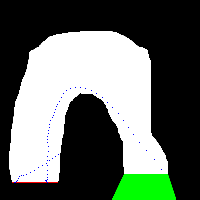

In [9]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/complex_track_off-policy_example.png", width=400)

#### Value funciton
Note here I include states moving downward in the average as well.

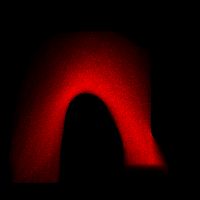

In [10]:
from IPython.display import Image
Image("/workspaces/RL2018/exercises/chapter5/e5_12_outputs/complex_track_off-policy_avg_value.png", width=400)

#### Exploring Starts
This algorithm seems to be defeated by the larger state space. However, there may simply be a bug in this implementation that I have not found yet.